In [1]:
import configparser
import random
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_auc_score, average_precision_score
from keras.models import load_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, \
                        Input, Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from collections import Counter
import keras.optimizers
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
import glob, os
import tensorflow as tf
import pandas as pd
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from pycausal import search as s
from pycausal.pycausal import pycausal as pc
from collections import defaultdict
from numpy.polynomial.polynomial import polyfit  
from scipy.stats import pearsonr
from pylab import text
from pycausal import prior as p
import itertools

# select your GPU Here
os.environ["CUDA_VISIBLE_DEVICES"]="" #Comment this line out if you want all GPUS (2 hehe)

# python full-display web browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


def get_model(dense, dropouts, inputs):
    # dense is an ordered list of the number of dense neurons like [1024, 2048, 1024]
    # dropouts is an ordered list of the dropout masks like [0.2, 0.3, 0.4]
    inputs = keras.Input(shape = (inputs,))
    x = keras.layers.Dense(dense[0], activation = 'relu')(inputs)
    x = keras.layers.Dropout(dropouts[0])(x, training=False)
    for den, drop in zip(dense[1:], dropouts[1:]):
        x = keras.layers.Dense(den, activation = 'relu')(x)
        x = keras.layers.Dropout(drop)(x, training=False)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)
    model = keras.Model(inputs, outputs)
    return model

def get_bic(df, prior, penalty = 2):

    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, penalty = 200
               )
    
    BIC = tetrad.getTetradGraph().getAllAttributes().toString()
    BIC = float(BIC.split('=')[-1].split('}')[0])
    return BIC #/ len(df)
def normalize(a):
    return (a - np.min(a)) / (np.max(a) - np.min(a))
def make_categorical(df, complete_df, categoricals):   
    retval = None
    for key in df.columns:
        if retval is not None:
            if key in categoricals:
                retval = np.concatenate((retval, to_categorical(df[key], len(complete_df[key].unique()))), axis = 1)
            else:
                retval = np.concatenate((retval, df[key].values[...,np.newaxis]), axis = 1)
        else:
            if key in categoricals:
                retval = to_categorical(df[key], len(complete_df[key].unique()))
            else:
                retval = df[key]
    return retval
num_models = 60 
pc = pc()
pc.start_vm(java_max_heap_size = '21000M')
tetrad = s.tetradrunner()

models = []
model_names = []



randomize = False
if randomize:
    layers = [256, 512, 1024, 2048, 4096]
    for i in range(num_models):
        network = []
        for j in range(3):
            network.append(layers[random.randint(0,len(layers) -1)])
        models.append(network)
        model_names.append('temp/simc' + str(i))
    print(models, model_names)    
else:
    model_layers = [512, 256]
    for i in range(num_models):
        models.append(model_layers)
        model_names.append('temp/simc' + str(i))

print(models, model_names)

/home/tkyono/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256], [512, 256]] ['temp/simc0', 'temp/simc1', 'temp/simc2', 'temp/simc3', 'temp/simc4', 'temp/simc5', 'temp/simc6', 'temp/simc7', 'temp/simc8', 'temp/simc9', 'temp/simc10', 'temp/simc11', 'temp/simc12', 'temp/simc13', 'temp/simc14', 'temp/simc15', 'temp/simc16', 'temp/simc17', 'temp/simc18', 'te

In [2]:
import networkx as nx

def random_dag(nodes, edges):
    """Generate a random Directed Acyclic Graph (DAG) with a given number of nodes and edges."""
    G = nx.DiGraph()
    for i in range(nodes):
        G.add_node(i)
    while edges > 0:
        a = random.randint(0,nodes-1)
        b=a
        while b==a:
            b = random.randint(0,nodes-1)
        G.add_edge(a,b)
        if nx.is_directed_acyclic_graph(G):
            edges -= 1
        else:
            # we closed a loop!
            G.remove_edge(a,b)
    return G



In [3]:
import pydot
from IPython.display import SVG

def examine_graph_continuous(df, prior = None):
    tetrad.run(algoId = 'fges', dfs = df,  scoreId = 'sem-bic', dataType = 'continuous',
               structurePrior = 1.0, samplePrior = 1, maxDegree = -1, maxPathLength = -1, priorKnowledge = prior,
               completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True,
               )
    return tetrad.getTetradGraph()

def gen_data(list_vertex = [], list_edges = [], mean = 0, var = 1, SIZE = 20000):
    g = []
    for v in list_vertex:
        g.append(np.random.normal(mean,var,SIZE))
        
    for edge in list_edges:
        g[edge[1]] += g[edge[0]]
    g = np.swapaxes(g,0,1)
    return pd.DataFrame(g, columns = list(map(str, list_vertex)))



In [4]:
bestMSE = []
bestBIC = []
bestCOMBO = []
bestPOSSIBLE= []
worstMSE = []
worstBIC = []
worstCOMBO = []
worstPOSSIBLE= []

qbestMSE = []
qbestBIC = []
qbestCOMBO = []
qbestPOSSIBLE= []
qworstMSE = []
qworstBIC = []
qworstCOMBO = []
qworstPOSSIBLE= []


sbestMSE = []
sbestBIC = []
sbestCOMBO = []
sbestPOSSIBLE= []
sworstMSE = []
sworstBIC = []
sworstCOMBO = []
sworstPOSSIBLE= []

sqbestMSE = []
sqbestBIC = []
sqbestCOMBO = []
sqbestPOSSIBLE= []
sqworstMSE = []
sqworstBIC = []
sqworstCOMBO = []
sqworstPOSSIBLE= []

averageDegree = []
targetDegree = []
target_inD = []
target_outD = []
descendants = []
t= 0
while (t < 50):
    train_size = 20000
    nodes = 18
    test_mean = 1
    test_var = 2
    test_size = 2000
    
    G = random_dag(nodes, random.randint(nodes, nodes*nodes)) # since max number of edges is n^2
    df = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
    require = []
    for i in G.edges:
        require.append([str(i[0]), str(i[1])])  
    prior = p.knowledge(requiredirect = require)
    examine_graph_continuous(df, prior)
    
    # Check to make sure that graph matches our prior knowledge. Or else abort this test.
    a = set()
    for i in tetrad.getEdges():
        a.add((i[0], i[-1]))
    b = set()
    for i in require:
        b.add((i[0], i[1]))
    print("A = ", a)
    print("B = ", b)
    if a != b:
        continue
        
    known_conx = set({})
    for i in tetrad.getEdges():
        if ' --> ' in i:
            known_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
    known_conx
        
    # Need to set our inputs and outputs
    inputs = set(np.arange(nodes))
    target = str(a.pop()[random.randint(0,1)])
    inputs.remove(int(target))
    inputs = list(map(str, inputs))
    df_test = gen_data(np.arange(nodes), G.edges, mean = test_mean, var = test_var, SIZE = test_size)
    sdf_test = gen_data(np.arange(nodes), G.edges, mean = 0.1, var = 1.2, SIZE = test_size)
    target = [target]
    
    print("Inputs = ", inputs)
    print("Target = ", target)
    
    x_test = df_test[inputs]
    y_test = df_test[target]
    
    sx_test = sdf_test[inputs]
    sy_test = sdf_test[target]

    causal_split = 0.2
    val_split = 0.2
    train_split = 1 - (causal_split + val_split)

    x_causal = df[inputs][-int(causal_split * len(df)) :]
    y_causal = df[target][-int(causal_split * len(df)) :]

    x_val = df[inputs][int(train_split * len(df)):-int(causal_split * len(df))]
    y_val = df[target][int(train_split * len(df)):-int(causal_split * len(df))]

    x_train = df[inputs][:int(train_split * len(df))]
    y_train = df[target][:int(train_split * len(df))]

    verbosity = 0

    for idx, model_name in enumerate(model_names):
        if type(models[idx]) is list:
            #clear session
            keras.backend.clear_session() 
            #get model according to specification
            model = get_model(models[idx], [0.2] * len(models), np.shape(x_train)[1])
            callbacks = [ModelCheckpoint(model_name, verbose= verbosity, monitor='val_loss',save_best_only=True), 
                         EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose= verbosity, mode='auto')]
            model.compile(optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9, ), loss='mean_squared_error', metrics = ['mse'])
            #print(len(X), len(y))
            model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val), callbacks = callbacks, batch_size = 32, verbose = verbosity)
        else:
            models[idx].fit(X,y)





    generalization = []
    metrics = []
    proposed = []
    x_causal.reset_index(drop=True, inplace = True)
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(x_test)
        generalization.append(mean_squared_error(y_pred, y_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)



        metrics.append(mean_squared_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        if found_conx == known_conx:
            proposed.append(bic_pred)
        else:
            print("******Found an error")
            print(bic_pred, tetrad.getEdges())
            # for now just remove bad model.  Will need to add it to distance metric.
            proposed.append(bic_pred)
            #metrics = metrics[:-1]
            #generalization = generalization[:-1]
    nbest = 6
    print(proposed)
    total = normalize(metrics) + normalize(proposed)
    final = pd.DataFrame(np.stack((metrics, proposed, total, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    bestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    bestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    bestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    bestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    worstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    worstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    worstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    worstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    nbest = 15
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    qbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    qbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    qbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    qbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    qworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    qworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    qworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    qworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    generalization = []
    metrics = []
    proposed = []
    for idx, model_name in enumerate(model_names):
        #print(model_name)
        if type(models[idx]) is list:
            keras.backend.clear_session()
            model = load_model(model_name)
        else:
            model = models[idx]

        y_pred = model.predict(sx_test)
        generalization.append(mean_squared_error(y_pred, sy_test))

        #### CHECK FOR CAUSAL METRIC HERE
        y_causal_pred = model.predict(x_causal)
        causal_targets = pd.DataFrame(y_causal_pred, columns = target)
        
        #causal_targets.reset_index(drop=True, inplace = True)
        causal_df = x_causal.join(causal_targets)


        metrics.append(mean_squared_error(y_causal_pred, y_causal))
        #print(x_causal.head)
        bic_pred = get_bic(causal_df, prior)
        #print(bic_pred, tetrad.getEdges())

        found_conx = set({})
        for i in tetrad.getEdges():
            if ' --> ' in i:
                found_conx.add((i.split(' --> ')[0], i.split(' --> ')[1]))
        found_conx

        proposed.append(bic_pred)
       
    nbest = 6
    print(proposed)
    total = normalize(metrics) + normalize(proposed)
    final = pd.DataFrame(np.stack((metrics, proposed, total, normalize(generalization)), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    sbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    sbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    sbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    sbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    sworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    sworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    sworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    sworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    nbest = 15
    print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nsmallest(nbest, 'generalization')['generalization'].values))
    sqbestMSE.append(final.nsmallest(nbest, 'metrics')['generalization'].values)
    sqbestBIC.append(final.nsmallest(nbest, 'proposed')['generalization'].values)
    sqbestCOMBO.append(final.nsmallest(nbest, 'combined')['generalization'].values)
    sqbestPOSSIBLE.append(final.nsmallest(nbest, 'generalization')['generalization'].values)
    
    print("MSE = ", np.sum(final.nlargest(nbest, 'metrics')['generalization'].values))
    print("BIC = ", np.sum(final.nlargest(nbest, 'proposed')['generalization'].values))
    print("COMB = ",np.sum(final.nlargest(nbest, 'combined')['generalization'].values))
    print("Best possible = ",np.sum(final.nlargest(nbest, 'generalization')['generalization'].values))
    sqworstMSE.append(final.nlargest(nbest, 'metrics')['generalization'].values)
    sqworstBIC.append(final.nlargest(nbest, 'proposed')['generalization'].values)
    sqworstCOMBO.append(final.nlargest(nbest, 'combined')['generalization'].values)
    sqworstPOSSIBLE.append(final.nlargest(nbest, 'generalization')['generalization'].values)
    
    
    print("Times = ", t)
    d = []
    for i in G.degree():
        d.append(i[1])
        if str(i[0]) in target:
            targetDegree.append(i[1])
    averageDegree.append(np.mean(d))
    target_inD.append(G.in_degree(int(target[0])))
    target_outD.append(G.out_degree(int(target[0])))
    descendants.append(len(nx.descendants(G, int(target[0]))))
    print(targetDegree, averageDegree)
    t += 1
    
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '3'), ('9', '3'), ('15', '11'), ('9', '14'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('2', '13'), ('15', '5'), ('2', '4'), ('7', '9'), ('1', 

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '8'), ('4', '15'), ('0', '12'), ('2', '15'), ('12', '7'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '10'), ('5

A =  {('6', '2'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('3', '9'), ('9', '2'), ('1', '2'), ('1', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('8', '12'), ('5', '17'), ('11', '12'), ('0', '9'), ('15', '13'), ('15', '10'), ('5', '12'), ('15', '12'), ('15', '5'), ('10', '0'), ('1', '13'), ('13', '3'), ('9', '17'), ('5', '8'), ('16', '9'), ('14', '5'), ('16', '12'), ('3', '7'), ('15', '2'), ('3', '6'), ('1', '2'), ('14', '16'), ('10', '16'), ('16', '11'), ('0', '8'), ('1', '17'), ('13', '16'), ('13', '5'), ('15', '16'), ('1', '10'), ('14', '12'), ('14', '6'), ('0', '13'), ('0', '3'), ('1', '14'), ('8', '6'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '9'), ('6', '0'), ('7', '5'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('16', '5'), ('8', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('7', '11'), ('1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('5', '4'), ('5', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('5', '8')}
B =  {('4', '13'), ('5', '0'), ('8', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('10', '8'), ('9', '14'), ('7', '10'), ('15', '10'), ('5', '9'), ('5', '12'), ('13', '14'), ('1', '3'), ('0', '10'), ('5', '11'), ('16', '12'), ('15', '2'), ('4', '17'), ('4', '12'), ('7', '14'), ('17', '9'), ('11', '1'), ('14', '16'), ('0', '11'), ('1

A =  {('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '4'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('12', '5'), ('5', '0'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('12', '2'), ('5', '16'), ('2', '13'), ('2', '4'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '3'), ('14', '1'), ('2', '14'), ('10', '15'), ('12', '0'), ('2', '3'), ('9', '17'), ('16', '9'), ('8', '15'), ('3', '7'), ('16', 

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('14', '17'), ('15', '7'), ('6', '1'), ('12', '5'), ('15', '2'), ('16', '4'), ('16', '3'), ('6', '3'), ('16', '0'), ('9', '2'), ('15', '1'), ('0', '17'), ('8', '0'), ('5', '17'), ('8', '5'), ('11', '5'), ('15', '3'), ('6', '14'), ('8', '3'), ('13', '17'), ('9', '3'), ('9', '7'), ('0', '6'), ('15', '11'), ('8', '11'), ('1', '12

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('0', '4'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('11', '12'), ('15', '11'), ('0', '12'), ('13', '1'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', 

A =  {('1', '8'), ('1', '4'), ('9', '4'), ('5', '7'), ('1', '3'), ('1', '5'), ('1', '7'), ('1', '9'), ('0', '7'), ('7', '4'), ('0', '3'), ('5', '6'), ('8', '2'), ('9', '2'), ('1', '1'), ('1', '2')}
B =  {('16', '12'), ('15', '2'), ('16', '3'), ('1', '2'), ('0', '17'), ('5', '17'), ('7', '14'), ('12', '17'), ('13', '9'), ('11', '8'), ('13', '4'), ('9', '12'), ('5', '16'), ('16', '1'), ('5', '6'), ('8', '2'), ('14', '15'), ('9', '4'), ('0', '13'), ('7', '4'), ('17', '7')}
A =  {('3', '0'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('6', '14'), ('8', '3'), ('4', '15'), ('15'

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('17', '5'), ('8', '4'), ('0', '5'), ('8', '5'), ('16', '5'), ('9', '3'), ('13', '1'), ('2', '15'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('2', '5'), ('11', '17'), ('16', '7'), ('13', '14'), ('1', '0'), ('11', '16'), ('13', '3'), ('13', '0'), ('12', '0'), ('12', '11'), ('9', '17'), ('14', '5'), ('8', '15'), ('3', '7'), ('16', '6'), ('3', '6'), ('1', '2'), ('0

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('16', '4'), ('5', '0'), ('5', '17'), ('3', '8'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '7'), ('7', '11'), ('5', '16'), ('15', '4'), ('15', '10'), ('6', '13'), ('5', '9'), ('5', '12'), ('15', '12'), ('2', '13'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('6', '7'), ('3', '1'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('4', '4'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('3', '5'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('9', '3'), ('0', '12'), ('2', '15'), ('10', '8'), ('15', '4'), ('2', '5'), ('15

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'), ('11', '2'), ('0', '12'), ('10', '8'), ('9', '14'), ('15', '4'), ('11', '17'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('13', '14'), ('7', '9'), ('1', '3'), ('1', '13'), ('10', '15'), ('9', '17'), ('11', '9'), ('5', '8'), ('16', '12'), ('3', '7'), ('4', '17'), ('

A =  {('6', '2'), ('6', '1'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('0', '2'), ('1', '5'), ('8', '2'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '3'), ('2', '0'), ('1', '1'), ('4', '4'), ('5', '8')}
B =  {('15', '7'), ('0', '5'), ('6', '3'), ('14', '11'), ('16', '14'), ('17', '9'), ('15', '0'), ('11', '1'), ('13', '9'), ('15', '11'), ('13', '6'), ('4', '2'), ('13', '4'), ('7', '11'), ('17', '14'), ('6', '11'), ('0', '2'), ('15', '4'), ('15', '13'), ('6', '12'), ('3', '12'), ('10', '17'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('13', '14'), ('2', '10'), ('4', '14'), ('13', '3'), ('0', '3'), ('17', '7'), ('12', '10'), ('12', '11'), ('5', '8')}
A =  {('8', '4'), ('6', '6'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('12', '5'), ('5', '0'), ('4', '15'), ('15', '11'), ('2', '15'), ('10', '8'), ('12', '15'), ('5', '16'), ('11', '17'), ('2', '13'), ('2', '4'), ('1', '3'), ('1', '13'), ('1', '0'), ('11', '16'), ('13', '3'), ('14', '1'), ('13', '0

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('6', '1'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6')}
B =  {('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('0', '12'), ('10', '8'), ('9', '14'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('3', '12'), ('5', '12'), ('15', '12'), ('10', '0'), ('13', '14'), ('1', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('8', '4'), ('16', '4'), ('3', '2'), ('5', '17'), ('3', '8'), ('15', '11'), ('12', '7'), ('12', '2'), ('5', '16'), ('15', '4'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '1'), ('10', '15'), ('12', 

A =  {('5', '7'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('11', '6'), ('14', '5'), ('5', '7'), ('8', '16'), ('16', '0'), ('4', '5'), ('8', '12'), ('2', '7'), ('14', '16'), ('11', '9'), ('11', '2'), ('1', '9'), ('0', '12'), ('8', '11'), ('0', '7'), ('13', '15'), ('4', '6'), ('16', '10'), ('2', '12'), ('5', '15'), ('2', '5'), ('8', '10'), ('9', '17'), ('8', '1'), ('2', '13'), ('4', '3'), ('9', '15'), ('13', '12'), ('11', '14'), ('4', '0'), ('9', '13'), ('14', '12'), ('2', '14'), ('13', '0'), ('14', '7'), ('13', '10'), ('3', '14'), ('2', '1')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('5', '4'), ('5', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('5', '0'), ('11', '12'), ('3', '8'), ('11', '2'), ('15', '11'), ('13', '1'), ('9', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('11', '17'), ('5', '12'), ('15', '12'), ('2', '4'), ('10', '0'), ('1', '0'), ('13', '3'), ('14', '1'), ('14', '4'), ('13', '0'), ('

A =  {('3', '0'), ('3', '6'), ('5', '0'), ('1', '2'), ('1', '8'), ('0', '6'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '2'), ('0', '2'), ('1', '5'), ('9', '5'), ('8', '2'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '1'), ('9', '6'), ('1', '1'), ('2', '3')}
B =  {('15', '8'), ('16', '6'), ('3', '6'), ('16', '13'), ('8', '12'), ('7', '12'), ('16', '11'), ('2', '8'), ('4', '9'), ('9', '14'), ('0', '2'), ('5', '10'), ('2', '13'), ('9', '16'), ('1', '3'), ('10', '2'), ('6', '5'), ('1', '0'), ('7', '1'), ('14', '6'), ('9', '6'), ('12', '13'), ('12', '11'), ('0', '16'), ('6', '15')}
A =  {('6', '1'), ('7', '5'), ('6', '7'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('9', '8'), ('4', '0'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '7'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('6', '8')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('0', '12'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('3', '5'), ('4', '7'), ('8', '7'), ('5', '3'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('5', '17'), ('13', '1'), ('12', '7'), ('7', '11'), ('12', '2'), ('17', '14'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('10', '0'), ('13', '14'), ('1', '0'), ('14', '1'), ('14', '4'), ('13', '0'), ('12', '0'), ('5', '11'), ('5', '8'), ('15', '2'), ('15', '14'), (

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('7', '6'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '8'), ('5', '2'), ('0', '4'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('0', '5'), ('4', '5'), ('11', '12'), ('16', '5'), ('0', '12'), ('0', '9'), ('7', '11'), ('12', '2'), ('11', '17'), ('5', '9'), ('3', '12'), ('15', '12'), ('0', '14'), ('10', '15'), ('11', '9'), ('5', '8'), ('16', '9'), ('14', '5'), ('16', '12'), ('15', '2'), ('3', '6'), ('15', '14'), ('4', '17'), ('4', '12'), ('0', '17'), ('7', '14'), (

A =  {('6', '2'), ('3', '7'), ('6', '7'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('2', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('0', '3'), ('9', '1'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('11', '6'), ('6', '2'), ('14', '17'), ('15', '14'), ('16', '13'), ('11', '3'), ('15', '1'), ('2', '7'), ('1', '2'), ('0', '17'), ('3', '2'), ('8', '5'), ('9', '11'), ('12', '17'), ('11', '1'), ('4', '8'), ('0', '12'), ('13', '6'), ('13', '1'), ('4', '2'), ('0', '9'), ('14', '13'), ('9', '12'), ('2', '8'), ('4', '6'), ('10', '13'), ('0', '2'), ('4', '7'), ('15', '13'), ('11', '17'), ('10', '17'), ('17', '8'), ('0', '14'), ('10', '1'), ('12', '1'), ('12', '3'), ('4', '14'), ('0', '13'), ('10', '15'), ('11', '15'), ('10', '4'), ('17', '3'), ('13', '7'), ('12', '10'), ('0', '11')}
A =  {('3', '0'), ('6', '2'), (

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('6', '7'), ('6', '9'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('1', '6'), ('2', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('15', '8'), ('7', '16'), ('16', '9'), ('4', '11'), ('7', '5'), ('16', '12'), ('6', '7'), ('6', '9'), ('8', '16'), ('16', '3'), ('6', '3'), ('4', '5'), ('5', '14'), ('17', '15'), ('15', '1'), ('2', '7'), ('8', '0'), ('15', '3'), ('11', '5'), ('1', '8'), ('7', '12'), ('8', '3'), ('2', '9'), ('11', '1'), ('13', '17'), ('16', '5'), ('17', '16'), ('0', '6'), ('4', '15'), ('1', '7'), ('13',

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('3', '7'), ('6', '7'), ('6', '0'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('6', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '0'), ('9', '6'), ('8', '6')}
B =  {('8', '4'), ('12', '5'), ('8', '16'), ('6', '0'), ('4', '17'), ('5', '14'), ('3', '8'), ('13', '9'), ('1', '9'), ('0', '12'), ('0', '7'), ('10', '16'), ('1', '6'), ('13', '4'), ('3', '5'), ('9', '14'), ('7', '2'), ('15', '4'), ('16', '2'), ('13', '16'), ('2', '17'), ('15', '16'), ('6', '4'), ('16', '7'), ('9', '8'), ('6', '17'), ('13', '12'), ('14', '7'), ('12', '10'), ('10', '9')}
A =  {('7', '5'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('9', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('2', '5'), ('1', '5'), ('8', '1'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '9'), ('3', '1'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '9'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('6', '5'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'), ('15', '13'), ('15', '10

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('11', '2'), ('4', '15'), ('0', '12'), ('2', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('3', '5'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('4', '15'), ('15', '11'), ('2', '15'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('3', '12'), ('2', '4'), ('10', '

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('7', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('5', '0'), ('5', '17'), ('3', '8'), ('6', '14'), ('0', '12'), ('0', '9'), ('2', '15'), ('7', '11'), ('5', '16')

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('8', '4'), ('12', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('9', '3'), ('13', '1'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('15', '4'), ('2', '13'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', '1'), ('13', '3'), ('14', '4'),

A =  {('6', '2'), ('8', '4'), ('6', '7'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('4', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('8', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('7', '11'), ('15', '4'), ('2', '5'), ('15', '10'), ('11', '17'), ('15', '12'), ('1', '3'), ('1', '13'), ('14', '1'), ('14', '4'), ('7', '1'), ('13', '3'), ('13', '0'), ('14', '5'), ('16', '6'), ('15', '2'), ('4', '17'), ('4', '12'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('8', '4'), ('6', '7'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '1'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('8', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('2', '15'), ('10', 

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('8', '4'), ('12', '5'), ('16', '4'), ('8', '12'), ('16', '14'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('12', '7'), ('12', '15'), ('15', '10'), ('6', '13'), ('16', '7'), ('2', '4'), ('13', '14'), ('1', '0'), ('13', '3'), ('12', '0'), ('12', '11'), ('2', '3'), ('9', '17'), ('8', '13'), ('16', '9'), ('16', '12'), ('8', '15'), ('1', '2'), ('9', '12'), ('13', '15'), ('16', '11'), ('6', '

A =  {('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('1', '3'), ('0', '3'), ('0', '4'), ('9', '1'), ('1', '1'), ('2', '1')}
B =  {('4', '13'), ('12', '5'), ('16', '4'), ('8', '12'), ('5', '17'), ('16', '5'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '4'), ('2', '5'), ('15', '13'), ('11', '17'), ('8', '2'), ('1', '3'), ('2', '14'), ('13', '3'), ('10', '15'), ('12', '11'), ('8', '13'), ('16', '9'), ('14', '5'), ('16', '6'), ('3', '7'), ('4', '17'), ('14', '16'), ('12', '9'), ('14', '3'), ('16', '11'), ('0', '8'), ('13', '5'), ('10', '17'), ('15', '16'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '6'), ('5', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('6', '4'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('8', '12'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('13', '1'), ('0', '9'), ('2', '15'), ('9', '14'), ('5', '9'), ('3', '12'), ('5', '12'), ('10', '0'), ('13', '14'), ('7', '9'), ('0', '14'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('6', '1'), ('3', '7'), ('5', '7'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '9'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('2', '0'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('7', '5'), ('6', '7'), ('8', '4'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('8', '12'), ('5', '17'), ('8', '5'), ('6', '14'), ('9', '3'), ('15', '11'), ('13', '1'), ('7', '11'), ('7', '10'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '10'), ('6', '13'), (

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('4', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('15', '11'), ('2', '15'), ('17', '14'), ('15', '12'), ('2', '13'), ('10', '0'), ('7', '9'), ('2', '14'), ('13', '3'), ('13', '0'), ('12', '0'), ('5', '8'), ('6', '1'), ('4', '17'), ('7', '14'), ('1', '8'), ('2', '9'), ('11', '8'), ('10', '16'), ('2', '8'), ('6

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('3', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('1', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('1', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '1')}
B =  {('15', '8'), ('16', '9'), ('14', '17'), ('5', '0'), ('5', '14'), ('4', '12'), ('1', '2'), ('11', '12'), ('17', '9'), ('0', '12'), ('8', '11'), ('17', '0'), ('3', '17'), ('6', '10'), ('11', '4'), ('6', '16'), ('5', '13'), ('6', '13'), ('2', '11'), ('5', '1'), ('17', '8'), ('1', '11'), ('3', '10'), ('1', '16'), ('9', '15'), ('10', '14'), ('17', '2'), ('3', '11'), ('4', '0'), ('6', '5'), ('7', '1'), ('13', '3'), ('17', '1'), ('14', '7'), ('2', '0'), ('7', '15'), ('5', '2'), ('16', '8')}
A =  {('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), (

A =  {('5', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('2', '8'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('8', '13'), ('12', '16'), ('7', '16'), ('4', '11'), ('16', '4'), ('16', '13'), ('6', '3'), ('4', '5'), ('14', '11'), ('17', '15'), ('15', '1'), ('2', '7'), ('8', '0'), ('12', '17'), ('16', '5'), ('8', '3'), ('11', '1'), ('14', '16'), ('17', '6'), ('0', '6'), ('13', '6'), ('7', '3'), ('9', '0'), ('1', '6'), ('2', '15'), ('12', '8'), ('2', '8'), ('14', '13'), ('17', '0'), ('2', '12'), ('5', '15'), ('8', '7'), ('13', '10'), ('2', '5'

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('12', '16'), ('7', '16'), ('4', '11'), ('7', '5'), ('16', '6'), ('15', '14'), ('3', '9'), ('4', '5'), ('8', '14'), ('16', '0'), ('4', '12'), ('2', '7'), ('1', '2'), ('8', '0'), ('9', '11'), ('2', '6'), ('1', '15'), ('12', '17'), ('16', '14'), ('16', '5'), ('13', '17'), ('2', '9'), ('15', '0'), ('13', '9'), ('17', '9'), ('17', '6'), ('4', '15'), ('1', '9'), ('12', '9'), ('13', '6'), ('4', '2'), ('10', '16'), ('1', '6'), 

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('3', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('5', '8')}
B =  {('10', '6'), ('5', '4'), ('6', '1'), ('16', '12'), ('3', '1'), ('0', '5'), ('16', '13'), ('16', '0'), ('5', '14'), ('11', '3'), ('14', '8'), ('8', '12'), ('4', '12'), ('17', '10'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('17', '16'), ('13', '6'), ('0', '7'), ('1', '12'), ('2', '15'), ('9', '12'), ('9', '0'), ('2', '8'), ('13', '4'), ('3', '17'), ('9', '14'), ('13', '15'), ('11', '7'), 

A =  {('3', '0'), ('6', '1'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('8', '4'), ('0', '5'), ('4', '5'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('6', '14'), ('4', '15'), ('0', '12'), ('12', '2'), ('17', '

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('8', '13'), ('17', '5'), ('7', '16'), ('6', '2'), ('14', '5'), ('14', '17'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('8', '16'), ('5', '0'), ('6', '0'), ('16', '3'), ('16', '0'), ('14', '11'), ('11', '3'), ('8', '12'), ('4', '12'), ('15', '1'), ('17', '10'), ('17', '9'), ('2', '9')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('8', '12'), ('5', '17'), ('11', '12'), ('8', '3'), ('0', '12'), ('13', '1'), ('0', '9'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '9'), ('15', '12'), ('15', '5'), ('7', '9')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('8', '4'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '6'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('7', '4'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('8', '3'), ('11', '2'), ('15', '11'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '10'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', '12'), ('15', '5'), ('10', '

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('8', '6'), ('0', '4'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('12', '5'), ('16', '4'), ('16', '14'), ('5', '17'), ('8', '5'), ('3', '8'), ('6', '14'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('2', '5'), ('11', '17'), ('5', '9'), ('3', '12'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '0'), ('2', '14'), ('10', '15'), ('13', '3'), ('14', '4'), ('12', '11'), ('

A =  {('8', '4'), ('5', '7'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('8', '13'), ('16', '9'), ('15', '7'), ('5', '7'), ('15', '2'), ('16', '3'), ('6', '3'), ('4', '5'), ('8', '14'), ('16', '0'), ('8', '12'), ('2', '7'), ('1', '2'), ('8', '0'), ('10', '3'), ('15', '1'), ('16', '5'), ('17', '9'), ('11', '2'), ('13', '9'), ('4', '15'), ('12', '9'), ('15', '11'), ('7', '3'), ('4', '2'), ('0', '9'), ('14', '3'), ('13', '15'), ('17', '0'), ('4', '9'), ('9', '14'), ('12', '2'), ('4', '6'), ('10', '13'), ('13', '7'), ('16', '10'), ('0', '2'), ('4', '7'), ('8', '7')

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('7', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('5', '17'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '9'), ('12', '2'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '17'), ('16', '7'), ('2', '4'), ('0', '14'), ('1', '13

A =  {('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('12', '5'), ('0', '5'), ('5', '17'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('5', '16'), ('11', '17'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('3', '8'), ('15', '11'), ('0', '12'), ('2', '15'), ('2', '5'), ('6', '1

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('3', '0'), ('5', '0'), ('4', '5'), ('8', '12'), ('5', '17'), ('3', '8'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('6', '13'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('7', '0'), ('3', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('8', '13'), ('6', '2'), ('6', '1'), ('5', '7'), ('8', '15'), ('6', '9'), ('15', '14'), ('5', '14'), ('9', '2'), ('3', '2'), ('5', '17'), ('9', '11'), ('7', '14'), ('12', '17'), ('1', '8'), ('11', '12'), ('15', '0'), ('16', '5'), ('9', '7'), ('15', '11'), ('7', '0'), ('3', '5'), ('17', '14'), ('1', '17'), ('8', '10'), ('5', '13'), ('3', '13'), ('6', '13'), ('3', '4'), ('5', '12'), ('6', '4'), ('3', '16'), ('2', '13'), ('10', '0'), ('10', '12'), ('17', '4'), ('14', '0'), ('10', '9'), ('9', '17'), ('5', '8'), ('6', '

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('3', '9'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('3', '2'), ('3', '8'), ('13', '1'), ('0', '9'), ('12', '7'), ('12', '15'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('5', '9'), ('16', '7'), ('2', '13'), ('2', '4'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '1'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('12', '5'), ('16', '4'), ('3', '2'), ('5', '17'), ('6', '14'), ('11', '2'), ('4', '15'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', 

A =  {('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('12', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('15', '4'), ('2', '5'), ('6', '13'), ('16', '7'), ('15', '5'), ('0', '14'), ('1', '13'), ('14', '4'), ('10', '15'), ('0', '10'), ('12', '0'), ('2', '3'), ('2', '1'), ('5', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('16', '4'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('4', '15'), ('2', '15'), ('10', '8'), ('7', '11'), ('6', '13'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('10', '0'), ('1', '13'), ('1', '0'), ('10', '15

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('5', '0'), ('8', '12'), ('11', '12'), ('3', '8'), ('6', '14'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('5', '16'), ('2', '5'), ('15', '10'), ('6', '13'), ('11', '17'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '1'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('0', '4'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('0', '

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '6'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '8'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('0', '4'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('5', '0'), ('8', '12'), ('16', '14'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('2', '15'), ('10', '8'), ('12', '15'), ('17', '14'), ('5', '16'), ('6', '13'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('1', '13'), ('1', '0'), ('11', '16'), ('11', '9'), ('16', '12'), ('3'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '1'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('4', '1'), ('0', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('3', '8'), ('15', '11'), ('13', '1'), ('12', '7'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '1'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('9', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('5', '0'), ('8', '12'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('5', '16'), ('8', '2'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('13', '3'), ('10', '15'), ('13', '0'), ('12', '0'), ('12', '11

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('4', '5'), ('8', '12'), (

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('5', '4'), ('6', '7'), ('3', '3'), ('3', '7'), ('6', '9'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('8', '4'), ('0', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('10', '8'), ('12', '7'), ('9', '14'), ('15', '4'), ('6', '13'), ('11', '17'), ('5', '12'), ('8', '2'), ('15', '5'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '0'), ('11', '16'), ('10', '15'), ('14', '1'), ('2', '3'), ('9', '17'), ('8', 

A =  {('3', '0'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '8'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('15', '7'), ('4', '11'), ('3', '7'), ('16', '3'), ('14', '11'), ('4', '12'), ('1', '2'), ('11', '5'), ('2', '6'), ('12', '17'), ('1', '8'), ('11', '12'), ('16', '5'), ('11', '1'), ('14', '16'), ('4', '8'), ('9', '3'), ('0', '6'), ('0', '12'), ('13', '4'), ('9', '0'), ('14', '13'), ('12', '8'), ('3', '5'), ('3', '17'), ('7', '11'), ('9', '14'), ('0', '8'), ('13', '8'), ('0', '2'), ('15', '4'), ('16', '2'), ('5', '10'), ('8', '10')

A =  {('3', '0'), ('5', '4'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '6'), ('5', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '3'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('15', '7'), ('16', '4'), ('6', '0'), ('15', '14'), ('16', '3'), ('5', '14'), ('2', '7'), ('2', '6'), ('17', '10'), ('16', '5'), ('8', '3'), ('17', '9'), ('2', '1'), ('9', '7'), ('15', '11'), ('1', '7'), ('7', '3'), ('4', '2'), ('11', '8'), ('16', '11'), ('2', '8'), ('17', '13'), ('9', '14'), ('6', '10'), ('11', '4'), ('13', '8'), ('7', '10'), ('5', '10'), ('5', '13'), ('11', '17'), ('15', '16'), ('5', '12'), ('5', '6'), ('2', '13'), ('15', '5'), ('16', '8'), ('4', '1'), ('3', '1

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '6'), ('8', '4'), ('6', '1'), ('6', '7'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('16', '4'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('6', '14'), ('9', '3'), ('2', '15'), ('10', '8'), ('9', '14'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('6', '13'), ('11', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', 

A =  {('3', '0'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('8', '4'), ('5', '0'), ('4', '5'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('9', '3'), ('4', '15'), ('2', '15'), ('9', '14'), ('2', '5'), ('6', '13'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('1', '3'), ('1', '13'), ('1', '0'), ('2', '14'), ('10', '15'), ('13', '0'), ('12', '0'), ('2', 

A =  {('8', '7'), ('9', '4'), ('0', '6'), ('1', '5'), ('2', '2'), ('1', '0'), ('1', '7'), ('1', '6'), ('7', '0'), ('8', '2'), ('9', '2'), ('1', '1'), ('8', '6'), ('1', '2'), ('8', '0')}
B =  {('2', '12'), ('8', '7'), ('10', '6'), ('17', '5'), ('11', '1'), ('13', '5'), ('17', '12'), ('0', '6'), ('12', '5'), ('1', '12'), ('9', '12'), ('12', '7'), ('9', '14'), ('9', '2'), ('8', '0'), ('8', '12'), ('0', '16'), ('7', '10'), ('16', '10')}
A =  {('3', '0'), ('8', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('7', '3'), ('9', '0'), ('7', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('1', '5'), ('8', '2'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '4'), ('9', '1'), ('1', '1'), ('5', '8')}
B =  {('8', '13'), ('15', '8'), ('7', '16

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '4'), ('8', '4'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('0', '12'), ('12', '15'), ('12', '2'), ('7'

A =  {('6', '2'), ('7', '5'), ('3', '6'), ('1', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('11', '12'), ('3', '8'), ('9', '3'), ('0', '12'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('0', '14'), ('1', '3'), ('1', '13'), ('7', '1'), ('13', 

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('1', '1'), ('5', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('16', '4'), ('5', '0'), ('5', '17'), ('16', '5'), ('8', '3'), ('9', '3'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('15', '13'), ('15', '10'), ('8', '2'), ('16', '7'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '13'), ('1', '0'), ('14', '4'), ('13', '3'), ('12', '0'), ('2', '3'), ('5', '11'), ('8', '13'), ('8', '15'), ('15', '14'), ('1', '2'), ('0', '17'), ('8', '0'), (

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '1'), ('3', '6'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('16', '4'), ('16', '14'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '2'), ('7', '10'), ('2', '5'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('2', '14'), ('13', '0'), ('0', '10'), ('2', '3'), ('9', '17'), ('5', '11'), ('5'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('11', '2'), ('12', '7'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('1

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('0', '8'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('8', '2'), ('6', '4'), ('4', '1'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('16', '5'), ('8', '3'), ('0', '9'), ('10', '8'), ('12', '7'), ('17', '14'), ('15', '13'), ('3', '12'), ('5', '12'), ('8', '2'), ('1', '3'), ('13', '3'), ('11', '9'), ('5', '8'), ('16', '12'), ('3', '7'), ('15', '2'), ('4', '17'), ('17', '9'), ('13', '4'), ('14', '3'), ('9', '12'), ('0', '8'), ('13', '5'), ('6', '12'), ('15', '16'), ('17', '11'), ('6', '17'), ('10', '12'), ('11', '14'), ('14', '9'), ('1', '10'), ('14', '12'), ('1', '14'), ('17', '7'), ('13', '11'), ('13', '7'

A =  {('3', '3'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('2', '5'), ('1', '5'), ('9', '5'), ('4', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '1'), ('1', '1'), ('2', '3')}
B =  {('8', '13'), ('17', '5'), ('15', '7'), ('4', '11'), ('6', '0'), ('11', '3'), ('14', '8'), ('2', '7'), ('8', '0'), ('10', '3'), ('8', '5'), ('11', '5'), ('2', '6'), ('3', '15'), ('12', '17'), ('8', '3'), ('9', '10'), ('11', '2'), ('9', '7'), ('1', '9'), ('14', '3'), ('12', '6'), ('2', '15'), ('14', '13'), ('12', '8'), ('2', '8'), ('3', '5'), ('13', '15'), ('0', '15'), ('10', '13'), ('16', '10'), ('2', '12'), ('5', '15'), ('3', '13'), ('6', '13'), ('11', '17'), ('9', '5'), ('2', '13'), ('17', '8'), ('10', '0'), ('1', '16'), ('9', '4'), ('14', '9'), ('1', '3'), ('10', '2'), ('

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('8', '3'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('6', '13'), ('8', '2'), ('15', '5'), ('13', '14'), ('7', '9'), ('1', '3'), ('1', '13'), ('1', '0'), ('7', '1'), ('10', '15'), ('13', '3'), ('13', '

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '1'), ('7', '4'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('9', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('16', '4'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('2', '15'), ('10', '8'), ('12', '15'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('5', '9')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('1', '9'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('2', '1')}
B =  {('6', '2'), ('6', '1'), ('7', '5'), ('8', '15'), ('12', '10'), ('16', '4'), ('8', '16'), ('6', '0'), ('16', '3'), ('9', '2'), ('8', '12'), ('15', '1'), ('8', '0'), ('8', '5'), ('7', '14'), ('17', '10'), ('3', '15'), ('11', '12'), ('17', '9'), ('6', '14'), ('17', '16'), ('0', '12'), ('14', '3'), ('2', '15'), ('7', '0'), ('9', '12'), ('13',

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('16', '4'), ('16', '14'), ('3', '2'), ('3', '8'), ('9', '3'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('15', '4'), ('2', '5'), ('16', '7'), ('10', '0'), ('13', '14'), ('0', '14'), ('7', '1'), ('14', '1'), ('14', '4'), ('10', '15'), ('1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('4', '15'), ('2', '15'), ('12', '15'), ('2', '5'), ('11', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('10', '0'), ('1', '3'), ('1', '0'), ('2', '14'), ('11', 

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('5', '0'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('3', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '9'), ('5', '8')}
B =  {('8', '13'), ('3', '0'), ('14', '17'), ('5', '4'), ('15', '7'), ('16', '6'), ('3', '7'), ('16', '4'), ('5', '0'), ('15', '14'), ('5', '14'), ('3', '2'), ('17', '10'), ('12', '17'), ('13', '17'), ('2', '9'), ('17', '6'), ('12', '9'), ('13', '4'), ('1', '6'), ('2', '15'), ('12', '7'), ('4', '9'), ('11', '4'), ('0', '8'), ('11', '7'), ('4', '6'), ('0', '15'), ('1', '17'), ('0', '2'), ('2', '12'), ('4', '7'), ('5', '10'), ('10', '11'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('3', '3'), ('7', '5'), ('6', '9'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('8', '6'), ('1', '1'), ('5', '2'), ('6', '8'), ('4', '4')}
B =  {('10', '6'), ('8', '13'), ('15', '8'), ('8', '4'), ('7', '5'), ('12', '5'), ('6', '7'), ('6', '9'), ('15', '2'), ('8', '16'), ('0', '5'), ('16', '3'), ('16', '13'), ('4', '17'), ('4', '5'), ('5', '14'), ('9', '2'), ('11', '3'), ('1', '2'), ('10', '3'), ('3', '2'), ('5', '17'), ('8', '5'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('5', '0'), ('3', '2'), ('11', '12'), ('0', '12'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', '12'), ('2', '13'), ('2', '4'), ('1', '13'), ('14', '1'), ('13', '0'), ('11', '9'), ('5', '11'), ('5', '8

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('6', '14'), ('9', '3'), ('15', '11'), ('2', '1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('0', '12'), ('10', '8'), ('9', '14'), ('17', '14'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '7'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('8', '4'), ('16', '4'), ('8', '12'), ('5', '17'), ('8', '5'), ('11', '12'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('9'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '9'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('3', '8'), ('15', '11'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '7'), ('2', '

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('11', '12'), ('6', '14'), ('9', '3'), ('11', '2'), ('9', '14'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('2', '1

A =  {('5', '4'), ('6', '1'), ('6', '0'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('9', '7'), ('1', '7'), ('0', '8'), ('3', '4'), ('6', '4'), ('8', '9'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('5', '4'), ('6', '1'), ('16', '4'), ('9', '2'), ('2', '7'), ('11', '1'), ('15', '11'), ('14', '13'), ('9', '14'), ('0', '8'), ('12', '2'), ('17', '14'), ('5', '15'), ('3', '4'), ('16', '1'), ('3', '12'), ('16', '7'), ('9', '16'), ('1', '10'), ('10', '2'), ('6', '5'), ('0', '3'), ('17', '7'), ('13', '10'), ('8', '9'), ('5', '8'), ('6', '15')}
A =  {('6', '2'), ('5', '4'), ('8', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('2', '1'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('8', '13'), ('17', '5'), ('7', '16'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('8', '16'), ('3', '6'), ('0', '5'), ('16', '13'), ('8', '14'), ('5', '14'), ('17', '15'), ('2', '7'), ('16', '14'), ('9', '11'), ('2

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('0', '9'), ('10', '8'), ('9', '14'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '2'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '13'), ('6', '13'), ('5', '9'), ('3', '12'), ('5', '1

A =  {('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('4', '7'), ('8', '7'), ('1', '5'), ('8', '1'), ('4', '1'), ('4', '3'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '3'), ('8', '9')}
B =  {('17', '5'), ('6', '0'), ('4', '17'), ('6', '3'), ('10', '3'), ('4', '12'), ('2', '7'), ('17', '10'), ('17', '9'), ('13', '17'), ('9', '10'), ('4', '8'), ('17', '6'), ('8', '11'), ('11', '7'), ('1', '17'), ('8', '1'), ('2', '13'), ('4', '1'), ('14', '2'), ('4', '0'), ('14', '12'), ('1', '13'), ('7', '6'), ('10', '15'), ('4', '16'), ('11', '13'), ('8', '9')}
A =  {('6', '1'), ('7', '5'), ('5', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('7', '16'), ('6', '2'), ('8', '4'), ('6', '1'), ('15', '7'), ('8', '15'), ('6', '3'), ('5', '14'), ('4', '12'), ('1', '2'), ('3', '2'), ('5', '17'), ('8', '5'), ('15', '3'), ('16', '14'), ('17', '10'), ('9', '7'), ('13', '6'), ('7', '3'), ('9', '12'), ('16', '11'), ('17', '13'), ('17', '14'), ('7', '10'), ('2', '12'), ('4', 

A =  {('5', '4'), ('7', '5'), ('3', '1'), ('4', '5'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('4', '8'), ('1', '9'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('1', '5'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('8', '6'), ('1', '1')}
B =  {('10', '6'), ('8', '15'), ('16', '6'), ('3', '1'), ('16', '0'), ('5', '14'), ('7', '14'), ('1', '15'), ('17', '10'), ('7', '12'), ('11', '1'), ('4', '8'), ('13', '9'), ('17', '16'), ('4', '15'), ('13', '6'), ('7', '3'), ('1', '12'), ('12', '6'), ('13', '4'), ('2', '8'), ('3', '5'), ('12', '15'), ('7', '11'), ('4', '6'), ('5', '16'), ('7', '2'), ('7', '10'), ('10', '13'), ('5', '15'), ('16', '2'), ('13', '16'), ('10', '11'), ('17', '11'), ('8', '1'), ('10', '5'), ('9', '16'), ('10', '0'), ('7', '17'), ('17', '12'), ('10', '2'), ('7', '1'), ('11', '16'

A =  {('3', '0'), ('6', '6'), ('5', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('8', '5'), ('16', '5'), ('15', '11'), ('7', '11'), ('15', '4'), ('11', '17'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '3'), ('1', '13'), ('1', '0'), ('7', '1'), ('10', '15'), ('13', '3'), ('13', '0'), ('12', '11'), ('2', '1'), ('8', '13'), ('15', '14'), ('1', '8'), ('1

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '1'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('6', '5'), ('2', '0'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('0', '9'), ('12', '15'), ('7', '11'), ('12', '2'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '10'), ('5', '9'

A =  {('5', '4'), ('7', '5'), ('3', '3'), ('3', '6'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '6'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('11', '6'), ('15', '7'), ('7', '5'), ('16', '6'), ('12', '5'), ('3', '6'), ('15', '14'), ('3', '9'), ('5', '14'), ('14', '8'), ('4', '12'), ('11', '12'), ('15', '0'), ('14', '16'), ('11', '2'), ('17', '16'), ('9', '7'), ('0', '6'), ('15', '11'), ('15', '6'), ('4', '2'), ('9', '0'), ('1', '6'), ('10', '8'), ('2', '8'), ('12', '7'), ('9', '14'), ('11', '4'), ('11', '7'), ('1', '17'), ('2', '12'), ('4', '7'), ('15', '4'), ('13', '16

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('6', '6'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('9', '0'), ('2', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('5', '0'), ('4', '5'), ('16', '14'), ('5', '17'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('2', '15'), ('5', '16'), ('2', '5'), ('11'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('12', '5'), ('5', '0'), ('8', '12'), ('8', '5'), ('4', '15'), ('15', '11'), ('13', '1'), ('2', '15'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('8', '2'), ('2', '13'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('4', '9'), ('7', '7'), ('7', '2'), ('4', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('0', '5'), ('5', '17'), ('16', '5'), ('6', '14'), ('15', '11'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), ('17', '14'), ('7', '10'), ('2', '5'), ('15', '13'), ('2', '13'), ('13', '14'), ('7', '9'), ('1', '13'), ('7', '1'), ('13', '3'), ('0', '1

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('6', '7'), ('1', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('6', '14'), ('9', '3'), ('15', '11'), ('13', '1'), ('9', '14'), ('7', '11'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('8', '2'), 

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('1', '1'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('12', '5'), ('16', '4'), ('16', '14'), ('5', '17'), ('16', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('2', '15'), ('10', '8'), ('9', '14'), ('12', '15'), ('12', '2'), ('15', '4'), ('11', '17'), ('16', '7'), ('2', '4'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('13', '3'), ('10', '15'), ('14', '4'), (

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('5', '8')}
B =  {('10', '6'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('12', '7'), ('9', '14'), ('12', '15'), ('15', '10'), ('11', '17'), ('5', '9'), ('10', '0'), ('0', '14'), ('1', '3'), ('1', '13'), ('2', '14'), ('11', '16'), ('12', '0'), ('12', '11'), ('9', '17'), ('5', '11'), ('5', '8'), ('16', '6'), ('3', '7'), ('15', '2'), ('3', '6'), ('15', '14'), ('0', '17'), ('7', '14'), ('3', '17'), ('0', '8'), ('5', '15'), ('13', '16'), ('10', '17'), ('3',

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '2'), ('5', '7'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('9', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('7', '16'), ('5', '0'), ('5', '17'), ('8', '5'), ('11', '12'), ('11', '2'), ('4', '15'), ('10', '8'), ('12', '15'), ('12', '2'), ('5', '16'), ('11', '17'), ('8', '2'), ('10', '0'), ('13', '14'), ('7', '9'), ('0', '14'), ('1', '0'), ('13', '3'), ('10', '15'), ('13', '0'), ('12', '0'), ('2', '3'), ('9', '17'), ('8', '15'), ('16', '6'), ('15', '2'), ('4', '17'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('7', '16'), ('8', '12'), ('3', '2'), ('3', '8'), ('6', '14'), ('0', '12'), ('2', '15'), ('10', '8'), ('7', '11'), ('7', '10'), ('5', '16'), ('6', '13'), ('5', '9'), ('3', '12'), ('5', '12'), ('15', '12'), ('1', '3'), ('7', '1'), ('

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('8', '0'), ('8', '5'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('0', '3'), ('0', '4'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('12', '16'), ('14', '5'), ('16', '6'), ('6', '7'), ('6', '0'), ('16', '3'), ('2', '7'), ('10', '3'), ('5', '17'), ('3', '15'), ('13', '17'), ('2', '9'), ('11', '1'), ('14', '13'), ('12', '8'), ('13', '15'), ('6', '10'), ('6', '11'), ('10', '13'), ('2', '12'), ('6', '13'), ('16', '8'), ('4', '1'), ('4', '3'), ('12', '14'), ('0', '1'), ('14', '9'), ('6', '5'), ('14', '6'), ('0', '13'), ('10', '15'), ('17', '1'), ('7', '15'), ('11', '10'), ('8', '6'), ('0', '4'), ('15', '9'), ('8', '9'), ('2'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('16', '9'), ('15', '7'), ('7', '5'), ('16', '6'), ('3', '7'), ('0', '5'), ('6', '3'), ('5', '14'), ('9', '2'), ('14', '11'), ('4', '12'), ('16', '14'), ('9', '11'), ('7', '14'), ('12', '17'), ('1', '8'), ('3', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('8', '11'), ('13', '1'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('15', '11'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('16', '7')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('16', '4'), ('3', '2'), ('11', '12'), ('6', '14'), ('11', '2'), ('0', '12'), ('10', '8'), ('15', '4'), ('15', '13'), ('3', '12'), ('16', '7'), ('15', '12'), ('2', '4'), ('0', '14'), ('1', '13'), ('2', '14'), ('14', '4'), ('10', '15'), ('14', '1'), ('0', '10'), ('5', '11'), ('2'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('5', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('0', '9'), ('12', '7'), ('9', '14'), ('12', '2'), ('17', '14'), ('5', '16'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('8', '12'), ('5', '17'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('15', '4'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('7', '9'), ('7', '1'), ('1', '0'), ('13', '3'), ('14', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '3'), ('3', '1'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('17', '5'), ('16', '4'), ('5', '0'), ('6', '14'), ('9', '3'), ('15', '11'), ('13', '1'), ('10', '8'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '12'), ('15', '12'), ('2', '13

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('10', '8'), ('12', '7'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'), ('15', '10'), ('11', '17'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '3'), ('2', '14'), ('13', '3'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('5', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('3', '9'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('4', '6'), ('2', '5'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('1', '4'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('8', '4'), ('4', '11'), ('5', '4'), ('14', '5'), ('5', '7'), ('3', '7'), ('12', '5'), ('16', '4'), ('3', '1'), ('8', '16'), ('14', '11'), ('14', '8'), ('8', '12'), ('9', '11'), ('15', '0'), ('2', '9'), ('14', '16'), ('13', '9'), ('4', '15'), ('1', '9'), ('12', '9'), ('8', '11'), ('13', '6'), ('15', '11'), ('9', '0'), ('1', '6'), ('2', '15'), ('13', '15'), ('16', '11'), ('12', '7'), ('3', '17'), ('12', '15'), ('17', '0'), ('11', '7'), ('17', '14'), ('6', '11'), ('4', '6'), ('5', '16'), ('2', '12'), ('2', '17'), ('8', '10'), ('13', '5'), (

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('7', '5'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('0', '5'), ('4', '5'), ('5', '17'), ('11', '12'), ('6', '14'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '10'), ('6', '13'), ('5', '9'), ('8', '2'), ('16', '7'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('15', '8'), ('8', '4'), ('14', '5'), ('7', '5'), ('16', '12'), ('16', '6'), ('12', '5'), ('16', '4'), ('3', '1'), ('15', '14'), ('0', '17'), ('15', '3'), ('9', '11'), ('6', '14'), ('13', '17'), ('13', '9'), ('0', '12'), ('13', '6'), ('4', '2'), ('0', '9'), ('7', '0'), ('12', '8'), ('16', '1

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('9', '3'), ('12', '7'), ('12', '2'), ('15', '4'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '12'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('11', '16'), ('13', '3'), ('13', '0'), ('0', '10'), ('12', '0'), ('5', '11'), ('5', '8'), ('16', '9'), ('

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '

A =  {('8', '4'), ('3', '1'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '7'), ('5', '3'), ('5', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('9', '1'), ('1', '1'), ('6', '8')}
B =  {('16', '6'), ('15', '2'), ('3', '1'), ('15', '14'), ('8', '14'), ('15', '1'), ('3', '2'), ('9', '11'), ('13', '9'), ('17', '16'), ('10', '16'), ('10', '8'), ('7', '11'), ('4', '7'), ('5', '13'), ('11', '17'), ('5', '1'), ('15', '12'), ('4', '3'), ('9', '4'), ('13', '3'), ('12', '4'), ('11', '10'), ('13', '11'), ('0', '16'), ('6', '8'), ('13', '2')}
A =  {('3', '0'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '6'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('5', '0'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('8', '3'), ('12', '7'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('3', '12'),

A =  {('6', '2'), ('6', '1'), ('6', '9'), ('6', '0'), ('4', '5'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('5', '9'), ('8', '9'), ('4', '3'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('7', '16'), ('15', '7'), ('6', '1'), ('16', '3'), ('4', '5'), ('14', '11'), ('1', '2'), ('0', '17'), ('8', '0'), ('11', '5'), ('12', '17'), ('1', '8'), ('11', '12'), ('8', '3'), ('2', '9'), ('15', '0'), ('16', '5'), ('15', '11'), ('1', '12'), ('0', '9'), ('11', '8'), ('14', '3'), ('2', '8'), ('13', '8'), ('12', '2'), ('4', '6'), ('7', '10'), ('7', '2'), ('1', '17'), ('4', '7'), ('15', '13'), ('15', '10'), ('1', '5'), ('5', '9'), ('15', '16'), ('5', '12'), ('2', '13'), ('14', '15'), ('14', '10'), ('4', 

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '1'), ('3', '6'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '6'), ('8', '3'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '7'), ('7', '2'), ('4', '7'), ('5', '3'), ('5', '9'), ('8', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('7', '16'), ('5', '4'), ('3', '1'), ('6', '3'), ('5', '14'), ('8', '14'), ('10', '3'), ('8', '0'), ('15', '3'), ('2', '6'), ('7', '12'), ('8', '3'), ('7', '3'), ('12', '6'), ('17', '0'), ('6', '11'), ('4', '7'), ('15', '4'), ('5', '13'), ('5', '9'), ('10', '17'), ('2', '11'), ('3', '16'), ('8', '1'), ('2', '13'), ('1', '11'), ('2', '4'), ('13', '12'), ('7', '17'), ('10', '1'), ('10', '2'), ('0', '13'), ('14', '0')}
A =  {('3', '0'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6')

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '6'), ('5', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('7', '8'), ('5', '2'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('10', '6'), ('12', '16'), ('8', '4'), ('5', '4'), ('7', '5'), ('8', '15'), ('4', '17'), ('5', '14'), ('8', '14'), ('1', '2'), ('0', '17'), ('4', '12'), ('10', '3'), ('15', '3'), ('2', '6'), ('7', '14'), ('12', '17'), ('1', '8'), ('11', '12'), ('8', '3'), ('2', '9'), ('11', '9'),

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('7', '11'), ('7', '10'), ('15', '13'), ('15', '10'), ('5', '9'), ('5', '12'), ('2', '13'), ('13', '14'), ('7', '9'), ('2', '14'), ('13', 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('8', '2'), ('2', '13'), ('15', '5'), ('10'

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '5'), ('16', '5'), ('6', '14'), ('2', '15'), ('12', '7'), ('12', '15'), ('17', '14'), ('2', '5'), ('15', '13'), ('15', '10'), ('2', '4'), ('1', '3'), ('1', '0'), ('11', '16'), ('12', '0'), ('12', '11'), ('2', '3'), ('8', '15'), ('1', '2'), ('8', '0'), ('1', '8'), ('17', '9'), ('2',

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '8'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('8', '13'), ('11', '6'), ('14', '17'), ('5', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('8', '16'), ('8', '14'), ('11', '3'), ('17', '15'), ('0', '17'), ('9', '11'), ('3', '15'), ('1', '8'), ('12

A =  {('5', '4'), ('3', '1'), ('1', '1'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '4'), ('9', '1'), ('5', '2'), ('0', '4'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('15', '8'), ('15', '7'), ('4', '11'), ('5', '0'), ('15', '14'), ('3', '9'), ('5', '14'), ('4', '12'), ('1', '2'), ('9', '11'), ('1', '15'), ('17', '10'), ('1', '8'), ('7', '12'), ('3', '8'), ('9', '10'), ('11', '1'), ('4', '8'), ('11', '2'), ('11', '12'), ('0', '6'), ('17', '16'), ('11', '8'), ('10', '8'), ('12', '8'), ('17', '0'), ('4', '9'), ('0', '8'), ('17', '14'), ('7', '10'), ('5', '16'), ('7', '2'), ('16', '2'), ('13', '16'), ('13', '5'), ('15', '10'), ('5', '9'), ('16', '1'), ('3',

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('0', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('16', '5'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('2', '15'), ('7', '11'), ('2', '5'), ('13', '14'), ('7', '9'), ('1', '3'), 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('1', '9'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('2', '0'), ('0', '4'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('8', '13'), ('16', '9'), ('17', '5'), ('8', '4'), ('15', '7'), ('6', '1'), ('8', '15'), ('6', '7'), ('3', '6'), ('3', '15'), ('17', '9'), ('3', '8'), ('2', '9'), ('6', '14'), ('9', '10'), ('11', '1'), ('17', '16'), ('4', '15'), ('1', '9'), ('12', '9'), ('17', '6'), ('12', '8'), ('9', '14'), ('10', '7'), ('0', '8'), ('0', '15'), ('6', '11'), ('2', '12'), ('8', '10'), ('5', 

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('3', '2'), ('2', '6'), ('3', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('16', '9'), ('11', '6'), ('14', '5'), ('5', '7'), ('16', '6'), ('3', '1'), ('3', '9'), ('4', '5'), ('4', '17'), ('16', '0'), ('8', '12'), ('3', '2'), ('11', '12'), ('17', '9'), ('3', '8'), ('2', '1'), ('8', '11'), ('1', '12'), ('12', '6'), ('7', '0'), ('2', '8'), ('17', '0'), ('17', '13'), ('16', '10'), ('2', '17'), ('5', '3'), ('8', '10'), ('5', '13'), ('14', '0'), ('5', '12'), ('2', '13'), ('4'

A =  {('3', '0'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('14', '17'), ('4', '11'), ('16', '12'), ('5', '7'), ('8', '15'), ('3', '1'), ('3', '6'), ('5', '0'), ('8', '16'), ('4', '17'), ('9', '2'), ('11', '3'), ('17',

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('6', '2'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('3', '5'), ('4', '6'), ('7', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('8', '5'), ('11', '12'), ('3', '8'), ('11', '2'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('8', '2'), ('2', '13'), ('10', '0'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '4'), ('10', '15'), ('12', '0'), ('11', '9'), ('8', '15'), (

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('3', '7'), ('1', '1'), ('6', '0'), ('6', '3'), ('1', '8'), ('1', '9'), ('0', '7'), ('1', '6'), ('2', '8'), ('7', '2'), ('1', '5'), ('3', '4'), ('5', '6'), ('1', '3'), ('7', '6'), ('2', '0'), ('7', '8'), ('0', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('14', '5'), ('7', '5'), ('16', '13'), ('14', '11'), ('14', '8'), ('7', '12'), ('13', '9'), ('0', '7'), ('10', '16'), ('1', '6'), ('2', '8'), ('6', '10'), ('6', '13'), ('10', '11'), ('6', '12'), ('5', '6'), ('2', '10'), ('7', '8'), ('0', '4'), ('5', '8')}
A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('8', '3'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4',

A =  {('8', '4'), ('6', '1'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '0'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1')}
B =  {('14', '17'), ('4', '11'), ('6', '1'), ('8', '16'), ('16', '13'), ('3', '9'), ('8', '14'), ('9', '11'), ('12', '17'), ('17', '9'), ('15', '0'), ('9', '7'), ('14', '3'), ('0', '9'), ('13', '15'), ('3', '5'), ('12', '2'), ('10', '13'), ('16', '10'), ('16', '2'), ('2', '17'), ('3', '4'), ('9', '5'), ('17', '11'), ('8', '2'), ('1', '11'), ('12', '1'), ('14', '12'), ('12', '3'), ('7', '6'), ('2', '10'), ('10', '15'), ('14', '7'), ('17', '7'), ('8', '6'), ('16', '15')}
A =  {('6', '2'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '3'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8')

A =  {('5', '7'), ('5', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('12', '5'), ('5', '0'), ('4', '5'), ('11', '12'), ('3', '8'), ('9', '3'), ('4', '15'), ('10', '8'), ('12', '7'), ('2', '5'), ('11', '17'), ('16', '7'), ('2', '13'), ('10', '0'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '4'), ('14', '1'), ('13', '0'), ('2', '3'), ('9', '17'), ('14', '5'), ('4', '17'), ('1', '2'), ('4', '12'), ('1', '8'), ('2', '9

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('3', '7'), ('5', '7'), ('6', '7'), ('6', '2'), ('6', '9'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '4'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('7', '16'), ('6', '2'), ('5', '4'), ('14', '17'), ('5', '7'), ('12', '5'), ('6', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('16', '13'), ('4', '17'), ('8', '14'), ('9', '2'), ('14', '11'), ('0', '17'), ('8', '0'), ('9'

A =  {('8', '4'), ('6', '2'), ('6', '9'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('0', '8'), ('0', '2'), ('6', '4'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('5', '2'), ('2', '3')}
B =  {('10', '6'), ('12', '16'), ('15', '8'), ('7', '16'), ('6', '2'), ('15', '2'), ('6', '9'), ('16', '3'), ('16', '13'), ('8', '14'), ('11', '12'), ('17', '9'), ('8', '3'), ('2', '9'), ('1', '9'), ('0', '12'), ('1', '12'), ('9', '0'), ('0', '8'), ('10', '13'), ('10', '17'), ('5', '12'), ('10', '9'), ('2', '13'), ('9', '16'), ('10', '0'), ('10', '12'), ('11', '0'), ('17', '2'), ('1', '0'), ('2', '14'), ('0', '13'), ('0', '3'), ('17', '3'), ('1', '14'), ('17', '7'), ('15', '9'), ('0', '16'), ('2', '3'), ('5', '11'), ('15', '6')}
A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'

A =  {('3', '0'), ('7', '5'), ('3', '1'), ('3', '6'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('7', '0'), ('1', '6'), ('7', '7'), ('1', '5'), ('3', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('2', '0'), ('1', '1'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('11', '6'), ('15', '8'), ('14', '5'), ('16', '12'), ('17', '5'), ('16', '6'), ('3', '6'), ('16', '0'), ('16', '14'), ('17', '10'), ('16', '5'), ('3', '8'), ('2', '9'), ('17', '6'), ('0', '6'), ('0', '11'), ('13', '4'), ('1', '6'), ('12', '8'), ('16', '11'), ('12', '7'), ('12', '15'), ('11', '7'), ('7', '10'), ('16', '2'), ('3', '4'), ('2', '11'), ('2', '13'), ('1', '11'), ('15', '5'), ('12', '14'), ('0', '1'), ('7', '17'), ('3', '11'), ('9', '4'), ('10', '14'), ('1', '13'), ('4', '10'), ('2', '10'), ('4', '14'), ('7', '4'), ('2', '0'), ('7', '15'), ('13', '7'), ('11', '13'), ('12', '1

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('6', '4'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('2', '0'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('15', '8'), ('6', '2'), ('14', '17'), ('6', '1'), ('12', '5'), ('6', '7'), ('16', '4'), ('5', '0'), ('4', '17'), ('4', '5'), ('14', '11'), ('16', '0'), ('4', '12'), ('8', '0'), ('8', '5'), ('1', '15'), ('17', '10'), ('11', '12'), ('7', '12'), ('6', '14'), ('2', '9'), ('9', '10'), ('4', '8'), ('11', '9'), ('13', '17'), ('12', '9'), ('1', '9'), ('14',

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '7'), ('6', '9'), ('3', '1'), ('1', '1'), ('6', '3'), ('1', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('0', '8'), ('1', '5'), ('5', '9'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4'), ('6', '8')}
B =  {('4', '13'), ('6', '2'), ('6', '7'), ('16', '4'), ('16', '13'), ('6', '3'), ('5', '14'), ('3', '8'), ('2', '9'), ('9', '3'), ('13', '9'), ('15', '11'), ('14', '3'), ('9', '14'), ('0', '8'), ('10', '13'), ('5', '16'), ('13', '7'), ('1', '17'), ('1', '5'), ('15', '5'), ('1', '16'), ('17', '2'), ('0', '1'), ('1', '4'), ('3', '11'), ('7', '9'), ('16', '17'), ('1', '13'), ('0', '13'), ('1', '14'), ('17', '7'), ('5', '2'), ('0', '4'), ('0', '16'), ('6', '8'), ('13', '2'), ('15', '6')}
A =  {('3', '7'), ('6', '3'), ('1', '2'), ('8', '0'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', 

A =  {('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), ('8', '7'), ('1', '5'), ('5', '9'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('4', '5'), ('3', '2'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '15'), ('12', '2'), ('15', '13'), ('15', '10'), ('11', '17'), ('5', '9'), ('16', '7'), ('13', '14'), ('7', '9'), ('1', '3'), ('1', '0'), ('13', '0'), ('0', '10'), ('12', '11'), ('11', '9'), ('5', '8'), ('16', '9'), ('14', '5'), ('16', '6'), ('3', '7'), ('15', '2'), ('3', '6'), ('15', '14'), ('4', '17

A =  {('3', '0'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('13', '1'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('3', '12'), ('15', '5'), ('2', '4'), 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '9'), ('1', '6'), ('2', '8'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('8', '13'), ('8', '4'), ('14', '17'), ('16', '6'), ('6', '7'), ('16', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('5', '14'), ('17', '15'), ('15', '1'), ('3', '2'), ('17', '10'), ('17', '9'), ('11', '1'), ('14', '16'), ('13', '9'), ('17', '16'), ('13', '4'), ('0', '9'), ('2', '15'), ('10', '16'), ('10', '8'), ('2', '8'), ('12', '7'), ('3

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('6', '2'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('4', '4')}
B =  {('3', '0'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('8', '5'), ('16', '5'), ('6', '14'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('8', '4'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('6', '14'), ('15', '11'), ('0', '12'), ('2', '15'), ('10', '8'), ('9', '14'), ('7', '11'), ('5', '16'), ('6', '13'), ('11', '17'), ('5', '9'), ('16', '7'), ('15', '12'

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('5', '2'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('8', '12'), ('16', '14'), ('8', '3'), ('11', '2'), ('0', '12'), ('9', '14'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('11', '17'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '5'), ('2', '4'), ('10', '0'), ('1', '13'), ('2', '14'), ('14', '4'), ('2', '3'), ('9', '17'), ('5', '8'), ('16', '12'), ('16', '6'), ('3', '7'), ('15', '2'), ('3', '6'), ('15', '14'), ('1', '2'), ('1', '8'), ('11', '8'),

A =  {('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('8', '4'), ('16', '12'), ('5', '7'), ('3', '7'), ('16', '6'), ('3', '6'), ('0', '5'), ('16', '0'), ('4', '5'), ('11', '3'), ('14', '11'), ('14', '8'), ('4', '12'), ('2', '7'), ('10', '3'), ('8', '5'), ('17', '10'), ('11', '12'), ('9', '7'), ('0', '6'), ('1', '9'), ('17', '6'), ('4', '2'), ('11', '8'), ('12', '6'), ('9', '12'), ('14', '13'), ('17', '13'), ('12', '7'), ('11', '4'), ('

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '1'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('11', '12

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('3', '0'), ('16', '9'), ('8', '4'), ('17', '5'), ('8', '15'), ('15', '2'), ('3', '6'), ('16', '3'), ('16', '0'), ('5', '14'), ('9', '2'), ('17', '15'), ('15', '3'), ('16', '14'), ('11', '5'), ('2', '6'), ('7', '14'), ('17', '10'), ('1', '8'), ('11', '12'), ('15', '0'), ('17', '9'), ('9', '3'), ('11', '2'), ('13', '9'), ('4', '15'), ('17', '16'), ('0', '12'), ('7', '3'), ('1', '12'), ('7', '0'), ('10', '8'), ('17', '0'), ('4', '9'), ('9', '14')

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('0', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('8', '13'), ('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('15', '2'), ('16', '4'), ('0', '5'), ('16', '3'), ('16', '13'), ('6', '3'), ('8', '14'), ('16', '0'), ('17', '15'), ('1', '2'), ('8', '0'), ('10', '3'), ('15', '3'), ('16', '14'), ('1', '15'), ('17', '10'), ('11', '12'), ('7', '12'), ('8', '3'), ('9', '10'), ('11', '1'), ('13', '9'), ('17', '9'), ('4'

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('4', '15'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('17', '14'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('7', '5'), ('6', '2'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '2'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('7', '8'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('3', '8'), ('6', '14'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('2

A =  {('6', '2'), ('6', '1'), ('1', '1'), ('4', '5'), ('1', '2'), ('1', '8'), ('3', '8'), ('1', '9'), ('4', '2'), ('1', '6'), ('3', '5'), ('7', '2'), ('2', '5'), ('1', '5'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('5', '2'), ('0', '4'), ('6', '8')}
B =  {('15', '8'), ('6', '1'), ('16', '0'), ('10', '3'), ('7', '14'), ('3', '8'), ('11', '2'), ('4', '15'), ('12', '9'), ('4', '2'), ('2', '15'), ('3', '5'), ('6', '12'), ('16', '1'), ('5', '12'), ('11', '14'), ('12', '1'), ('13', '3'), ('7', '4'), ('10', '15'), ('13', '0'), ('0', '4'), ('6', '8'), ('15', '6')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('13', '1'), ('0', '9'), ('2', '15'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('6', '13'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('3', '0'), ('5', '0'), ('8', '12'), ('3', '2'), ('11', '12'), ('6', '14'), ('9', '3'), ('11', '2'), ('0', '12'), ('9', '14'), ('17', '14'), ('5', '16'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('13', '14'), ('1', '3'), ('1', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '6'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('7', '8'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('8', '12'), ('3', '8'), ('6', '14'), ('4', '15'), ('15', '11'), ('0', '12'), ('12', '15'), ('7', '10'), ('5', '16'), ('15', '10'), ('5', '9'), (

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('6', '3'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '9'), ('0', '8'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('0', '4'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('10', '6'), ('15', '8'), ('7', '16'), ('6', '2'), ('14', '17'), ('16', '9'), ('3', '7'), ('6', '9'), ('6', '3'), ('10', '3'), ('0', '17'), ('5', '17'), ('17', '9'), ('3', '8'), ('2', '9'), ('14', '16'), ('13', '9'), ('17', '16'), ('17', '6'), ('4', '15'), ('12', '9'), ('1', '7'), ('11', '8'), ('0', '9'), ('13', '4'), ('10', '8'), ('16', '11'), ('17', '13'), ('4', '9'), ('7', '11'), ('11', '4'), ('0', '8'), ('12', '15'), ('13', '8')

A =  {('8', '4'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('0', '4'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('3', '2'), ('8', '5'), ('8', '3'), ('13', '1'), ('0', '9'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '4'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '9'), ('1', '3'), ('14', '1'), ('13', '3'), ('10', '15'), ('12', '0'), ('12', '11'), ('11', '9'), ('16', '9'), ('14', '5'), ('8', '15'), ('3', '7'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('3', '5'), ('0', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('7', '8'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14')

A =  {('3', '0'), ('6', '1'), ('7', '5'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('1', '5'), ('5', '9'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('12', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('2', '5'), ('5', '9'), ('15', '5'), ('10', '0'), ('14', '1'), ('13', '3'), ('10', '15'), ('14', '4'), ('13', '0'), ('12', '11'), ('5', '11'), ('16', '9'), ('14',

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('9', '3'), ('0', '12'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('5', '12'), ('7', '1'), ('1', '0'), ('14', '1'), ('13', '0'), ('0', '10'), ('12', '11'), ('9', '17'), ('5', '11'), ('8', '15'), ('15', '2'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '1'), ('0', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1')}
B =  {('10', '6'), ('15', '8'), ('7', '16'), ('0', '5'), ('14', '11'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '15'), ('3', '15'), ('17', '9'), ('3', '8'), ('14', '16'), ('9', '7'), ('13', '1'), ('13', '6'), ('9', '0'), ('10', '16'), ('9', '12'), ('10', '8'), ('17', '13'), ('9', '14'), ('13', '8'), ('17', '14'), ('6', '11'), ('4', '6'), ('7', '2'), ('6', '16'), ('10', '13'), ('15', '4'), ('1', '5'), ('10', '11'), ('6', '12'), ('3', '12'), ('10', '17'), ('14', '0'), ('5', 

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('0', '4'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('10', '8'), ('2', '5'), ('11', '17'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '9'), ('1', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('5', '4'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('9', '6'), ('0', '4'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('8', '4'), ('8', '12'), ('8', '5'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '12'), ('13', '1'), ('10', '8'), ('15', '4'), ('2', '5'), ('5', '12'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '1'), ('14', '1'), ('14', '4'), ('11', '16'), ('13', '3'), ('11', '9'), ('6', '1'), ('3', '6'), ('7', '14'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('6', '2'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('0', '3'), ('7', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('12', '7'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '13'), ('6', '13'), ('5', '9'),

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('0', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('0', '4'), ('7', '8'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('16', '4'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('0', '9'), ('9', '14'), ('2', '5'), ('6', '13'), ('16', '7'), ('15', '12'), ('1', '3'), ('0', '10'), ('12', '11'), ('9', '17'), ('8', '13'), ('16', '9'), ('16', '12'), ('15', '2'), ('15', '14'), ('4', '17'), ('1',

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('3', '2'), ('16', '5'), ('3', '8'), ('11', '2'), ('2', '15'), ('10', '8'), ('12', '15'), ('15', '4'), ('6', '13'), ('3', '12'), ('16', '7'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '13'), ('1', '0'), ('14', '4'), ('10', '15'), ('12', '0'), ('9', '17'), ('5', '8'), ('16', 

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('8', '12'), ('8', '3'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('17', '14'), ('7', '10'), ('5', '16'), ('11', '17'), ('5', '12'), ('1

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('0', '8'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('6', '2'), ('14', '5'), ('6', '1'), ('16', '12'), ('8', '15'), ('3', '7'), ('16', '6'), ('16', '4'), ('3', '1'), ('6', '0'), ('4', '5'), ('17', '15'), ('8', '12'), ('2', '7'), ('1', '2'), ('3', '2'), ('11', '5'), ('1', '15'), ('17', '10'), ('11', '12'), ('7', '12'), ('3', '8'), ('2', '9'), ('6', '14'), ('13', '17'), ('13', '1'), ('13', '6'), ('1', '12'), ('0', 

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('3', '7'), ('3', '3'), ('5', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('1', '5'), ('4', '3'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('4', '4')}
B =  {('8', '4'), ('16', '4'), ('8', '14'), ('2', '7'), ('1', '2'), ('8', '0'), ('9', '11'), ('2', '6'), ('7', '14'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '12'), ('9', '0'), ('1', '6'), ('7', '0'), ('17', '13'), ('3', '5'), ('3', '17'), ('12', '15'), ('6', '16'), ('1', '17'), ('15', '4'), ('5', '10'), ('2', '17'), ('3', '13'), ('6', '13'), ('15', '16'), ('15', '5'), ('4', '3'), ('13', '14'), ('7', '17'), ('12', '3'), ('7', '6'), ('4', '14'), ('8', '17'), ('11', '15'), ('1', '14'), ('2', '0'), ('7', '15'), ('9', '6'), ('12', '0'

A =  {('8', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('2', '4'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('8', '4'), ('16', '12'), ('8', '15'), ('3', '1'), ('0', '5'), ('4', '5'), ('8', '12'), ('4', '12'), ('2', '7'), ('5', '17'), ('11', '5'), ('1', '15'), ('7', '12'), ('9', '10'), ('11', '9'), ('11', '1'), ('14', '16'), ('0', '12'), ('0', '7'), ('9', '0'), ('2', '15'), ('10', '8'), ('10', '16'), ('11', '8'), ('3', '5'), ('14', '13'), ('14', '3'), ('13', '5'), ('14', '15'), ('10', '12'), ('1', '4'), ('7', '17'), ('3', '11'), ('14', '9'), ('17', '12'), ('6', '5'), ('14', '1'), ('14', '4'), ('13', '0'), ('7', '15'), ('9', '6'), ('11', '10'), (

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('7', '5'), ('3', '6'), ('5', '0'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('7', '11'), ('7', '10'), ('3', '12'), ('5', '12'), ('15', '12'), ('15', '5'), ('1', '13'), ('1', '0'), ('7', '1'), ('13', '3'), ('8', '13'), ('16', '9'), ('16',

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('0', '8'), ('7', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('16', '14'), ('3', '2'), ('11', '12'), ('6', '14'), ('9', '3'), ('11', '2'), ('9', '14'), ('17', '14'), ('7', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('1', '1'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('6', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('3', '2'), ('9', '3'), ('11', '2'), ('0', '12'), ('10', '8'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '1

A =  {('7', '5'), ('6', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('2', '0'), ('9', '6'), ('0', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('11', '6'), ('14', '5'), ('8', '15'), ('3', '6'), ('0', '5'), ('16', '13'), ('16', '0'), ('4', '5'), ('10', '3'), ('0', '17'), ('16', '14'), ('8', '5'), ('2', '6'), ('7', '14'), ('3', '15'), ('3', '8'), ('13', '17'), ('4', '8'), ('0', '6'), ('4', '15'), ('12', '9'), ('13', '1'), ('13', '4'), ('2', '15'), ('7', '0'), ('10', '8'), ('16', '11'), ('12', '7'), ('

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('3', '5'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('6', '5'), ('1', '0'), ('0', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('5', '17'), ('6', '14'), ('4', '15'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '2'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '10'), ('3

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('0', '5'), ('5', '0'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '6'), ('2', '5'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('5', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('7', '16'), ('14', '17'), ('16', '6'), ('3', '7'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '0'), ('11', '3'), ('17', '15'), ('8', '12'), ('10', '3'), ('0', '17'), ('8', '0'), ('5', '17'), ('1', '15'), ('11', '1'), ('11', '2'), ('17', '6'), ('4', '15'), ('1', '9'), ('13', '1'), ('14', '3'), ('0', '9'), ('1', '6'), ('3', '5'), ('11', '4'), ('12', '15'), ('4', '6'), ('0', '15'), ('5', '16'), ('1', '17'), ('13', '10'), ('2', '5'), ('13', '16'), ('11', '17'), ('5', '9'), ('15', 

A =  {('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('8', '3'), ('4', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('17', '14'), ('2', '5'), ('5', '12'), ('8', '2'), ('16', '7'), ('2', '13'), ('10', '0'), ('1', '13'), ('14', '1'), ('12', '0'), ('2', '3'), ('5', '11

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('0', '5'), ('3', '2'), ('3', '8'), ('4', '15'), ('0', '12'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('2', '5'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '9'), ('4', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('12', '16'), ('4', '11'), ('3', '7'), ('3', '6'), ('16', '13'), ('5', '14'), ('4', '12'), ('3', '2'), ('3', '8'), ('6', '14'), ('17', '16'), ('9', '7'), ('17', '6'), ('1', '9'), ('1', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('10', '16'), ('2', '8'), ('3', '5'), ('9', '14'), ('14', '13'), ('16', '11'), ('0', '8'), ('17', '13'), ('6', '11'), ('5', '15'), ('15', '4'), ('5', '13'), ('6', '12'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('3', '7'), ('6', '9'), ('3', '1'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('8', '5'), ('16', '5'), ('6', '14'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('12', '7'), ('9', '14'), ('15', '4'), ('2', '5'), ('

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('17', '5'), ('5', '0'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('15', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('13', '14'), ('7', '9'), ('0', '14'), ('2', '14'), ('13', '3'), ('13', '0'),

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '6'), ('6', '7'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '1'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('14', '5'), ('7', '5'), ('16', '12'), ('8', '15'), ('16', '3'), ('8', '14'), ('14', '11'), ('8', '12'), ('1', '2'), ('8', '0'), ('10', '3'), ('5', '17'), ('8', '5'), ('1', '15'), ('9', '11'), ('15', '0'), ('4', '8'), ('17', '16'), ('0', '9'), ('1', '6'), ('9', '12'), ('10', '16'), ('17', '0'), ('7', '11'), ('4', '6'), ('7', '10'), ('7', '2'), ('6',

A =  {('5', '4'), ('5', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('1', '1'), ('2', '1'), ('5', '8')}
B =  {('16', '9'), ('11', '6'), ('5', '4'), ('16', '12'), ('6', '9'), ('3', '6'), ('3', '9'), ('4', '17'), ('5', '14'), ('14', '8'), ('16', '0'), ('17', '15'), ('15', '3'), ('7', '14'), ('17', '10'), ('7', '12'), ('3', '8'), ('2', '9'), ('17', '9'), ('4', '8'), ('17', '6'), ('0', '6'), ('12', '9'), ('15', '11'), ('7', '3'), ('1', '12'), ('11', '8'), ('1', '6'), ('13', '4'), ('13', '15'), ('14', '13'), ('14', '3'), ('4', '9'), ('7', '11'), ('13', '8')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('3', '1'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('9', '0'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '2'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('16', '4'), ('3', '2'), ('5', '17'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('12', '2'), ('5', '16'), ('8', '2'), ('11', '16'), ('14', '1'), ('14', '4'), ('12', '0'), ('12', '11'), ('9', '17'), ('5', '8'), ('8', '13'), ('6', '1'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('12', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('9', '3'), ('4', '15'), ('13', '1'), ('12', '7'), ('9', '14'), ('7', '10'), ('2', '5'), ('15', '10'), ('6', '13'), ('11', '17'), ('2', '13'), ('1', '3'), ('7', '1'), (

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('6', '0'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('2', '15'), ('10', '8'), ('9', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('2', '14'), ('14', '4'), ('13', '0'), ('12'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('0', '5'), ('5', '17'), ('16', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '9'), ('9', '14'), ('7', '11'), ('12', '2'), ('11', '17'), ('5', '9'), ('3', '12'), ('16', '7'), ('13', '14'), ('0', '14'), ('7', '1'), ('14', '1'), ('13', '3'), ('10', '15'), ('14', '

A =  {('6', '2'), ('7', '5'), ('6', '7'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('0', '5'), ('11', '12'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('2', '5'), ('8', '2'), ('16', '7'), ('15', '5'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('13', '3'), ('10', '15'), ('13', '0'), ('9', '17'), ('14', '5'), ('16', '6'), ('15', '2'), ('4', '17'), ('1', '2'), ('0', '17'), ('4', '12'), ('1', '8'), ('14', '16'), ('11', '8'), ('10', '16'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('7', '8'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('12', '16'), ('7', '16'), ('5', '4'), ('7', '5'), ('3', '6'), ('0', '5'), ('14', '8'), ('8', '12'), ('2', '7'), ('0', '17'), ('15', '1'), ('5', '17'), ('7', '14'), ('3', '15'), ('1', '8'), ('3', '8'), ('2', '9'), ('14', '16'), ('17', '16'), ('17', '6'), ('0', '6'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('7', '5'), ('6', '1'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('8', '12'), ('16', '14'), ('3', '2'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('4', '15'), ('2', '15'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'), ('6', '13'), ('3', '1

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('2', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('8', '12'), ('11', '12'), ('9', '3'), ('4', '15'), ('2', '15'), ('12', '7'), ('5', '16'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '13'), ('2', '14'), ('11', '16'), ('13', '0'), ('2', '1'), ('5', '8'), ('8', '13'), ('14',

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('3', '7'), ('6', '7'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('3', '0'), ('11', '6'), ('7', '5'), ('3', '7'), ('0', '5'), ('16', '3'), ('6', '3'), ('4', '5'), ('14', '8'), ('2', '7'), ('10', '3'), ('17', '10'), ('1', '8'), ('11', '12'), ('6', '14'), ('15', '0'), ('16', '5'), ('11', '2'), ('12', '9'), ('14', '3'), ('14', '13'), ('16', '11'), ('2', '8'), ('4', '9'), ('2', '5'), ('15', '10'), ('1', '5'), ('3', '12'), ('17', '11'), ('2', '13'), ('1', '11'), ('2', '4'), ('4', '3'), ('1', '16'), ('10', '12'), ('1', '10'), ('2', '14'), ('2', '10'), ('15', '17'), ('17', '3'), ('14', '0'), ('11', '13'), ('1

A =  {('3', '0'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('2', '0'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('3', '8'), ('15', '11'), ('2', '15'), ('10', '8'), ('17', '14'), ('3', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '13'), ('2', '14'), ('10', '15'), ('0', '10'), ('12', '11'), ('2', '3'), ('11', '9'), ('3',

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('7', '5'), ('6', '7'), ('3', '6'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('9', '3'), ('4', '8'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('8', '7'), ('1', '5'), ('6', '4'), ('5', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('6', '1'), ('7', '5'), ('15', '2'), ('8', '14'), ('4', '5'), ('5', '14'), ('9', '2'), ('17', '15'), ('1', '2'), ('15', '3'), ('1', '8'), ('14', '16'), ('4', '8'), ('7', '0'), ('17', '14'), ('7', '10'), ('10', '13'), ('15', '13'), ('6', '13'), ('5', '1'), ('3', '16'), ('14', '15'), ('10', '5'), ('6', '17'), ('12', '3'), ('7', '6'), ('8', '17'), ('0', '13'), ('11', '16'), ('17', '3'), ('1', '14'), ('2', '0'), ('9', '1')}
A =  {('6', '2'), ('5', '4'), ('6', '6'), ('7',

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('8', '4'), ('12', '5'), ('0', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('12', '7'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('16', '7')

A =  {('3', '7'), ('6', '0'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('7', '0'), ('1', '5'), ('3', '4'), ('8', '2'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('1', '1'), ('8', '9')}
B =  {('6', '0'), ('3', '9'), ('11', '3'), ('14', '8'), ('2', '7'), ('8', '0'), ('8', '5'), ('17', '9'), ('8', '3'), ('11', '2'), ('15', '11'), ('7', '0'), ('10', '11'), ('3', '12'), ('8', '2'), ('2', '4'), ('9', '13'), ('10', '2'), ('17', '3'), ('1', '14'), ('15', '6')}
A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '6'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('8', '2'), ('6', '4

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('5', '4'), ('6', '7'), ('3', '1'), ('3', '6'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('1', '6'), ('3', '5'), ('8', '7'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('9', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('7', '16'), ('14', '17'), ('5', '4'), ('16', '12'), ('8', '15'), ('6', '7'), ('16', '4'), ('3', '6'), ('3', '9'), ('14', '11'), ('14', '8'), ('17', '15'), ('8', '12'), ('8', '5'), ('3', '15'), ('13', '17'), ('14', '16'), ('13', '9'), ('14', '10'), ('8', '11'), ('13', '4'), ('10', '16'), ('14', '3'), ('9', '12'), ('13', '15'), ('16', '11'), ('3', '5'), ('13', '8'), ('17', '0'), ('6', '11'), ('5', '16'), ('13', '7'), ('6', '16'), ('8', '7'), ('8', '10'), ('3', '4'), ('15', '9'), ('14', '0'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('7', '5'), ('0', '5'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('0', '9'), ('3', '5'), ('2', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('11', '12'), ('8', '3'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '10'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('2', '4'), ('0', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('2', '15'), ('12', '15'), ('7', '11'), ('15', '13'), ('11', '17'), ('5', '12'), ('2', '13'), ('2

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '2'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('0', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('17', '14'), ('15', '4'), ('15', '

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('6', '8'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('3', '8'), ('6', '14'), ('13', '1'), ('10', '8'), ('12', '7'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('11', '17'), ('15', '5'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '2'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('15', '8'), ('16', '9'), ('5', '4'), ('6', '7'), ('16', '4'), ('5', '0'), ('6', '0'), ('16', '3'), ('16', '0'), ('14', '8'), ('17', '15'), ('1', '2'), ('10', '3'), ('1', '15'), ('11', '12'), ('7', '12'), ('3', '8'), ('6', '14'), ('13', '17'), ('4', '8'), ('13', '9'), ('17', '9'), ('17', '6'), ('17', '16'), ('0', '12'), ('13', '1'), ('13', '6'), ('0', '7'), ('0', '9'), ('10', '16'), ('10', '8'), ('12', '8'), 

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('16', '4'), ('5', '0'), ('8', '12'), ('5', '17'), ('16', '5'), ('8', '3'), ('15', '11'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('15', '4'), ('2', '5'), ('6', '13'), ('5', '9'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '0'), ('2', '14'), ('10', '15'), ('14', '1'), ('13',

A =  {('8', '4'), ('6', '2'), ('6', '1'), ('5', '7'), ('6', '9'), ('1', '1'), ('6', '0'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '9'), ('4', '7'), ('8', '7'), ('1', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('0', '3'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('12', '16'), ('6', '2'), ('15', '7'), ('5', '7'), ('8', '16'), ('6', '0'), ('16', '13'), ('16', '0'), ('17', '15'), ('15', '1'), ('8', '0'), ('16', '14'), ('8', '5'), ('11', '12'), ('17', '9'), ('8', '3'), ('2', '9'), ('9', '7'), ('4', '2'), ('10', '16'), ('12', '6'), ('12', '8'), ('4', '9'), ('12', '15'), ('17', '14'), ('4', '7'), ('8', '10'), ('1', '5'), ('15', '16'), ('17', '11'), ('1', '4'), ('0', '1'), ('10', '14'), ('11', '14'), ('0', '14'), ('10', '1'), ('12', '3'), ('2', '14'), ('13', '3'), ('0', '13'), ('12', '4'), ('17', '7'), ('10', '9')}
A =  {('8',

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('12', '5'), ('0', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('2', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('8', '4'), ('16', '4'), ('8', '12'), ('5', '17'), ('8', '5'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('12', '7'), ('9', '14'), ('7', '11'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('5', '12'), ('15', '12'), ('15', '5'), ('13', '14

A =  {('4', '7'), ('1', '8'), ('1', '4'), ('9', '7'), ('1', '3'), ('1', '5'), ('1', '7'), ('1', '9'), ('7', '3'), ('1', '6'), ('4', '6'), ('6', '4'), ('5', '6'), ('9', '1'), ('1', '1'), ('1', '2'), ('2', '3'), ('4', '1'), ('7', '2'), ('4', '3')}
B =  {('4', '11'), ('16', '12'), ('16', '3'), ('15', '1'), ('16', '14'), ('11', '5'), ('11', '12'), ('6', '14'), ('14', '3'), ('12', '7'), ('13', '8'), ('4', '6'), ('5', '16'), ('7', '2'), ('4', '7'), ('10', '11'), ('16', '1'), ('2', '13'), ('15', '5'), ('4', '3'), ('12', '14'), ('10', '2'), ('11', '16'), ('4', '16'), ('9', '1'), ('7', '13'), ('10', '9'), ('9', '17')}
A =  {('6', '2'), ('5', '4'), ('6', '6'), ('5', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('7', '7'), ('0', '2'), ('8', '7'), ('1', '5'), ('9', '5'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1',

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '7'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('5', '12'), ('2', '4'), ('10', '0'), ('1', '

A =  {('3', '0'), ('7', '5'), ('3', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('9', '0'), ('0', '2'), ('1', '5'), ('9', '5'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1')}
B =  {('8', '13'), ('16', '0'), ('4', '5'), ('17', '10'), ('16', '5'), ('3', '8'), ('9', '10'), ('11', '2'), ('9', '7'), ('0', '12'), ('13', '4'), ('9', '0'), ('11', '4'), ('7', '11'), ('16', '10'), ('3', '13'), ('17', '8'), ('1', '11'), ('9', '16'), ('3', '10'), ('10', '12'), ('10', '14'), ('17', '12'), ('4', '0'), ('1', '13'), ('2', '14'), ('7', '6'), ('17', '3'), ('9', '1'), ('11', '13'), ('6', '15')}
A =  {('8', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0'

A =  {('6', '6'), ('5', '4'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('7', '8'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('5', '0'), ('3', '8'), ('9', '3'), ('11', '2'), ('10', '8'), ('9', '14'), ('5', '16'), ('15', '13'), ('6', '13'), ('11', '17'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('1', '3'), ('14', '1'), ('11', '16'), ('13', '3'), ('10', '15'), ('13', '0'), ('12', '0'), ('12', '11'), ('9', '17'), ('5', '8'), ('14', '5'), ('15', '2'), ('1', '2'), ('1', '8'), ('14', '16'), ('11', '8

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('3', '2'), ('5', '17'), ('4', '15'), ('13', '1'), ('2', '15'), ('10', '8'), ('7', '11'), ('12', '2'), ('5', '16'), ('11', '17'), ('5', '9'), ('7', '1'), ('10

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '4'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('7', '16'), ('4', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('15', '11'), ('13', '1'), ('0', '9'), ('10', '8'), ('7', '11'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '9'), 

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('0', '3'), ('5', '2'), ('0', '4'), ('8', '6'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('0', '5'), ('11', '12'), ('3', '8'), ('6', '14'), ('4', '15'), ('13', '1'), ('0', '9'), ('17', '14'), ('5', '16'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('10', '0'), ('13', '14'), ('0', '14'), ('7', '1'), ('11', '16'), ('14', '1'), ('11', '9'), ('5', '8

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '1'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('0', '5'), ('4', '5'), ('5', '17'), 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('2', '2'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '8'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('6', '14'), ('9', '3'), ('15', '11'), ('13', '1'), ('9', '14'), ('7', '11'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('7', '0'), ('3', '5'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '4'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('8', '13'), ('16', '9'), ('7', '16'), ('3', '1'), ('6', '0'), ('15', '14'), ('4', '17'), ('0', '17'), ('3', '15'), ('3', '8'), ('13', '17'), ('2', '1'), ('11', '9'), ('15', '11'), ('0', '12'), ('0', '7'), ('0', '9'), ('9', '12'), ('0', '15'), ('7', '10'), ('10', '13'), ('5', '10'), ('15', '13'), ('5', '3'), ('15', '10'), ('10

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('12', '5'), ('5', '0'), ('4', '5'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('15', '13'), ('6', '13'), ('5', '9')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('7', '8'), ('2', '1')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('3', '2'), ('5', '17'), ('8', '5'), ('16', '5'), ('3', '8'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('15', '4'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('0', '4'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('8', '13'), ('16', '9'), ('17', '5'), ('15', '7'), ('5', '4'), ('6', '1'), ('14', '5'), ('5', '7'), ('3', '7'), ('16', '12'), ('6', '9'), ('6', '0'), ('16', '3'), ('6', '3'), ('14', '11'), ('14', '8'), ('17', '15'), ('8', '12'), ('2', '7'), ('2', '6'), ('17', '10'), ('11', '12'), ('7', '12

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('6', '2'), ('5', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('3', '8'), ('4', '15'), ('0', '12'), ('13', '1'), ('2', '15'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('2', '4'), ('13', '14'), ('7', '9'), ('7', '1'), ('14', '1'), ('13', '3'), ('10', 

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('8', '4'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('0', '3'), ('2', '0'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('4', '15'), ('2', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '10'), ('6', '13'), ('11', '17'), ('8', '2'), ('15', '5'), ('13', '14'), ('7', '9'), ('0', '14'), ('1', '3'), ('7', '1'), ('2', 

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '5'), ('10', '0'), ('13', '14'), ('7', '1'), 

A =  {('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('8', '13'), ('15', '8'), ('14', '17'), ('16', '6'), ('6', '7'), ('6', '0'), ('4', '17'), ('6', '3'), ('11', '3'), ('14', '8'), ('16', '0'), ('2', '7'), ('1', '2'), ('10', '3'), ('15', '3'), ('16', '14'), ('7', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '0'), ('4', '8'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '15'), ('7', '0'), ('12', '8'), ('12', '6'), ('3', '17'), ('4', '9'), ('9', '

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('8', '1'), ('4', '3'), ('0', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '6'), ('7', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '9')}
B =  {('4', '13'), ('3', '0'), ('12', '5'), ('16', '4'), ('4', '5'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('0', '12'), ('10', '8'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '13'), ('5', '9'), ('3', '12'), ('8', '2'), ('1', '3'), ('1', '13'), ('1', '0'), ('0', '10'), ('11', '9'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '4'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('6', '14'), ('8', '3'), ('15', '11'), ('0', '9'), ('9', '14'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '4'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '1'), ('8', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('4', '4')}
B =  {('8', '13'), ('16', '9'), ('17', '5'), ('15', '7'), ('6', '1'), ('5', '7'), ('6', '0'), ('16', '13'), ('4', '5'), ('5', '14'), ('9', '2'), ('4', '12'), ('15', '3'), ('17', '10'), ('15', '0'), ('9', '3'), ('15', '11'), ('13', '1'), ('1', '12'), ('9', '0'), ('7', '0'), ('9', '12'), ('10', '8'), ('17', '13'), ('4', '6'), ('6', '11'), ('5', '15'), ('5', '3'), ('5', '9'), ('6', '12'), ('17', '11'), ('16', '7'), ('15', '12'), ('14', '15')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '2'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('8', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('0', '5'), ('8', '12'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('0', '9'), ('7', '11'), ('7', '10'), ('5', '16'), ('11', '17'), ('3', '12'), ('5', '12'), ('1

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('2', '15'), ('12', '7'), ('15', '4'), ('15', '13'), ('15', '12'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '13'), ('2', '14'), ('14', '1'), ('10', '15'), ('14', '4'), ('12', '0'), ('12', '11'), ('2', '3'), ('2', '1'), ('8', '13'), ('14

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('7', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('2', '15'), ('9', '14'), ('7', '11'), ('12', '15'), ('17', '14'), ('7', '10'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('4', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('2', '5'), ('3', '12'), ('16', '7'), ('2', '13'), ('2', '4'), ('10', '0'), ('14', '1'), ('14', '4'), ('10', '15'), ('13', '0'), 

A =  {('7', '5'), ('5', '7'), ('3', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('6', '5'), ('0', '3'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('14', '17'), ('4', '11'), ('16', '6'), ('3', '1'), ('8', '16'), ('4', '5'), ('5', '17'), ('11', '5'), ('7', '12'), ('13', '9'), ('17', '16'), ('0', '6'), ('1', '9'), ('0', '12'), ('0', '11'), ('4', '2'), ('0', '9'), ('10', '16'), ('9', '12'), ('2', '8'), ('17', '13'), ('4', '9'), ('13', '8'), ('10', '13'), ('7', '2'), ('4', '7'), ('1', '5'), ('10', '17'), ('3', '12'), ('2', '11'), ('15', '12'), ('2', '13'), ('10', '5'), ('10', '14'), ('11', '14'), ('14', '12'), ('7', '1'), ('14', '1'), ('14', '6'), ('0', '13'), (

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('6', '1'), ('3', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '1'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('16', '9'), ('11', '6'), ('6', '1'), ('8', '15'), ('3', '7'), ('6', '7'), ('12', '5'), ('16', '4'), ('5', '0'), ('15', '14'), ('16', '3'), ('6', '3'), ('5', '14'), ('10', '3'), ('5', '17'), ('2', '6'), ('1', '15'), ('12', '17'), ('11', '12'), ('8', '3'), ('11', '1'), ('13', '17'), ('11', '2'), ('9', '7'), ('12', '9'), ('1', '7'), ('0', '7'), ('0', '

A =  {('1', '4'), ('1', '3'), ('1', '9'), ('1', '7'), ('1', '0'), ('0', '0'), ('7', '3'), ('5', '9'), ('1', '6'), ('9', '6'), ('9', '1'), ('4', '9'), ('9', '2'), ('1', '1'), ('1', '2'), ('6', '8'), ('2', '1')}
B =  {('12', '14'), ('14', '9'), ('9', '16'), ('12', '1'), ('16', '17'), ('5', '9'), ('10', '17'), ('0', '10'), ('16', '7'), ('2', '11'), ('4', '9'), ('9', '2'), ('7', '13'), ('16', '0'), ('17', '11'), ('17', '13'), ('6', '8'), ('1', '17')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('7', '0'), ('4', '4'), ('1', '6'), ('2', '8'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('8', '9'), ('4', '1'), ('2

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6')}
B =  {('10', '6'), ('3', '0'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('15', '11'), ('0', '12'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '13'), ('1', '0'),

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('12', '5'), ('4', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '12'),

A =  {('6', '2'), ('5', '4'), ('5', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('1', '2'), ('1', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '9'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('11', '12'), ('11', '2'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('15', '4'), ('5', '9'), ('5', '12'), ('8', '2'), ('7', '9'), ('1', '0'), ('13', '3'), ('0', '10'), ('5', '11'), ('5', '8'), ('16', '9'), ('16', '12'), ('15', '2'), ('3', '6'), ('1', '2'), ('7', '14'), ('1', '8'), ('17', '9'), ('2', '9'), ('12', '9'), ('11', '8'), ('13', '4'), ('13', '15'), ('0', '8'), ('5', '13'), ('17', '11'), ('5', '1'), ('1', '10'), ('14', '6'), ('17', '

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('7', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('6', '14'), ('9', '3'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('7', '10'), ('5', '16'), ('15', '4'), ('6', '13'), ('5', '9')

A =  {('3', '0'), ('6', '6'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('2', '0'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('5', '0'), ('5', '17'), ('11', '2'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('5', '16'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', '12'), ('15', '12'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '4'), ('12', '0'), ('12', '11'), ('11', '9'), ('5', '11'), ('16', '9'), ('3', '7'), ('15', '2'), ('15', '14'), ('

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('2', '15'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('17', '14'), ('8', '2'), ('16', '7'), ('2', '13'),

A =  {('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('6', '0'), ('4', '5'), ('2', '7'), ('1', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('6', '8')}
B =  {('8', '13'), ('15', '8'), ('6', '2'), ('15', '7'), ('16', '12'), ('6', '7'), ('6', '9'), ('3', '1'), ('14', '8'), ('2', '7'), ('0', '17'), ('5', '17'), ('9', '11'), ('1', '15'), ('11', '5'), ('3', '15'), ('1', '8'), ('11', '12'), ('6', '14'), ('2', '9'), ('11', '1'), ('9', '3'), ('17', '16'), ('0', '12'), ('0', '7'), ('0', '9'), ('2', '15'), ('4', '2'), ('3', '5'), ('3', '17'), ('12', '7'), ('0', '8'), ('5', '15'), ('15'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('2', '1'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('8', '12'), ('5', '17'), ('8', '5'), ('16', '5'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '15'), ('17', '14'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '9'), ('5', '12'), ('16', '7'), ('1', '13'), ('2', '14'), ('13', '3'), ('13', '0'), ('12', '0'), ('5', '11'), ('2', '1'), ('8', '13'), ('16

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('0', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('9', '14'), ('2', '5'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('2', 

A =  {('3', '0'), ('6', '6'), ('7', '5'), ('5', '4'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '1'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('5', '4'), ('3', '7'), ('3', '1'), ('3', '6'), ('8', '16'), ('11', '5'), ('2', '6'), ('17', '9'), ('3', '8'), ('9', '10'), ('11', '9'), ('11', '2'), ('1', '9'), ('0', '12'), ('13', '1'), ('11', '8'), ('9', '0'), ('7', '0'), ('14', '3'), ('13', '15'), ('2', '8'), ('4', '9'), ('7', '11'), ('12', '15'), ('13', '8'), ('6', '16'), ('5', '15'), ('13', '16'), ('2', '5'), ('5', '10'), ('13', '5'), ('15', '10'), ('3

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('8', '4'), ('5', '0'), ('8', '12'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('9', '14'), ('7', '11'), ('12', '15'), ('17', '14'), ('5', '16'), (

A =  {('3', '0'), ('5', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('12', '16'), ('3', '0'), ('11', '6'), ('16', '9'), ('16', '4'), ('3', '1'), ('15', '14'), ('3', '9'), ('16', '0'), ('8', '0'), ('15', '3'), ('12', '17'), ('17', '9'), ('13', '17'), ('2', '9'), ('11', '9'), ('4', '8'), ('13', '9'), ('15', '0'), ('4', '15'), ('17', '16'), ('13', '1'), ('13', '6'), ('7', '3'), ('11', '8'), ('0', '9'), ('1', '6'), ('2', '15'), ('7', '0'), ('1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), 

A =  {('5', '4'), ('5', '7'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '2'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('10', '6'), ('5', '0'), ('9', '3'), ('13', '1'), ('12', '7'), ('5', '16'), ('15', '13'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('11', '16'), ('13', '3'), ('10', '15'), ('14', '4'), ('12', '0'), ('2', '3'), ('9', '17'), ('5', '11'), ('5', '8'), ('16', '6'), ('15', '2'), ('1', '8'), ('11', '1'), ('13', '4'), ('10', '16'), ('10', '17'), ('5', '1'), ('10', '5'), ('10', '12'), ('12', '1'), ('14', '6'), ('17', '1'), ('0', '3'), ('17', '3'), ('17'

A =  {('6', '2'), ('7', '5'), ('6', '1'), ('6', '7'), ('6', '9'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '9'), ('2', '5'), ('1', '5'), ('6', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '6'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('4', '13'), ('7', '16'), ('14', '5'), ('16', '12'), ('8', '15'), ('6', '7'), ('6', '9'), ('15', '2'), ('3', '9'), ('6', '3'), ('1', '2'), ('8', '0'), ('16', '5'), ('15', '0'), ('2', '9'), ('11', '1'), ('12', '9'), ('1', '9'), ('13', '1'), ('7', '10'), ('16', '10'), ('2', '12'), ('2', '5'), ('13', '5'), ('15', '10'), ('1', '5'), ('6', '13'), ('11', '17'), ('6', '12'), ('5', '12'), ('6', '4'), ('10', '5'), ('4', '1'), ('10', '12'), ('14', '9'), ('17', '12'), ('1', '3'), ('12', '3'), ('6', '5'), ('1', '0'), ('4', '10'), ('14', '4'), ('17', 

A =  {('8', '4'), ('7', '5'), ('5', '7'), ('3', '3'), ('5', '0'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('8', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('5', '7'), ('8', '15'), ('16', '0'), ('11', '3'), ('10', '3'), ('9', '11'), ('14', '16'), ('11', '2'), ('9', '7'), ('0', '6'), ('12', '9'), ('1', '7'), ('8', '11'), ('13', '6'), ('1', '12'), ('14', '3'), ('12', '7'), ('7', '11'), ('12', '2'), ('7', '10'), ('10', '13'), ('5', '10'), ('8', '10'), ('15', '13'), ('3', '13'), ('9', '5'), ('5', '6'), ('8', '1'), ('1', '11'), ('2', '4'), ('9', '16'), ('14', '10'), ('17', '2'), ('9', '4'), ('11', '14'), ('2', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('15', '11'), ('12', '7'), ('17', '14'), ('15', '13'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '0'), ('2', '14'), ('

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('9', '6'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '12'), ('5', '17'), ('4', '15'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('2', '5'), ('5', '9'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '0'), ('11', '16'), ('10', '15'), ('14', '4'), ('12', '0'), ('12', '11'), ('9', '17'), ('11', '

A =  {('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('1', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('7', '7'), ('2', '5'), ('1', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '4'), ('7', '8'), ('1', '1'), ('2', '1')}
B =  {('15', '8'), ('6', '1'), ('3', '9'), ('2', '7'), ('10', '3'), ('5', '17'), ('1', '15'), ('11', '2'), ('17', '16'), ('7', '3'), ('13', '15'), ('12', '7'), ('3', '17'), ('7', '10'), ('6', '13'), ('9', '8'), ('1', '4'), ('7', '1'), ('11', '10'), ('7', '8'), ('2', '1'), ('6', '15')}
A =  {('8', '4'), ('5', '4'), ('3', '7'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '9'), ('4', '8'), ('1', '9'), ('7', '3'), ('4', '2'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '7'), ('1', '5'), ('5', '6'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('8', 

A =  {('8', '4'), ('3', '3'), ('3', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '16'), ('12', '5'), ('0', '5'), ('15', '14'), ('3', '9'), ('4', '5'), ('17', '15'), ('8', '0'), ('3', '2'), ('11', '5'), ('17', '10'), ('3', '15'), ('12', '17'), ('7', '12'), ('15', '0'), ('16', '5'), ('0', '6'), ('13', '1'), ('11', '8'), ('9', '0'), ('1', '6'), ('10', '16'), ('10', '8'), ('12', '6'), ('13', '15'), ('11', '4'), ('7', '11'), ('16', '11'), ('17', '13'), ('16', '2'), ('3', '13'), ('1', '5'), ('10', '11'), ('9', '5'), ('15', '9'), ('14', '0'), ('3', '12'), ('8', '2'), ('16', '8'), 

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '2'), ('7', '5'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('6', '5'), ('9', '6'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('17', '14'), ('7', '10'), ('2', '5'), ('15', '10'), ('11', '17'), ('3', '12'), ('8', '2

A =  {('3', '0'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('3', '2'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '12'), ('10', '8'), ('12', '15'), ('7', '10'), ('2', '5'), ('15', '10'), ('11', '17'), ('3', '12'), ('16', '7'), ('2', '4'), ('7', '1'), ('14', '1'), ('14', '4'), ('13', '0'), ('0', '10'), ('9', '17'), ('2', '1'), ('6', '1'), ('16', '12'), ('16', '6'), ('3', '6'), ('4'

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '4'), ('7', '5'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('1', '9'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('13', '1'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '10'), ('8', '2'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '0'), ('13', '3'), ('14', '1'), ('13', '0'), ('12', '11'), ('2', '3'), ('8', '13'), ('16', '9'), ('14

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('7', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('3', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('2', '15'), ('12', '15'), ('7', '11'), ('7', '10'), ('15', '10'), ('11', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('2', '4'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('6', '6'), ('6', '7'), ('6', '1'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('8', '3'), ('9', '3'), ('1', '9'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('5', '17'), ('8', '5'), ('11', '12'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('9', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'),

A =  {('7', '5'), ('5', '7'), ('3', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('2', '5'), ('11', '17'), ('16', '7'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('2', '14'), ('13'

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('12', '5'), ('16', '4'), ('5', '0'), ('5', '17'), ('8', '3'), ('9', '3'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('5', '16'), ('15', '4'), ('2', '13'), ('2', '4'), ('1', '3'), ('1', '0'), ('13', '3'), ('10', '15'), ('14', '4'),

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('5', '16'), ('15', '13'), ('6', '1

A =  {('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('0', '5'), ('4', '5'), ('16', '14'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('15', '11'), ('13', '1'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('15', '12'), ('2', '

A =  {('5', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '6'), ('5', '0'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('4', '4')}
B =  {('12', '16'), ('15', '8'), ('16', '9'), ('4', '11'), ('5', '14'), ('14', '11'), ('14', '8'), ('17', '15'), ('1', '2'), ('15', '3'), ('2', '6'), ('1', '15'), ('17', '10'), ('11', '12'), ('3', '8'), ('2', '9'), ('15', '0'), ('13', '9'), ('4', '15'), ('12', '9'), ('13', '1'), ('15', '11'), ('7', '3'), ('4', '2'), ('0', '9'), ('2', '15'), ('7', '0'), ('10', '16'), ('10', '8'), ('12', '8'), ('13', '8'), ('17', '0'

A =  {('8', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('0', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('6', '4'), ('8', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('8', '13'), ('14', '5'), ('16', '12'), ('6', '7'), ('16', '13'), ('15', '1'), ('5', '17'), ('8', '5'), ('6', '14'), ('9', '10'), ('12', '9'), ('1', '7'), ('0', '11'), ('0', '7'), ('4', '2'), ('2', '15'), ('12', '8'), ('13', '15'), ('11', '4'), ('12', '15'), ('6', '16'), ('1', '17'), ('2', '12'), ('8', '7'), ('13', '5'), ('16', '1'), ('16', '7'), ('8', '1'), ('15', '5'), ('4', '1'), ('6', '17'), ('14', '9'), ('7', '9'), ('1', '3'), ('13', '3'), ('0', '10'), ('1', '14'), ('17', '7'), ('6', '15')}
A =  {('3', '0'), ('6', '2'), ('6', '6'), (

A =  {('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('10', '8'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('3', '12'), ('15', '12'), ('2', '13'), ('15', '5'), ('7', '9'), ('2', '14'), ('14', '1'), ('

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '4'), ('9', '6'), ('9', '1'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('2', '5'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '5'),

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('7', '0'), ('9', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('7', '16'), ('5', '0'), ('8', '12'), ('3', '8'), (

A =  {('3', '0'), ('7', '5'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '4'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('16', '5'), ('3', '8'), ('4', '15'), ('15', '11'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('17', '14'), ('5', '9'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('2', '14'), ('10', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '3'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('7', '16'), ('0', '5'), ('16', '14'), ('6', '14'), ('8', '3'), ('9', '3'), ('0', '12'), ('2', '15'), ('9', '14'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('5', '12'), ('8', '2'), (

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '1'), ('5', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('8', '4'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('8', '5'), ('6', '14'), ('8', '3'), ('13', '1'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '10'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '9'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '3'

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('3', '5'), ('0', '2'), ('8', '7'), ('1', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('0', '3'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '1')}
B =  {('12', '16'), ('16', '9'), ('14', '17'), ('4', '11'), ('14', '5'), ('5', '7'), ('8', '15'), ('12', '5'), ('8', '16'), ('0', '5'), ('16', '3'), ('16', '13'), ('14', '11'), ('14', '8'), ('17', '15'), ('4', '12'), ('1', '2'), ('3', '2'), ('8', '0'), ('15', '3'), ('1', '8'), ('16', '5'), ('17', '9'), ('14', '16'), ('13', '9'), ('0', '6'), ('15', '11'), ('0', '12'), ('8', '11'), ('1', '12'), ('4', '2'), ('1', '6'), ('10', '16'), ('17', '13'), ('3', '5'), ('12', '7'), ('7', '11'), ('12', '15'), ('12', '2'), ('10', '13'), ('13', '7')

A =  {('8', '4'), ('6', '2'), ('7', '5'), ('0', '5'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('12', '16'), ('16', '9'), ('7', '16'), ('6', '2'), ('8', '4'), ('7', '5'), ('17', '5'), ('8', '15'), ('15', '2'), ('16', '4'), ('8', '16'), ('8', '12'), ('1', '2'), ('8', '0'), ('11', '5'), ('1', '8'), ('7', '12'), ('17', '9'), ('9', '10'), ('11', '2'), ('17', '16'), ('0', '6'), ('1', '12'), ('4', '2'), ('1', '6'), ('9', '0'), ('12', '6'), ('14', '3'), ('16', '11'), ('4', '9'), ('9', '14'), ('11', '4'), ('12', '15'), ('

A =  {('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('0', '5'), ('3', '2'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '3'), ('11', '16'), ('13', '3'), ('10', '15'), ('14', '4'), ('13', '0'), ('12', '11

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('3', '2'), ('8', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('1', '6'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('2', '5'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('1', '0'), ('2', '0'), ('8', '6'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('8', '13'), ('3', '0'), ('16', '9'), ('14', '17'), ('5', '4'), ('5', '7'), ('6', '9'), ('8', '16'), ('5', '0'), ('6', '0'), ('15', '14'), ('16', '13'), ('6', '3'), ('16', '3'), ('16', '14'), ('5', '17'), ('6', '14'), ('11', '9'), ('11', '2'), ('13', '9'), ('12', '9'), ('1', '9'), ('0', '12'), ('8', '11'), ('13', '1'), ('1', '12'), ('10', '16'), ('2', '15'), ('14', '13'), ('17', '13'), ('4', '9'), ('6', '10'), ('11', '4'), ('11', '7'), ('15', '13'), ('3', '13'), ('11', '17'), ('16', '1'), ('3', '12'), ('8', '9'), ('4', '1'), (

A =  {('3', '0'), ('5', '4'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('16', '4'), ('5', '0'), ('3', '8'), ('9', '3'), ('11', '2'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('11

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('6', '9'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '8'), ('7', '2'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '6'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('5', '8')}
B =  {('16', '9'), ('6', '2'), ('6', '1'), ('5', '14'), ('14', '8'), ('14', '11'), ('8', '12'), ('15', '1'), ('15', '3'), ('9', '11'), ('4', '8'), ('1', '9'), ('7', '3'), ('7', '0'), ('17', '0'), ('4', '9'), ('0', '8'), ('17', '14'), ('5', '16'), ('7', '2'), ('6', '16'), ('16', '2'), ('13', '16'), ('5', '10'), ('3', '4'), ('6', '12'), ('14', '0'), ('14', '15'), ('1', '11'), ('9', '8'), ('0', '1'), ('10', '14'), ('14', '9'), ('1', '3'), ('14', '6'), ('7', '4'), ('14', '7'), ('13', '11'), ('13', '7'), ('16', '15'), ('16', '8'), ('2', '3'), ('13', '2'), ('5',

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('7', '7'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('4', '15'), ('2', '15'), ('10', '8'), ('9', '14'), ('12', '15'), ('2', '5'), ('6', '13'), ('3', '12'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '3'), ('11', '16'), ('1', '0'), ('14', '4'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('9', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('1', '1'), ('4', '4')}
B =  {('8', '13'), ('3', '0'), ('17', '5'), ('7', '5'), ('6', '7'), ('15', '14'), ('16', '13'), ('6', '3'), ('9', '2'), ('11', '3'), ('17', '15'), ('10', '3'), ('3', '2'), ('9', '11'), ('11', '5'), ('1', '8'), ('3', '8'), ('6', '14'), ('9', '12'), ('13', '15'), ('17', '0'), ('12', '15'), ('12', '2'), ('6', '11'), ('7', '2'), ('6', '16'), ('16', '10'), ('0', '2'), ('5', '15'), ('16', '2'), ('2', '5'), ('3', '13'), ('9', '5'), ('6', '12'), ('6', '4'), ('8', '2'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '9'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('8', '6'), ('1', '1'), ('5', '2'), ('6', '8')}
B =  {('4', '13'), ('7', '16'), ('8', '4'), ('12', '5'), ('5', '0'), ('3', '2'), ('5', '17'), ('8', '5'), ('6', '14'), ('8', '3'), ('12', '15'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('5', '9'), ('10', '0'), ('1', '13'), ('1', '0'), ('11', '16'), ('10', '15'), ('14', '4'), ('13', '0'), ('12', '0'), ('16', '9'), ('14', '5'), ('6', '1'), ('8', '15'), ('15', '2'), ('1', '2'), ('

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('6', '6'), ('3', '7'), ('5', '7'), ('3', '3'), ('6', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('1', '6'), ('9', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('0', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('0', '12'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '15'), ('7', '10'), ('5', '16'), ('2', '

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('9', '3'), ('0', '12'), ('9', '14'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '10'), ('3', '12'), ('8', '2'), ('16', '7'), 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('8', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '1'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('0', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('15', '11'), ('12', '15'), ('12', '2'), ('17', '14'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('16', '7'), ('15', '5'), ('1', '0'), ('11', '16'), ('12', '0'), ('11', '9'), ('8', '13'), ('16', '9'), ('14', '5'), ('6', '1'), ('8', '15'), ('3', '7'), ('15', '2'), ('1', '2'), 

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('5', '16'), ('15', '4'), ('2', '5'), ('6', '13'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('2', '14'), ('14', '4'), ('0', '10'), ('12', '0'), ('8', '13'), ('16', '9'), ('14', '5'), ('16', '12'), ('8', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('4', '15'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('9', '14'), ('17', '14'), ('7', '10'), ('5', '16'), ('

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '2'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('7', '0'), ('4', '4'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('11', '12'), ('16', '5'), ('3', '8'), ('0', '12'), ('2', '15'), ('10', '8'), ('17

A =  {('8', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('6', '5'), ('9', '6'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('0', '12'), ('0', '9'), ('2

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('16', '4'), ('3', '2'), ('5', '17'), ('8', '5'), ('3', '8'), ('15', '11'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '7'), ('9', '14'), ('7', '11'), ('15', '4'), ('2', '5'), ('15', '10'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('2', '4'), ('7', '9'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('5', '0'), ('4', '5'), ('3', '2'), ('5', '17'), ('3', '8'), ('

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('7', '16'), ('0', '5'), ('8', '5'), ('2', '15'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('6', '13'), ('15', '12'), ('15', '5'), ('2', '4'), ('14', '1'), ('14', '4'), ('2', '14'), ('11', '16'), ('13', '0'), ('0', '10'), ('12', '0'), ('12', '11'), ('2', '3'), ('2', '1'), ('6', '1'), ('3', '6'), ('15', '14'), ('7', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('8', '4'), ('0', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '12'), ('0', '9'), ('9', '14'), ('7', 

A =  {('6', '2'), ('6', '1'), ('5', '7'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('8', '13'), ('6', '2'), ('14', '5'), ('5', '7'), ('16', '6'), ('16', '3'), ('16', '0'), ('11', '3'), ('15', '3'), ('16', '14'), ('8', '5'), ('9', '11'), ('11', '5'), ('7', '12'), ('9', '10'), ('0', '6'), ('15', '11'), ('1', '7'), ('1', '12'), ('4', '2'), ('9', '0'), ('9', '12'), ('14', '3'), ('9', '14'), ('10', '7'), ('11', '7'), ('17', '14'), ('6', '11'), ('7', '2'), ('2', '12'), ('4', '7'), ('15', '4'), ('15', '13'), ('10', '11'), ('16', '1'), ('3', '1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('5', '7'), ('6', '7'), ('7', '5'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('7', '16'), ('5', '0'), ('8', '12'), ('8', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('9', '14'), ('12', '15')

A =  {('3', '0'), ('5', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('12', '5'), ('5', '0'), ('11', '12'), ('6', '14'), ('15', '11'), ('13', '1'), ('2', '15'), ('10', '8'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '10'), ('11', '17'), ('5', '9'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '0'), ('11', '16'), ('13', '3'), ('13', '0'), ('12', '0'), ('2', '3'),

A =  {('3', '0'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('15', '11'), ('10', '8'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '17'), ('5', '9'), ('16', '7'), ('2', '13'), ('10', '0'), ('7', '1'), ('14', '4'), ('13', '0'), ('12', '0'), ('9', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '6'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('5', '17'), ('8', '5'), ('6', '14'), ('9', '3'), ('4', '15'), ('15', '1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '9'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('16', '4'), ('5', '0'), ('8', '12'), 

A =  {('6', '2'), ('7', '5'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('5', '0'), ('4', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('0', '12'), ('10', '8'), ('17', '14'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('5', '12'), ('15', '12'), ('2', '13'), ('10'

A =  {('3', '0'), ('5', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('1', '1')}
B =  {('14', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('16', '4'), ('0', '5'), ('16', '3'), ('16', '13'), ('3', '9'), ('4', '17'), ('11', '3'), ('17', '15'), ('1', '2'), ('3', '2'), ('11', '5'), ('2', '6'), ('11', '12'), ('7', '12'), ('16', '5'), ('9', '10'), ('11', '1'), ('4', '8'), ('14', '16'), ('9', '7'), ('0', '6'), ('1', '9'), ('0', '12'), ('4', '15'), ('1', '12'), ('4', '2'), ('1', '6'), ('10', '8'), ('11', '8'), ('17', '0'), ('4', '9'), ('12', '15'), ('7', '10'), ('1', '17'), ('16', '2'), ('15', '13'

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('3', '7'), ('1', '1'), ('5', '0'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('2', '8'), ('0', '8'), ('8', '7'), ('1', '5'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('15', '8'), ('7', '16'), ('17', '5'), ('3', '7'), ('5', '0'), ('15', '1'), ('2', '7'), ('10', '3'), ('15', '3'), ('9', '11'), ('2', '6'), ('1', '8'), ('15', '0'), ('8', '11'), ('16', '11'), ('2', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('11', '4'), ('0', '8'), ('13', '8'), ('17', '0'), ('6', '11'), ('10', '13'), ('1', '17'), ('8', '7'), ('13', '16'), ('13', '5'), ('1', '5'), ('10', '11'), ('10', '17'), ('3', '12'), ('10', '9'), ('2', '11'), ('10', '0'), ('17', '2'), ('10', '14'), ('13', '12'), ('17', '12'), ('0', '14'), ('10', '1'), ('10', '2'

A =  {('3', '0'), ('6', '2'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '3'), ('11', '2'), ('15', '11'), ('0', '9'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '12'), ('8', '2'), ('15', '12'), ('15', '5'), ('0', '14'), ('1', '13'), ('14', '1'), ('9', '17'), ('16', '9'), ('16', '12'), ('16', '6'), ('3', '7'), ('3', '6'), ('1', '2'), ('0', '17'), ('4', '12'), ('9', '10'), ('3', '17'), ('1', '17'), ('6', '12'), ('17', '11'), ('3', '10'), ('10', '12'), ('14'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('9', '3'), ('11', '2'), ('15', '11'), ('12', '7'), ('9', '14'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '10'), ('5', '9'), ('5', '12'), ('15', '12'), ('10', '0'), ('7', '1'), ('13', '

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9')}
B =  {('17', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('8', '3'), ('13', '1'), ('0', '9'), ('2', '15'), ('15', '4'), ('6', '13'), ('5', '9'), ('16', '7'), ('15', '12'), ('2', '13'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '0'), ('14', '4'), ('10', '15'), ('13', '3'), ('13', '0'), ('0', '10'), ('2', '3'), ('16', '9'), ('16'

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('1', '6'), ('3', '5'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('16', '9'), ('7', '16'), ('8', '15'), ('16', '4'), ('6', '9'), ('3', '9'), ('6', '3'), ('8', '12'), ('16', '14'), ('11', '5'), ('2', '6'), ('1', '15'), ('3', '15'), ('7', '14'), ('7', '12'), ('2', '9'), ('1', '9'), ('1', '6'), ('2', '15'), ('13', '15'), ('14', '13'), ('3', '17'), ('9', '14'), ('6', '11'), ('0', '15'), ('16', '10'), ('2', '12'), ('8', '7'), ('15', '4'), ('2', '17'), ('13', '5'), ('3', '4'), ('16', '1'), ('3', '12'), ('9', '17')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('2', '1')}
B =  {('8', '13'), ('14', '5'), ('16', '6'), ('15', '2'), ('0', '5'), ('16', '13'), ('4', '17'), ('8', '14'), ('4', '12'), ('3', '2'), ('8', '5'), ('2', '6'), ('12', '17'), ('3', '8'), ('13', '17'), ('8', '11'), ('7', '3'), ('1', '12'), ('9', '0'), ('1', '6'), ('7', '0'), ('10', '8'), ('3', '17'),

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('4', '5'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('17', '5'), ('0', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '15'), ('17', '14'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '9'), ('5', '12'), ('2', '13'), ('2', '4'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('5', '0'), ('4', '5'), ('8', '12'), ('3', '2'), (

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '4'), ('8', '4'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('15', '11'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('15', '10'), ('5', '9'), ('8', '2'), ('15'

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '4'), ('3', '3'), ('3', '1'), ('0', '5'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('7', '0'), ('1', '6'), ('0', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('8', '4'), ('12', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('13', '1'), ('0', '9'), ('2', '15'), ('9', '14'), ('17', '14'), ('15', '13'), ('15', '10'), ('8', '2'), ('15', '12'

A =  {('1', '8'), ('3', '0'), ('1', '3'), ('1', '9'), ('3', '3'), ('1', '0'), ('6', '9'), ('1', '6'), ('7', '0'), ('6', '3'), ('4', '9'), ('5', '2'), ('1', '1'), ('1', '2'), ('4', '6')}
B =  {('6', '9'), ('16', '0'), ('14', '16'), ('12', '9'), ('10', '8'), ('16', '11'), ('4', '9'), ('12', '2'), ('7', '10'), ('4', '6'), ('13', '16'), ('15', '13'), ('3', '13'), ('6', '13'), ('16', '1'), ('17', '11'), ('3', '10'), ('13', '12'), ('14', '9'), ('17', '12'), ('12', '1'), ('5', '2')}
A =  {('3', '0'), ('3', '7'), ('3', '1'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('1', '5'), ('5', '6'), ('8', '1'), ('1', '4'), ('1', '3'), ('1', '0'), ('8', '6'), ('1', '1')}
B =  {('8', '15'), ('3', '7'), ('15', '2'), ('16', '4'), ('3', '1'), ('8', '16'), ('8', '3'), ('9', '10'), ('14', '16'), ('1', '7'), ('11', '8'), ('3', '5'), ('15', '13'), ('15', '16'), ('5', '6'), ('10', '12'), ('12', '14'), ('1', '10'), ('10', '2'), ('13', '7

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('5', '17'), ('11', '12'), ('3', '8'), ('11', '2'), ('4', '15'), ('13', '1'), ('10', '8'), ('12', '15'), ('12', '2'), ('5', '16'), ('11', '17'), ('5', '9'), ('5', '12'), ('8', '2'), ('10', '0'), ('7', '1'), ('1', '0'), ('11', '16'), ('10', '

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('8', '4'), ('5', '0'), ('3', '2'), ('5', '17'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('5', '16'), ('15', '4'), ('11', '17'), ('3', '12'), ('8', '2'), ('15', '5'), ('10', '0'), ('13', '14'), ('2', '14'), ('11', '16'), ('14', '1'), ('13', '0'), ('2', '1'), ('5', '8')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('5

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '1'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('7', '16'), ('12', '5'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('5', '0'), ('16', '14'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('5', '16'), ('5', '9'), ('3', '12'), ('5', '12'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('6', '1'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('7', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('5', '0'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('13', '1'), ('10', '8'), ('7', '11'), ('7', '10'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('7', '9'), ('7', '1'), ('10', '15'), ('12', '0'), ('11', '9'), ('8', '13'), ('16', '9'), ('6', '1'), ('16', '12'), ('16', '6'), ('1

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('3', '3'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('8', '13'), ('15', '8'), ('16', '9'), ('8', '4'), ('16', '6'), ('6', '7'), ('15', '2'), ('8', '16'), ('0', '5'), ('16', '3'), ('16', '13'), ('4', '17'), ('5', '14'), ('6', '3'), ('14', '11'), ('16', '0'), ('1', '2'), ('8', '0'), ('3', '2'), ('5', '17'), ('16', '14'), ('16', '5'), ('6', '14'), ('8', '3'), ('15', '0'), ('9', '3'), ('11', '2'), ('9', '7'), ('15', '11'), ('4', '2'), ('0', '9'), ('1',

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('6', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('8', '13'), ('3', '0'), ('15', '8'), ('8', '4'), ('15', '7'), ('6', '1'), ('16', '9'), ('16', '6'), ('12', '5'), ('16', '4'), ('17', '5'), ('3', '1'), ('0', '5'), ('16', '13'), ('3', '9'), ('15', '1'), ('8', '5'), ('11', '5'), ('2', '6'), ('7', '12'), ('6', '14'), ('2', '9'), ('11', '1'), ('16', '5'), ('9', '7'), ('15', '11'), ('13', '1'), ('8', '11'), ('13', '4'), ('9', '

A =  {('3', '0'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('14', '5'), ('16', '12'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '0'), ('16', '0'), ('9', '2'), ('2', '7'), ('3', '2'), ('9', '11'), ('1', '15'), ('9', '10'), ('9', '3'), ('17', '16'), ('9', '7'), ('1', '7'), ('8', '11'), ('0', '7'), ('12', '6'), ('1', '6'), ('12', '8'), ('2', '8'), ('3', '5'), ('3', '17'), ('6', '10'), ('7', '11'), ('9', '14'), ('13', '8'), ('12', '2'), ('17', '1

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '15'), ('12'

A =  {('7', '5'), ('0', '5'), ('4', '5'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('0', '5'), ('4', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('13', '1'), ('10', '8'), ('2', '5'), ('15', '13'), ('15', '10'), ('11', '17'), ('15', '12'), ('2', '13'), ('15', '5'), ('10', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('13', '3'), ('11', '16'), ('14', '1'), ('13', '0'), ('14', '4'), ('12', '0'), ('2', '3'), ('11', '9'), 

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('15', '4'), ('2', '5'), ('15', '10'),

A =  {('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('17', '5'), ('7', '16'), ('14', '17'), ('14', '5'), ('16', '12'), ('8', '15'), ('16', '4'), ('3', '6'), ('16', '0'), ('11', '3'), ('14', '8'), ('1', '2'), ('10', '3'), ('9', '11'), ('2', '6'), ('17', '10'), ('1', '8'), ('17', '9'), ('2', '9'), ('9', '10'), ('4', '8'), ('9', '3'), ('14', '16'), ('0', '6'), ('1', '9'), ('4', '15'), ('13', '6'), ('7', '3'), ('1', '12'), ('12', '6'), ('1', '6'), ('17', '16'), ('16', '11'), ('2', '8'), ('11', '4'), ('13', '8'), ('13', '7'), ('5', '15

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('6', '1'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('9', '3'), ('11', '2'), ('4', '15'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('2', '5'), ('8', '2'), ('15', '5'), ('7', '9'), ('7', '1'), ('11', '16'), ('13', '3'), ('10', '15'), ('14', '4'), ('13', '0'), ('14', '1'), ('12', '0'), ('12', '

A =  {('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3')}
B =  {('15', '7'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('12', '5'), ('16', '4'), ('8', '16'), ('16', '3'), ('3', '9'), ('5', '14'), ('6', '3'), ('1', '2'), ('16', '14'), ('6', '14'), ('17', '16'), ('4', '15'), ('1', '12'), ('9', '0'), ('12', '7'), ('11', '4'), ('12', '15'), ('10', '7'), ('12', '2'), ('0', '15'), ('15', '13'), ('8', '10'), ('3', '4'), ('6', '12'), ('10', '17'), ('14', '0'), ('16', '1'), ('6', '4'), ('8', '2'), ('16', '7'), ('10', '5'), ('9', '15'), ('1', '4'), ('12', '14'), ('11', '14'), ('10', '2'), ('12', '3'), ('1

A =  {('5', '4'), ('5', '7'), ('5', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('12', '5'), ('16', '4'), ('16', '14'), ('8', '3'), ('15', '11'), ('2', '15'), ('10', '8'), ('7', '11'), ('15', '13'), ('16', '7'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '13'), ('14', '1'), ('2', '14'), ('10', '15'), ('1', '0'), ('13', '0'), ('12', '0'), ('12', '11'), ('2', '3'), ('9', '17'), ('2', '1'), ('5

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('5', '7'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('1', '6'), ('7', '7'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('7', '4'), ('2', '0'), ('8', '9'), ('2', '1')}
B =  {('8', '13'), ('5', '7'), ('4', '17'), ('11', '3'), ('2', '7'), ('16', '5'), ('17', '9'), ('1', '9'), ('0', '12'), ('1', '12'), ('9', '12'), ('13', '5'), ('11', '17'), ('6', '12'), ('8', '2'), ('8', '1'), ('14', '15'), ('2', '4'), ('3', '10'), ('0', '1'), ('11', '14'), ('17', '12'), ('14', '6'), ('7', '4'), ('15', '17'), ('17', '3'), ('2', '0')}
A =  {('6', '2'), ('8', '4'), ('7', '5'), ('6', '6'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('4', '8'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'),

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('11', '12'), ('3', '8'), ('15', '11

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('15', '11'), ('10', '8'), ('9', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('11', '17'), ('3', '12'), ('5', '12'), ('15', '12'), ('2', '

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('17', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('15', '11'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '2'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('16', '7'), ('15', '1

A =  {('3', '0'), ('3', '7'), ('6', '7'), ('3', '3'), ('0', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('8', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('0', '4'), ('9', '1'), ('1', '1')}
B =  {('10', '6'), ('3', '0'), ('14', '17'), ('4', '11'), ('14', '5'), ('15', '7'), ('15', '2'), ('0', '5'), ('14', '8'), ('16', '14'), ('3', '2'), ('9', '11'), ('3', '15'), ('6', '14'), ('0', '7'), ('0', '9'), ('10', '8'), ('13', '15'), ('12', '7'), ('4', '9'), ('13', '8'), ('1', '17'), ('5', '15'), ('5', '13'), ('3', '13'), ('10', '17'), ('17', '11'), ('8', '1'), ('1', '11'), ('6', '17'), ('7', '9'), ('10', '1'), ('7', '1'), ('10', '15'), ('15', '17'), ('9', '1'), ('0', '4'), ('12', '10'), ('16', '8')}
A =  {('3', '0'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7')

A =  {('5', '4'), ('5', '7'), ('3', '6'), ('0', '5'), ('5', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('3', '4'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('4', '11'), ('5', '4'), ('8', '15'), ('3', '6'), ('0', '5'), ('4', '17'), ('14', '11'), ('15', '1'), ('2', '7'), ('16', '14'), ('5', '17'), ('3', '15'), ('11', '12'), ('3', '8'), ('4', '8'), ('15', '6'), ('8', '11'), ('12', '6'), ('2', '15'), ('17', '13'), ('12', '7'), ('11', '7'), ('0', '15'), ('2', '12'), ('15', '13'), ('8', '10'), ('15', '10'), ('9', '5'), ('10', '17'), ('3', '12'), ('15', '16'), ('8', '1

A =  {('5', '4'), ('5', '7'), ('3', '6'), ('0', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '7'), ('1', '5'), ('5', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('5', '2'), ('1', '1')}
B =  {('16', '9'), ('7', '16'), ('3', '6'), ('0', '5'), ('4', '17'), ('2', '7'), ('15', '3'), ('11', '12'), ('0', '6'), ('12', '6'), ('16', '11'), ('13', '7'), ('5', '9'), ('3', '12'), ('14', '15'), ('13', '14'), ('1', '4'), ('11', '14'), ('7', '1'), ('2', '14'), ('14', '6'), ('0', '13'), ('17', '3'), ('0', '10'), ('11', '10'), ('7', '8'), ('5', '2'), ('13', '11'), ('0', '11')}
A =  {('8', '4'), ('5', '4'), ('6', '2'), ('6', '7'), ('0', '5'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '

A =  {('7', '5'), ('3', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('11', '6'), ('8', '15'), ('16', '6'), ('8', '16'), ('4', '5'), ('17', '15'), ('4', '12'), ('1', '2'), ('0', '17'), ('2', '6'), ('1', '15'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('17', '16'), ('17', '6'), ('13', '1'), ('13', '6'), ('14', '3'), ('0', '7'), ('10', '16'), ('1', '6'), ('11', '8'), ('12', '8'), ('2', '8'), ('14', '13'), ('9', '14'), ('7', '11'), ('12', '15'), ('4', '6'), ('5', '16'), ('7', '2'), ('4', '7'), (

A =  {('3', '0'), ('6', '2'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('1', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('7', '0'), ('1', '6'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('4', '5'), ('5', '17'), ('11', '12'), ('15', '11'), ('0', '9'), ('7', '11'), ('7', '10'), ('15', '4'), ('15', '10'), ('6', '13'), ('5', '12'), ('15', '12'), ('15', '5'), ('10', '0'), ('1', '13'), ('5', '8'), ('14', '5'), ('4', '12'), ('1', '8'), ('17', '9'), ('12', '9'), ('11', '8'), ('14', '3'), ('16', '11'), ('2', '8'), ('3', '17'), ('1', '17'), ('5', '13'), ('6', '12'), ('10', '17'), ('10', '12'), ('14', '9'), ('1', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('0', '5'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '1'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('16', '5'), ('4', '15'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('2', '5'), ('15', '10'), ('11', '17'), ('3', '12'), ('8', '2'), ('15', '5'), ('13', '14'), ('7', '9'), ('0', '14'), ('11', '16'), ('1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('5', '4'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '1'), ('9', '1'), ('5', '2'), ('0', '4'), ('7', '8'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('15', '8'), ('7', '16'), ('6', '2'), ('5', '4'), ('11', '6'), ('16', '12'), ('5', '7'), ('3', '1'), ('15', '14'), ('4', '17'), ('15', '1'), ('4', '12'), ('15', '3'), ('7', '14'), ('1', '8'), ('11', '12'), ('6', '14'), ('14', '16'), ('11', '9'), ('9', '3')

A =  {('6', '2'), ('5', '4'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '3'), ('2', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('5', '6'), ('5', '1'), ('8', '1'), ('0', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('1', '1')}
B =  {('5', '7'), ('5', '0'), ('5', '14'), ('0', '11'), ('8', '11'), ('0', '7'), ('15', '4'), ('2', '17'), ('6', '13'), ('11', '17'), ('6', '12'), ('10', '17'), ('16', '7'), ('1', '11'), ('3', '11'), ('7', '1'), ('4', '10'), ('12', '0'), ('13', '11'), ('7', '13'), ('0', '16'), ('10', '7'), ('6', '15')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('1', '1'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('7', '6'), ('0', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('15', '8'), ('7', '16'), ('14', '17'), ('5', '7'), ('12', '5'), ('15', '2'), ('6', '9'), ('8', '16'), ('15', '14'), ('6', '3'), ('11', '3'), ('14', '8'), ('15', '1'), ('10', '3'), ('0', '17'), ('9', '11'), ('12', '17'), ('11', '12'), ('3', '8'), ('11', '1'), ('0', '6'), ('13', '1'), ('4', '2'), ('0', '9'), ('11', '8'), ('9', '12'), ('12', '8'), ('13', '4'), ('3', '5'), ('11', '4'), ('12', '15'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '4'), ('8', '4'), ('6', '7'), ('1', '1'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '2'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('9', '1'), ('7', '8'), ('0', '4'), ('6', '8')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('0', '9'), ('10', '8'), ('9', '14'), ('7', '11'), ('17', '14'), ('15', '4'), ('8', '2'), ('15', '5'), ('13', '14'), ('0', '14'), ('1', '3'), ('10', '15'), ('0', '10'), ('12', '0'), ('5', '11'), ('16', '9'), ('1', '2'), ('0', '17'), ('7', '14'), ('17', '9'), ('

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '9'), ('2', '4'), ('0', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('5', '0'), ('8', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('2', '15'), ('15', '4'), ('5', '9'), ('5', '12'), ('15', '12'), ('2', '13'), ('2', '4'), ('1', '3'), ('1', '13'), ('14', '1'), ('14', '4'), ('1

A =  {('3', '0'), ('6', '6'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '9'), ('3', '5'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('12', '5'), ('0', '5'), ('4', '5'), ('5', '17'), ('16', '5'), ('6', '14'), ('4', '15'), ('13', '1

A =  {('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('9', '6'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('12', '16'), ('8', '13'), ('15', '7'), ('7', '5'), ('12', '5'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('4', '17'), ('4', '5'), ('9', '2'), ('11', '3'), ('4', '12'), ('1', '2'), ('3', '2'), ('8', '5'), ('11', '5'), ('17', '10'), ('3', '15'), ('1', '8'), ('7', '12'), ('3', '8'), ('6', '14'), ('11', '12'), ('11', '2'),

A =  {('8', '4'), ('6', '2'), ('6', '1'), ('7', '5'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('4', '5'), ('3', '2'), ('16', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('17', '14'), ('5', '9'), ('15', '5'), ('10', '0'), ('13', '14'), ('0', '1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('8', '4'), ('3', '3'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '7'), ('6', '9'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('5', '0'), ('8', '12'), ('8', '5'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '2'), ('7',

A =  {('3', '0'), ('8', '4'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '15'), ('12', '2'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '6'), ('3', '3'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('16', '5'), ('6', '14'), ('12', '7'), ('17', '14'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '12'), ('15', '12'), ('13', '14'), ('0', '14'), ('1', '13'), ('2', '14'), ('11', '16'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '6'), ('3', '3'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('16', '5'), ('6', '14'), ('11', '2'), ('12', '2'), ('7', '10'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('15', '12'), ('2', '13'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '0'), ('14', '4'), ('2', '14'), ('0', '10'), ('12', '0'), ('12', '11'), ('2', '3'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('6', '5'), ('1', '0'), ('5', '5'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('16', '9'), ('6', '2'), ('15', '7'), ('5', '7'), ('3', '7'), ('6', '7'), ('15', '2'), ('16', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('5', '14'), ('8', '14'), ('2', '7'), ('1', '2'), ('9', '11'), ('1', '15'), ('11', '5'), ('3', '15'), ('16', '5'), ('3', '8'), ('13', '9'), ('4', '15'), ('13', '6'), ('0', '7'), ('4', '2'), ('1', '6'), ('9', '0'), ('10', '16'),

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('3', '6'), ('5', '0'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('0', '5'), ('4', '5'), ('3', '2'), ('11', '12'), ('3', '8'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('0', '9'), ('17', '14'), ('7', '10'), ('5', '16'), ('6', '13'), ('3', '12'), ('5'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('7', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('8', '4'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('3', '2'), ('11', '2'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), 

A =  {('7', '5'), ('6', '3'), ('1', '2'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('7', '0'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '1'), ('4', '1'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('17', '9'), ('3', '8'), ('4', '11'), ('7', '5'), ('5', '13'), ('7', '1'), ('13', '3'), ('13', '4'), ('7', '0'), ('2', '0'), ('16', '13'), ('4', '17'), ('6', '3'), ('7', '8'), ('13', '11'), ('14', '8'), ('15', '9'), ('12', '2'), ('10', '7'), ('5', '11')}
A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '9'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('8', '12'), ('8', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('7', '11'), ('15', '10'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('2', '14'), ('11', '16'), ('14', '4'), ('2', '3'), ('2', '1'), ('8', '

A =  {('3', '0'), ('7', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('9', '14'), ('12', '15'), ('17', '14'), ('7', '10'), ('2', '5'), ('11', '17'), ('16', '7'), ('10', '0'), ('13', '14'), ('1', '3'), ('7', '1'), ('1

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '1'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('0', '9'), ('7'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '8'), ('6', '14'), ('11', '2'), ('13', '1'), ('10', '8'), ('12', '7'), ('7', '11'), ('12', '2'), ('17', '14'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('3', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('7', '1'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('2', '7'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '9'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('15', '8'), ('16', '9'), ('14', '17'), ('5', '4'), ('6', '1'), ('15', '7'), ('5', '7'), ('6', '7'), ('15', '2'), ('5', '0'), ('6', '0'), ('15', '14'), ('16', '3'), ('5', '14'), ('2', '7'), ('0', '17'), ('8', '0'), ('5', '17'), ('12', '17'), ('11', '12'), ('6', '14'), ('13', '17'), ('11', '9'), ('9', '3'), ('14', '16'), ('9', '7'), ('12', '9'), ('1', '9'), ('15', '11'), ('13', '6'), ('7', '3'), ('11', '8'), 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('4', '15'), ('0', '12'), ('13', '1'

A =  {('7', '5'), ('3', '7'), ('3', '3'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('7', '8'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('12', '16'), ('15', '8'), ('17', '5'), ('7', '5'), ('3', '7'), ('12', '5'), ('15', '2'), ('16', '4'), ('14', '8'), ('15', '3'), ('16', '14'), ('8', '5'), ('1', '15'), ('7', '14'), ('1', '8'), ('11', '12'), ('17', '9'), ('9', '10'), ('9', '3'), ('17', '16'), ('0', '6'), ('1', '9'), ('0', '12'), ('12', '9'), ('13', '6'), ('4', '2'), ('12', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('17', '0'), ('4', '6'), ('0', '15'), ('0', '2'), ('16', '2'), ('2', '5'), ('15', '13'), ('3', '13'), ('13', '2'), ('15', '16'), ('1

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '2'), ('3', '1'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'), ('6', '14'), ('0', '12'), ('10', '8'), ('9', '14'), ('17', '14'), ('3', '12'), 

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('16', '5'), ('8', '3'), ('15', '11'), ('0', '9'), ('9', '14'), ('12', '2'), ('7', '10'), ('11', '17'), ('5', '12'), ('15', '12'), ('14', '1'), ('13', '3'), ('14', '4'), ('0', '10'), ('12', '11'), ('5', '11'), ('5',

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '2'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('16', '4'), ('5', '0'), ('16', '14'), ('11', '12'), ('8', '3'), ('9', '3'), ('4', '15'), ('13', '1'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '10'), ('11', '17'), ('5', '9'), ('5', '12'), ('13'

A =  {('5', '4'), ('5', '7'), ('3', '3'), ('3', '6'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('4', '6'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1')}
B =  {('8', '13'), ('15', '8'), ('15', '7'), ('5', '4'), ('14', '5'), ('16', '12'), ('5', '7'), ('3', '6'), ('15', '14'), ('9', '2'), ('17', '15'), ('0', '17'), ('16', '14'), ('11', '5'), ('3', '15'), ('1', '8'), ('11', '12'), ('17', '9'), ('4', '8'), ('11', '2'), ('13', '9'), ('17', '6'), ('1', '9'), ('11', '8'), ('12', '6'), ('1', '6'), ('10', '8'), ('12', '8'), ('14', '13'), ('16', '11'), ('11', '4'), ('11', '7'), ('12', '2'), ('10', '13'), ('15', '13'), ('5', '13'), ('3', '13'), ('6', '13'), ('15', '10'), ('16', '1')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('4', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('9',

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('15', '11'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '2'), ('17', '14'), ('8', '2'), ('15', '5'), ('10', '0'), ('13', '14'), ('13', '0'), ('12', '0'), ('16', '12'), ('8', '15'), ('16', '6'), ('3', '6'), ('1', '2'), ('8'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('8', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('8', '3'), ('11', '2'), ('4', '15'), ('17', '14'), ('5', '16'), ('15', '10'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('2', '14'), ('13', '0'), ('2',

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '2'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('12', '5'), ('0', '5'), ('3', '2'), ('5', '17'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('5', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('0', '9'), ('3', '5'), ('0', '8'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '2'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('6', '8')}
B =  {('15', '8'), ('7', '16'), ('6', '2'), ('8', '4'), ('5', '7'), ('8', '16'), ('0', '5'), ('15', '14'), ('0', '17'), ('9', '11'), ('3', '8'), ('6', '14'), ('9', '10'), ('14', '16'), ('9', '7'), ('0', '6'), ('1', '7'), ('13', '1'), ('4', '2'), ('0', '9'), ('9', '12'), ('12', '8'), ('13', '15'), ('3', '5'), ('9', '14'), ('11', '4'), ('13', '8'

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '5'), ('1', '3'), ('1', '0'), ('11', '

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '3'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '4'), ('2', '5'), ('15', '13'), ('8', '2'), ('2', '13'), ('15', '5'), ('10', '0'), ('1', '13'), ('14', '1'), ('13', '3'), ('10', '15'), ('14', '4'), ('12', '0'), ('12', '11'), ('2', '3'), ('14', '5'), ('8', '15'), ('16', '6'), ('15', '2'), ('1', '2'),

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('1', '1'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('2', '1'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('0', '2'), ('1', '5'), ('3', '4'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('6', '1'), ('7', '5'), ('16', '4'), ('8', '14'), ('11', '3'), ('0', '17'), ('16', '14'), ('11', '5'), ('2', '6'), ('17', '10'), ('3', '15'), ('17', '9'), ('11', '1'), ('13', '9'), ('17', '6'), ('0', '12'), ('13', '1'), ('12', '6'), ('10', '8'), ('13', '15'), ('0', '8'), ('11', '7'), ('2', '12'), ('2', '11'), ('15', '12'), ('15', '5'), ('9', '16'), ('10', '12'), ('13', '12'), ('7', '17'), ('3', '14'), ('7', '9'), ('0', '14'), ('7', '1'), ('11', '16'), ('2', '10'), ('4', '14'), ('7', '4'), ('14', '1'), ('11', '15'), ('2', '0'), ('17', '3'), ('0', '4'), ('0', '16'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('12', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('2', '15'), ('9', '14'), ('12', '2'), ('7', '10'), ('5', '16'), ('2', '13'), ('2'

A =  {('6', '1'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('8', '3'), ('9', '3'), ('0', '12'), ('0', '9'), ('10', '8'), ('7', '11'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '1'), ('6', '7'), ('6', '2'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '3'), ('5', '2'), ('0', '4'), ('8', '6'), ('7', '8'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('11', '12'), ('6', '14'), ('11', '2'), ('4', '15'), ('13', '1'), ('9', '14'), ('7', '11'), ('12', '15'), (

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('16', '9'), ('11', '6'), ('14', '17'), ('7', '5'), ('16', '6'), ('15', '2'), ('6', '9'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '17'), ('5', '14'), ('14', '8'), ('15', '1'), ('10', '3'), ('0', '17'), ('11', '5'), ('7', '14'), ('16', '5'), ('3', '8'), ('2', '9'), ('11', '1'), ('4', '8')

A =  {('7', '5'), ('6', '1'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('9', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('11', '12'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('2', '15'), ('12', '7'), ('12', '15'), ('17', '14'), ('5', '16'), ('5', '9'), ('5', '12'), ('

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('0', '2'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('12', '16'), ('17', '5'), ('6', '2'), ('4', '11'), ('6', '1'), ('7', '5'), ('8', '15'), ('8', '4'), ('6', '7'), ('12', '5'), ('3', '1'), ('8', '16'), ('0', '5'), ('6', '0'), ('5', '14'), ('14', '8'), ('14', '11'), ('15', '1'), ('17', '15'), ('7', '14'), ('3', '15'), ('6', '14'), ('2', '9'), ('2', '1'),

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('6', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('6', '2'), ('5', '4'), ('14', '17'), ('5', '7'), ('12', '5'), ('6', '9'), ('8', '16'), ('4', '17'), ('5', '14'), ('6', '3'), ('14', '8'), ('3', '2'), ('5', '17'), ('11', '5'), ('17', '10'), ('3', '8'), ('11', '2'), ('17', '16'), ('9', '7'), ('4', '15'), ('12', '9'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('11', '2'), ('4', '15'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '2'), ('17', '14'), ('15', '13'), ('8', '2'), ('14', '1'), ('12', '11'), ('5', '11'), ('8', '13'), ('16', '9'), ('8', '15'), ('3', '7'), ('15',

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('5', '0'), ('5', '17'), ('11', '12'), ('11', '2'), ('0', '9'), ('7', '11'), ('12', '2'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('5', '12'), ('8', '2'), ('10', '0'), ('13', '14'), ('7', '9'), ('1', '13'), ('1', '0'), ('7', '1'), ('11', '16'), ('13', '3'), ('13', '0'), ('14', '4'), ('2', '3'), ('11', '9'), ('5', '11'), ('5', '8'), ('16', '9'), (

A =  {('3', '0'), ('7', '5'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('0', '12'), ('10', '8'), ('12', '15'), ('12', '2'), ('3', '12'), ('5', '12'), ('0', '14'), ('1', '13'), ('9', '17'), ('14', '5'), ('8', '15'), ('16', '6'), ('15', '2'), ('3', '6'), ('1', '2'), ('0', '17'), ('4', '12'), ('11', '8'), ('13', '15'), ('1

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('5', '4'), ('6', '7'), ('3', '7'), ('8', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('8', '5'), ('8', '3'), ('11', '2'), ('2', '15'), ('12', '7'), ('12', '2'), ('6', '13'), ('11', '17'), ('5', '12'), ('8', '2'), ('2', '4'), ('10', '0'), ('14', '1'), ('14', '4'), ('13', '3'), ('13', '0'), ('12', '0'), ('12', '11'

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('8', '4'), ('5', '0'), ('16', '14'), ('9', '3'), ('4', '15'), ('15', '11'), ('9', '14'), ('12', '15'), ('17', '14'), ('5', '16'), ('2', '5'), ('16', '7'), ('2', '13'), ('2', '4'), ('10', '0'), ('7', '1'), ('2', '14'), ('14', '4'), ('13', '0'), ('12', '1

A =  {('6', '6'), ('7', '5'), ('6', '9'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('12', '5'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('0', '9'), ('2', '15'), ('17', '14'), ('2', '5'), ('6', '13'), ('2', '13'), ('7', '9'), ('1', '13'), ('14', '1'), ('13', '3'), ('12', '0'), ('2', '3'), ('11', '9'), ('16', '9'), ('14', '5'), ('1', '8'), ('17', '9'), ('11', '1'), ('14', '16'), ('14', '3'), ('11', '8'), ('13', '15'), ('2', '8'), ('0', '8'), ('1', '10'), ('12', '1'), ('14', '12'), ('12', '3')

A =  {('5', '4'), ('5', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('12', '16'), ('15', '8'), ('7', '16'), ('16', '9'), ('5', '4'), ('5', '7'), ('16', '6'), ('16', '4'), ('5', '0'), ('6', '0'), ('15', '14'), ('16', '13'), ('4', '17'), ('14', '11'), ('14', '8'), ('9', '11'), ('17', '10'), ('3', '15'), ('1', '8'), ('12', '17'), ('3', '8'), ('2', '9'), ('9', '10'), ('13', '9'), ('15', '0'), ('17', '9'), ('12', '9'), ('17', '6'), ('1', '7'), ('8', '11'), ('12', '6'), ('1', '6'), ('2', '15'), ('16', '11'), ('2', '8'), ('3', '5'), ('4', '9'), ('12', 

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '8'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('12', '16'), ('15', '8'), ('8', '4'), ('15', '2'), ('3', '1'), ('6', '0'), ('1', '2'), ('17', '10'), ('12', '9'), ('1', '9'), ('11', '8'), ('0', '9'), ('2', '8'), ('17', '13'), ('11', '4'), ('6', '10'), ('13', '8'), ('0', '8'), ('5', '3'), ('3', '13'), ('6', '4'), ('3', '16'), ('9', '8'), ('1', '16'), ('13', '14'), ('0', '1'), ('1', '4'), ('12', '1'), ('12', '3'), ('7', '1'), ('14', '6'), ('7', '4'), ('7', '15'), ('17', '7'), ('13', '11'), ('13', '7'), ('12', '10'), ('15', '9'), ('16', '15'), ('10', '7'), ('5', '1

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '1'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('2', '15'), ('15', '4'), ('2', '5'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('7', '1'), ('13', '3'), ('10', '15'), ('9', '17'), ('2', '1'), ('16', '12'), ('3

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('1', '5'), ('9', '5'), ('6', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('4', '13'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('12', '5'), ('6', '9'), ('15', '2'), ('16', '4'), ('3', '6'), ('0', '5'), ('16', '0'), ('9', '2'), ('14', '8'), ('4', '12'), ('1', '2'), ('8', '0'), ('1', '15'), ('3', '15'), ('1', '8'), ('7', '12'), ('3', '8'), ('9', '10'), ('11', '12'), ('11', '2'), ('13', '17'), ('15', '11'), ('1', '9'), ('11', '8'), ('14', '3'), ('12', '8'), ('16', '11'), ('17', '0'), ('7'

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('0', '5'), ('1', '1'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('16', '5'), ('8', '3'), ('4', '15'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), ('2', '5'), ('5'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('0', '12

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('5', '4'), ('8', '4'), ('6', '7'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '12'), ('5', '16'), ('15', '4'), ('15', '13'), ('11', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', '12'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '1

A =  {('5', '4'), ('7', '5'), ('3', '3'), ('3', '6'), ('0', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '6'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('15', '8'), ('17', '5'), ('14', '17'), ('5', '4'), ('14', '5'), ('3', '6'), ('0', '5'), ('16', '13'), ('16', '0'), ('9', '2'), ('14', '8'), ('1', '15'), ('14', '16'), ('11', '2'), ('0', '6'), ('15', '11'), ('0', '12'), ('13', '6'), ('14', '3'), ('7', '0'), ('14', '13'), ('16', '11'), ('2', '8'), ('4', '6'), ('0', '15'), ('7', '2'), ('7', '10'), ('10', '13'), ('16', '10'), ('15', '4'), ('2', '17'), ('3', '13'), ('3', '4'), ('5', '12'), ('16', '7'), ('2', '13'), ('1', '11'), ('14', '15'), ('15', '5'), ('

A =  {('3', '0'), ('7', '5'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('1', '5'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '9'), ('10', '8'), ('15', '4'), ('15', '13'), ('15', '10'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('7', '9'), ('1', '3'), ('1', '0'), ('11', '16'), ('0', '10'), ('11', '9'), ('14', '5'), ('16', '6'), ('3', '6'), ('1', '2'), ('4',

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('8', '9'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('7', '5'), ('6', '8')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'

A =  {('5', '4'), ('7', '5'), ('1', '1'), ('5', '0'), ('1', '2'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '6'), ('5', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4')}
B =  {('5', '0'), ('11', '3'), ('9', '11'), ('1', '8'), ('16', '5'), ('11', '8'), ('12', '6'), ('7', '11'), ('12', '2'), ('0', '2'), ('3', '4'), ('16', '1'), ('5', '12'), ('5', '6'), ('1', '11'), ('13', '14'), ('9', '4'), ('14', '9'), ('0', '14'), ('12', '3'), ('0', '13'), ('15', '17'), ('11', '15'), ('1', '14'), ('7', '15'), ('12', '13'), ('9', '17'), ('0', '11')}
A =  {('3', '0'), ('6', '1'), ('6', '7'), ('3', '1'), ('3', '6'), ('6', '0'), ('1', '8'), ('2', '9'), ('1', '7'), ('1', '6'), ('7', '2'), ('2', '5'), ('1', '5'), ('5', '1'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('17', '5'), ('6', '1'), ('3', '6'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '2'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('4', '2'), ('3', '5'), ('0', '9'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14'), ('4', '15'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('12', '5'), ('16', '4'), ('5', '0'), ('5', '17'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('9', '14'), ('15', '4'), ('2', '5'), ('11', '17'), ('2', '13'), ('15', '5'), ('1', '0'), ('14', '4

A =  {('3', '0'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('5', '0'), ('4', '5'), ('3', '8'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('5', '16'), ('15', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('2', '13'), ('10', '0'), ('7', '9'), ('7', '1'), ('14', '1'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('3', '8'), ('9', '3'), ('15', '11'), ('0', '12'), ('10', '8'), ('9', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '17'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('1', '3'), ('1', '13'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('0', '5'), ('4', '5'), ('5', '17'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('0', '12'), ('2', '15'), ('9', '14'), ('7', '11'), ('12', '

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('6', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('8', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('3', '8'), ('0', '12'), ('13', '1'), ('10', '8'), ('5', '16'), ('15', '4'), ('5', '9'), ('3', '12'), ('5', '12'), ('15', '12'), ('15', '5'), ('7', '9'), ('7', '1'), ('1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('5', '0'), ('3', '8'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '10'), ('3', '12'), ('5', '12'), ('10', '0'), ('13', '14'), ('11', '16'), ('13', '0'), ('5', '11'), ('5', '8'), ('6', '1'), ('16', '12'), ('3', '7'), ('3', '6'), ('15', '14'), ('1', '2'), ('4', '12'), ('1

A =  {('6', '6'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('3', '9'), ('1', '2'), ('1', '8'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '6'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('0', '1'), ('1', '4'), ('1', '3'), ('5', '5'), ('2', '0'), ('7', '8'), ('1', '1'), ('5', '8')}
B =  {('4', '11'), ('14', '5'), ('12', '5'), ('3', '1'), ('0', '5'), ('3', '9'), ('14', '11'), ('11', '3'), ('3', '15'), ('11', '8'), ('0', '9'), ('12', '6'), ('13', '15'), ('4', '6'), ('6', '16'), ('1', '17'), ('5', '3'), ('3', '13'), ('5', '9'), ('10', '17'), ('16', '1'), ('5', '6'), ('5', '1'), ('10', '12'), ('9', '15'), ('0', '1'), ('10', '1'), ('1', '13'), ('2', '14'), ('2', '10'), ('11', '16'), ('12', '4'), ('17', '7'), ('7', '8'), ('16', '15'), ('16', '8'), ('10', '7'), ('5', '11'), ('5', '8'), ('0', '11')}
A =  {('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('9', '2'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('5', '0'), ('3', '2'), ('5', '17'), ('3', '8'), ('11', '2'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '4'), ('15', '10'), ('11', '17'), ('5', '9'), ('5', '12'), ('16', '7'), ('1', '0'), ('11', '16'), ('13', '3

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '9'), ('3', '5'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('

A =  {('8', '4'), ('6', '6'), ('5', '4'), ('7', '5'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('4', '9'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('8', '3'), ('13', '1'), ('0', '9'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '10'), ('11', '17'), ('8', '2'), ('15', '12'), ('2', '4'), ('13', '14'), ('7', '9'), ('0', '14'), ('1', '3'), ('1', '0'), ('2', '14'), ('11', '16'), ('14', '4'), ('13', '0'), ('11', '9'), ('16', '9'), ('15', '2')

A =  {('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '7'), ('15', '10'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('1', '3'), ('1', '0'), ('13', '3'), ('14', '1'), ('14', '4'), ('13', '0'), ('12', '0'), ('2', '3'), ('9

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '1'), ('7', '4'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('5', '0'), ('5', '17'), ('3', '8'), ('11', '2'), ('4', '15'), ('13', '1'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '9'), ('5', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('12', '5'), ('5', '0'), ('5', '17'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('10', '0'), ('7', '9'), ('1', '3'), ('7', '1'), 

A =  {('6', '1'), ('5', '7'), ('3', '6'), ('5', '0'), ('2', '7'), ('1', '2'), ('1', '8'), ('4', '8'), ('0', '6'), ('1', '7'), ('1', '6'), ('4', '6'), ('0', '2'), ('5', '6'), ('5', '1'), ('4', '3'), ('1', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '9')}
B =  {('3', '6'), ('5', '17'), ('15', '0'), ('4', '8'), ('0', '6'), ('0', '12'), ('14', '3'), ('16', '11'), ('10', '13'), ('6', '11'), ('2', '17'), ('5', '12'), ('16', '7'), ('5', '1'), ('4', '3'), ('1', '16'), ('1', '10'), ('17', '4'), ('0', '10'), ('9', '6'), ('11', '13'), ('8', '9')}
A =  {('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('5', '0'), ('8', '12'), ('11', '12'), ('16', '5'), ('11', '2'), ('0', '9'), ('2', '15'), ('10', '8'), ('11', '17'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('1', '13'), ('1', '0'), ('11', '16'), ('10', '15'), ('14', 

A =  {('6', '2'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('0', '4'), ('2', '3'), ('6', '8')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('15', '4'), ('2', '5'), ('15', '10'), ('11', '17'), ('16', '7'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '0'), ('11', '16'), ('13', '3'), ('14', '4'), ('13', '0'), ('12', '0'), ('2', '3'), ('9', '17'), ('16', '9'), ('14', '5'), 

A =  {('8', '4'), ('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('1', '7'), ('1', '6'), ('4', '6'), ('4', '7'), ('1', '5'), ('6', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '2'), ('0', '4')}
B =  {('17', '5'), ('14', '17'), ('15', '7'), ('6', '1'), ('4', '17'), ('4', '5'), ('8', '14'), ('14', '11'), ('10', '3'), ('2', '7'), ('3', '2'), ('1', '2'), ('16', '5'), ('17', '16'), ('13', '4'), ('10', '16'), ('14', '3'), ('9', '12'), ('10', '8'), ('16', '11'), ('9', '14'), ('11', '7'), ('10', '13'), ('0', '15'), ('15', '16'), ('16', '7'), ('10', '14'), ('1', '13'), ('1', '14'), ('12', '0'), ('4', '16'), ('5', '2'), ('0', '4'), ('12', '10'), ('13', '11'), ('13', '2')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '

A =  {('6', '2'), ('6', '1'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('8', '7'), ('1', '5'), ('5', '9'), ('8', '2'), ('4', '1'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('4', '11'), ('6', '1'), ('14', '5'), ('16', '12'), ('12', '5'), ('8', '16'), ('0', '5'), ('6', '3'), ('4', '5'), ('11', '5'), ('8', '3'), ('11', '1'), ('11', '2'), ('13', '9'), ('1', '7'), ('10', '8'), ('12', '7'), ('17', '0'), ('6', '11'), ('5', '9'), ('3', '12'), ('13', '14'), ('17', '2'), ('17', '12'), ('10', '2'), ('6', '5'), ('8', '17'), ('13', '3'), ('15', '17'), ('12', '11'), ('0', '16'), ('10', '7'), ('8', '9'), ('2', '1')}
A =  {('3', '0'), ('8', '4'), ('6', '2'), ('5', '4'), ('7', '5'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9',

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('3', '3'), ('3', '7'), ('3', '1'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('8', '12'), ('16', '14'), ('5', '17'), ('3', '8'), ('6', '14'), ('15', '11'), ('0', '9'), ('12', '2'), ('17', '14'), ('15', '13'), ('5', '9'), ('3', '12'), ('16', '7'), ('15', '12'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('10', '15'), ('13', '0'), ('12', '0'), ('11', '9'), ('5', '11'), ('5', '8'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('6', '6'), ('3', '7'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '5'), ('9', '3'), ('4', '15'), ('0', '12'), 

A =  {('6', '2'), ('7', '5'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('4', '13'), ('10', '6'), ('15', '8'), ('11', '6'), ('6', '2'), ('14', '5'), ('7', '5'), ('16', '12'), ('16', '3'), ('6', '3'), ('9', '2'), ('11', '3'), ('3', '2'), ('8', '5'), ('9', '11'), ('11', '5'), ('12', '17'), ('3', '8'), ('14', '16'), ('9', '3'), ('17', '6'), ('1', '7'), ('1', '12'), ('14', '3'), ('2', '15'), ('10', '8'), ('12', '8'), ('14', '13'), ('12', '7'), ('4', '9'), ('12', '15'), ('17', '0'), ('11', '7'), ('17', '13'), ('12', '2'), ('4', '6'), ('0', '15'), ('1', '17'), ('0', '2'), ('6', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('15', '11'), ('0', '12'), ('7', '10'), ('5', '16'), ('15',

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('3', '7'), ('8', '4'), ('3', '3'), ('5', '7'), ('3', '1'), ('3', '6'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '9'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('8', '3'), ('2', '9'), ('2', '1'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('7', '16'), ('3', '2'), ('8', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('12', '7'), ('12', '15'), ('7', '11'), ('5', '16'), ('6', '13'), ('5', '9'), ('5', '12'), ('2', '13'), ('1', '3'), ('1', '0'), ('10', '15'), ('13', '0'), ('12', '0'), 

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('10', '6'), ('4', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('2', '15'), ('10', '8'), ('9', '14'), ('17', '14'), ('15', '12'), ('13', '14'), ('0', '14'), ('1', '13'), ('11', '16'), ('10', '15'), ('0', '10'), ('2', '3'), ('9', '17'), ('16', '6'), ('15', '14'), ('1', '2'), ('4', '12'), ('7', '14'), ('1', '8'), ('14', '16'), ('14', '3'), ('10', '16'), ('11', '8'

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('3', '6'), ('0', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('15', '8'), ('7', '16'), ('15', '7'), ('4', '11'), ('5', '4'), ('16', '12'), ('17', '5'), ('15', '2'), ('16', '4'), ('0', '5'), ('8', '14'), ('0', '17'), ('3', '2'), ('17', '10'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '10'), ('4', '8'), ('9', '3'), ('9', '7'), ('13', '9'), ('1', '9'), ('13', '1'), ('15', '11'), ('7', '3'), ('1', '12'), ('4', '2'), ('9', '0'), ('9', '12'), ('11', '8'), ('13', '4'), ('1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '1'), ('9', '3'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('5', '6'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('16', '4'), ('8', '12'), ('16', '14'), ('3', '8'), ('6', '14'), ('11', '2'), ('2', '15'), ('5', '16'), ('2', '5'), ('5', '12'), ('10', '0'), ('13', '14'), ('7', '1'), ('2', '14'), ('12', '0'), ('2', '3'), ('11', '9'), ('2', '1')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('8', '4'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '9'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '17'), ('8', '5'), ('6', '14'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '15'), ('7', '11'), ('7', '10'), ('5'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('8', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('5', '17'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('0', '9'), ('2', '15'), ('12', '7'), ('9', '14'), ('2', '5'), ('15', '10'), ('5', '12'), ('

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('15', '11'), ('0', '12'), ('7', '11'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('11', '17')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('5', '3'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('7', '16'), ('16', '4'), ('3', '8'), ('10', '8'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '13'), ('5', '9'), ('2', '13'), ('2', '4'), ('7', '9'), ('0', '14'), ('1', '13'), ('7', '1'), ('14', '4'), ('11', '16'), ('0', '10'), ('2', '3'), ('11', '9'), ('5', '11'), ('16', '6'), ('3', '6'), ('15', '14'), ('7', '14'), ('9', '10'), ('11', '1'), ('1

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('16', '4'), ('0', '5'), ('11', '12'), ('3', '8'), ('6', '14'), ('15', '11'), ('0', '12'), ('0', '9'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('11', '17'), ('5', '9'), ('5', '12'), ('15', '12'), ('2', '1

A =  {('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('1', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '6'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3')}
B =  {('7', '16'), ('14', '17'), ('4', '11'), ('14', '5'), ('15', '7'), ('5', '7'), ('5', '0'), ('15', '14'), ('3', '9'), ('14', '11'), ('2', '7'), ('8', '0'), ('3', '2'), ('10', '3'), ('9', '11'), ('1', '15'), ('3', '15'), ('14', '16'), ('4', '8'), ('1', '7'), ('0', '7'), ('13', '4'), ('2', '15'), ('10', '8'), ('3', '5'), ('13', '8'), ('4', '6'), ('10', '13'), ('2', '12'), ('2', '5'), ('2', '17'), ('13', '5'), ('15', '13'), ('3', '13'), ('1', '5'), ('5', '12'), ('10', '9'), ('3', '16'), ('15', '1

A =  {('5', '7'), ('3', '6'), ('5', '0'), ('4', '5'), ('1', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('4', '5'), ('5', '17'), ('3', '8'), ('9', '3'), ('5', '16'), ('5', '9'), ('16', '7'), ('15', '12'), ('2', '13'), ('10', '0'), ('7', '9'), ('1', '13'), ('14', '1'), ('1', '0'), ('7', '1'), ('10', '15'), ('13', '0'), ('14', '4'), ('12', '11'), ('2', '3'), ('2', '1'), ('16', '9'), ('14', '5'), ('16', '12'), ('3', '6'), ('1', '8'), ('2', '9'), ('14', '16'), ('11', '8'), ('14', '3'), ('5', '15'), ('5

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('5', '7'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('3', '5'), ('2', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('7', '16'), ('5', '0'), ('4', '5'), ('8', '12'), ('11', '12'), ('3', '8'), ('6', '14')

A =  {('3', '0'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('4', '5'), ('3', '2'), ('5', '17'), ('8', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('5'

A =  {('5', '4'), ('6', '1'), ('7', '5'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('12', '5'), ('5', '0'), ('16', '14'), ('16', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '7'), ('17', '14'), ('2', '5'), ('3', '12'), ('16', '7'), ('2', '4'), ('1', '0'), ('2', '14'), ('10', '15'), ('13', '0'), ('12', '0'), ('12', '11'), ('2', '3'), ('5', '8'), ('16', '6'), ('7', '14'), ('1', '8'), ('17', '9'), ('2', '9'), ('9', '10'), ('1

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('15', '11'), ('9', '14'), ('7', '11'), ('12', '15'), ('17', '14'), ('7', '10'), (

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('12', '16'), ('7', '16'), ('6', '2'), ('7', '5'), ('12', '10'), ('12', '5'), ('6', '7'), ('15', '2'), ('3', '1'), ('6', '0'), ('15', '14'), ('6', '3'), ('4', '5'), ('14', '11'), ('17', '15'), ('15', '1'), ('1', '2'), ('10', '3'), ('3', '2'), ('7', '14'), ('17', '9'), ('11', '1'), ('4', '8'), ('12', '9'), ('15', '11'), ('0', '7'), ('9', '0'), ('10', '16'), ('11', '8'), ('12', '8'), ('2

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '1'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('8', '12'), ('16', '14'), ('5', '17')

A =  {('1', '4'), ('3', '8'), ('9', '3'), ('4', '0'), ('4', '8'), ('1', '3'), ('1', '5'), ('1', '7'), ('1', '0'), ('1', '6'), ('9', '6'), ('0', '4'), ('1', '1'), ('1', '2'), ('3', '2')}
B =  {('10', '14'), ('3', '8'), ('15', '13'), ('4', '8'), ('17', '16'), ('9', '13'), ('15', '10'), ('10', '11'), ('4', '10'), ('14', '1'), ('14', '13'), ('12', '7'), ('15', '12'), ('16', '0'), ('0', '4'), ('11', '13'), ('10', '5'), ('3', '2'), ('9', '16')}
A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('7', '5'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('4', '9'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('7', '5'), ('3', '7'), ('3', '6'), ('0', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '9'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('0', '4'), ('8', '6'), ('1', '1')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('8', '16'), ('3', '6'), ('0', '5'), ('3', '9'), ('14', '8'), ('1', '2'), ('3', '2'), ('2', '6'), ('7', '14'), ('1', '8'), ('13', '17'), ('17', '6'), ('12', '9'), ('13', '6'), ('1', '12'), ('10', '16'), ('7', '0'), ('13', '4'), ('14', '13'), ('14', '3'), ('3', '17'), ('12', '15'), ('12', '2'), ('0', '15'), ('7', '10'), ('7', '2'), ('6', '16'), ('15', '4'), ('2', '5'), ('1', '5'), ('10', '11'), ('5', '9'), ('3', '12'), ('9', '8'), ('9', '15'), ('2', '16')

A =  {('6', '1'), ('6', '9'), ('0', '5'), ('6', '3'), ('2', '7'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('1', '1'), ('2', '3')}
B =  {('4', '11'), ('16', '6'), ('12', '5'), ('6', '9'), ('0', '5'), ('11', '3'), ('14', '8'), ('4', '12'), ('1', '2'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '7'), ('1', '12'), ('4', '2'), ('17', '13'), ('13', '8'), ('6', '11'), ('10', '13'), ('7', '2'), ('1', '17'), ('0', '2'), ('16', '2'), ('2', '17'), ('13', '5'), ('15', '10'), ('6', '13'), ('11', '17'), ('9', '5'), ('3', '12'), ('16', '7'), ('14', '10'), ('4', '3'), ('1', '16'), ('14', '2'), ('9', '15'), ('1', '4'), ('14', '9'), ('7', '9'), ('14', '12'), ('6', '5'), ('14', '1'), ('2', '10'), ('11', '15'), ('4'

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('5', '16'), ('2', '5'), ('5', '9'), ('16', '7'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('5', '0'), ('5', '17'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('15', '11'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('5', '12'), ('16', '7'), ('15', '12'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '13'), ('1', '0'), ('13', '3'), ('2', '3'), ('5', '8'), ('16', '12'), ('16', '6'), ('9', '10'), ('10', '16'), ('0', '8'), 

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('1', '1'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('8', '2'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4')}
B =  {('7', '5'), ('17', '15'), ('11', '5'), ('2', '6'), ('11', '12'), ('6', '14'), ('9', '10'), ('13', '17'), ('17', '6'), ('12', '9'), ('1', '7'), ('13', '1'), ('7', '3'), ('11', '8'), ('10', '16'), ('13', '4'), ('10', '8'), ('14', '3'), ('12', '7'), ('12', '15'), ('17', '0'), ('13', '7'), ('5', '16'), ('7', '2'), ('15', '4'), ('13', '16'), ('15', '10'), ('6', '4'), ('8', '2'), ('8', '1'), ('9', '16'), ('2', '4'), ('11', '0'), ('1', '4'), ('9', '13'), ('1', '3'), ('10', '2'), ('6', '5'), ('12', '1'), ('14',

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('5', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('3', '5'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('12', '16'), ('8', '13'), ('6', '2'), ('14', '5'), ('5', '7'), ('6', '7'), ('6', '0'), ('15', '14'), ('16', '13'), ('6', '3'), ('4', '5'), ('11', '3'), ('16', '0'), ('17', '15'), ('2', '7'), ('3', '15'), ('11', '12'), ('11', '1'), ('17', '16'), ('9', '0'), ('10', '16'), ('10', '8'), ('12', '8'), ('14', '13'), ('3', '5'), ('9', '14'), ('17', '0'), ('6', '16'), ('3', '4'), ('9', '5'), ('15', '16'), ('8', '2'),

A =  {('3', '0'), ('5', '4'), ('6', '9'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1')}
B =  {('8', '13'), ('3', '0'), ('17', '5'), ('16', '12'), ('16', '4'), ('6', '9'), ('3', '6'), ('5', '0'), ('16', '0'), ('14', '11'), ('14', '8'), ('15', '1'), ('4', '12'), ('1', '8'), ('11', '12'), ('9', '7'), ('1', '7'), ('9', '0'), ('10', '16'), ('9', '12'), ('1', '17'), ('5', '10'), ('5', '3'), ('1', '5'), ('10', '11'), ('3', '4'), ('3', '12'), ('5', '12'), ('3', '16'), ('17', '8'), ('2', '4'), ('9', '16'), ('14', '9'), ('4', '0'), ('1', '3'), ('10', '2'), ('14', '6'), ('1', '0'), ('14', '12'), ('14', '4'), ('17', '3'), ('7', '8'), ('13', '11'), ('13', '10'), ('3', '14'), ('15', '6')}
A =  {('5', '4'), ('7', '5'), ('5', '7

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('8', '12'), ('9', '3'), ('15', '11'), ('0', '12'), ('12', '7'), ('7', '11'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '12'), ('8', '2'), ('15', '12'), ('15', '5'), ('2', '4'), ('0', '14'), ('14', '1'), ('14', '4'), ('0', 

A =  {('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('12', '16'), ('7', '5'), ('15', '2'), ('6', '9'), ('8', '16'), ('15', '14'), ('16', '3'), ('4', '17'), ('6', '3'), ('2', '6'), ('1', '15'), ('6', '14'), ('8', '3'), ('9', '10'), ('4', '8'), ('13', '17'), ('15', '0'), ('17', '16'), ('1', '9'), ('0', '12'), ('13', '1'), ('1', '12'), ('4', '2'), ('9', '0'), ('12', '8'), ('2', '8'), ('9', '14'), ('13', '8'), ('6', '11'), ('7', '10'), ('2', '5'), ('5'

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('2', '7'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('1', '1'), ('5', '8')}
B =  {('7', '16'), ('12', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('13', '1'), ('0', '9'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '10'), ('11', '17'), ('3', '12'), ('13', '14'), ('7', '9'), ('1', '3'), ('7', '1'), ('11', '16'), ('14', '4'), ('13', '0'), ('12', '0'), ('5', '8'), ('4', '17'), ('0

A =  {('8', '4'), ('6', '1'), ('3', '1'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('8', '13'), ('15', '8'), ('16', '9'), ('14', '17'), ('14', '5'), ('6', '0'), ('16', '13'), ('6', '3'), ('4', '5'), ('9', '2'), ('16', '0'), ('4', '12'), ('1', '2'), ('8', '0'), ('16', '5'), ('9', '10'), ('11', '1'), ('9', '3'), ('13', '1'), ('4', '2'), ('7', '0'), ('16', '11'), ('6', '10'), ('7', '11'), ('12', '2'), ('10', '13'), ('7', '2'), ('4', '7'), ('15', '13'), ('1', '5'), ('6', '13'), ('3', '4'), ('10', '17'), ('16', '1'), ('16', '7'), ('10', '0'), ('7', '17'), ('3', '11'), ('0', '14'), ('10', '2'), ('4', '14'), ('13',

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '1'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('7', '16'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('13', '1'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('6', '13'), ('11', '17'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('7',

A =  {('6', '2'), ('5', '4'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '2'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '9'), ('0', '8'), ('7', '2'), ('1', '5'), ('5', '9'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '3'), ('5', '2'), ('1', '1')}
B =  {('17', '5'), ('6', '2'), ('5', '4'), ('6', '9'), ('3', '6'), ('0', '5'), ('5', '14'), ('11', '3'), ('17', '15'), ('17', '10'), ('2', '9'), ('13', '9'), ('4', '2'), ('0', '9'), ('14', '13'), ('12', '7'), ('0', '8'), ('0', '15'), ('7', '2'), ('5', '10'), ('3', '13'), ('1', '5'), ('11', '17'), ('16', '1'), ('16', '7'), ('3', '16'), ('11', '0'), ('10', '14'), ('0', '3'), ('12', '4'), ('14', '7'), ('12', '0'), ('12', '13')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('5', '0'), ('4', '5'), ('5', '17'), ('13', '1'), ('2', '15'), ('9', '14'), ('12', '15'), ('17', '14'), ('2', '5'), ('15', '10'), ('2', '13'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('7', '1'), ('2', '14'), ('13', '0'), ('0', '10'), ('12', '11'), ('2', '1'), ('5', '8'), ('4', '

A =  {('6', '2'), ('6', '1'), ('3', '3'), ('3', '1'), ('6', '3'), ('4', '5'), ('1', '2'), ('3', '2'), ('8', '5'), ('8', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('1', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('8', '13'), ('7', '16'), ('16', '13'), ('4', '5'), ('10', '3'), ('3', '2'), ('2', '1'), ('17', '16'), ('7', '3'), ('1', '12'), ('16', '11'), ('7', '2'), ('5', '3'), ('16', '1'), ('5', '12'), ('2', '11'), ('2', '13'), ('14', '10'), ('17', '2'), ('3', '11'), ('14', '12'), ('6', '5'), ('7', '1'), ('0', '3'), ('15', '17'), ('17', '3'), ('8', '6'), ('14', '0'), ('15', '9'), ('11', '9'), ('6', '15')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('3', '7'), ('6', '9'), ('3', '6'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', 

A =  {('6', '2'), ('6', '7'), ('3', '3'), ('5', '0'), ('3', '9'), ('2', '7'), ('1', '2'), ('1', '8'), ('2', '9'), ('2', '1'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('9', '6'), ('1', '1'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('14', '5'), ('15', '14'), ('3', '9'), ('11', '3'), ('2', '7'), ('12', '17'), ('6', '14'), ('2', '9'), ('11', '2'), ('0', '7'), ('9', '0'), ('2', '15'), ('11', '8'), ('12', '8'), ('12', '7'), ('9', '14'), ('11', '4'), ('10', '7'), ('11', '7'), ('13', '8'), ('1', '17'), ('2', '12'), ('16', '10'), ('5', '10'), ('5', '13'), ('3', '13'), ('3', '4'), ('11', '17'), ('6', '12'), ('16', '1'), ('2', '13'), ('15', '5'), ('17', '8'), ('2', '4'), ('9', '16'), ('6', '17'), ('1', '4'), ('13', '12'), ('9', '4'), ('11', '16'), ('4', '14'), ('11', '15'), ('0', '10'), ('11', '10'), ('16', '15'), ('2', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '0'), ('1', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('5', '0'), ('11', '12'), ('6', '14'), ('11', '2'), ('15', '11'), ('13', '1'), ('10', '8'), ('17', '14'), ('5', '16'), ('2', '5'), ('15', '13'),

A =  {('5', '4'), ('7', '5'), ('3', '6'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('1', '5'), ('5', '9'), ('8', '2'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '4'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('5', '4'), ('7', '5'), ('16', '6'), ('5', '14'), ('11', '5'), ('2', '6'), ('3', '15'), ('17', '16'), ('1', '7'), ('4', '9'), ('13', '8'), ('1', '17'), ('10', '11'), ('10', '17'), ('8', '2'), ('3', '16'), ('15', '5'), ('10', '5'), ('1', '4'), ('11', '14'), ('10', '1'), ('13', '3'), ('8', '6'), ('13', '7'), ('11', '13'), ('12', '11'), ('2', '3')}
A =  {('3', '0'), ('6', '6'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('5', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('2', '1'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('15', '8'), ('6', '2'), ('8', '4'), ('16', '12'), ('15', '2'), ('3', '1'), ('8', '16'), ('5', '0'), ('6', '0'), ('16', '3'), ('6', '3'), ('17', '15'), ('4', '12'), ('2', '7'), ('8', '0'), ('8', '5'), ('11', '12'), ('17', '9'), ('6', '14'), ('11', '1'), ('9', '3'), ('13', '9'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('4', '0'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('8', '12'), ('4', '15'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('7', '10'), ('5', '16'), ('15', '10'), ('11', '17'), ('5', '9'), ('3', '12'), ('16', '7'), ('2', '13'), ('2', '14'), 

A =  {('3', '0'), ('6', '2'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '9'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('12', '5'), ('16', '4'), ('16', '14'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '17'), ('5', '9'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('13', '14'), ('7', '9'), ('0', '14'), ('1', '13'), ('1', '0'), ('2', '14')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('4', '6'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('15', '8'), ('15', '7'), ('5', '4'), ('16', '12'), ('3', '1'), ('3', '6'), ('3', '9'), ('4', '17'), ('8', '14'), ('16', '0'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('11', '12'), ('3', '8'), ('2', '9'), ('17', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('4', '15'), ('0', '7'), ('0', '9'), ('1', '12'), ('9', '12'), ('10', '8'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('6', '14'), ('9', '3'), ('15', '11'), ('0', '12'), ('2', '15'), ('7', '11'), ('7', '10'), ('15',

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('12', '16'), ('11', '6'), ('8', '4'), ('4', '11'), ('6', '1'), ('7', '5'), ('8', '15'), ('14', '5'), ('14', '17'), ('15', '7'), ('16', '4'), ('3', '1'), ('3', '6'), ('3', '9'), ('4', '5'), ('14', '8'), ('15', '3'), ('9', '11'), ('2', '6'), ('16', '5'), ('8', '3'), ('13', '17'), ('17', '16'), ('9', '7'), ('0', '6'), ('15', '11'), ('0', '12'), ('13', '6'), ('15',

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('7', '8'), ('6', '8'), ('5', '8')}
B =  {('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('5', '17'), ('3', '8'), ('9', '3'), ('11', '2'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '7'), ('5', '16'), ('15', '4'), ('15', '13'), ('1

A =  {('6', '2'), ('6', '6'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('8', '13'), ('15', '8'), ('14', '17'), ('12', '5'), ('3', '6'), ('9', '2'), ('8', '0'), ('0', '17'), ('5', '17'), ('1', '15'), ('13', '17'), ('4', '15'), ('15', '11'), ('7', '0'), ('12', '8'), ('12', '2'), ('5', '16'), ('4', '7'), ('6', '13'), ('9', '5'), ('6', '12'), ('15', '12'), ('14', '15'), ('15', '5'), ('14', '10'), ('9', '15'), ('3', '11'), ('14', '9'), ('10', '1'), ('9', '13'), ('6', '5'), ('4', '14'), ('8', '17'), ('15', '17'), ('9', '6'), ('9', '1'), ('13', '11'), ('14', '0'), ('6', '8'), ('6', '15')}
A =  {('5', '4'), ('6', '1'), ('5', '

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '

A =  {('8', '4'), ('6', '1'), ('6', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('0', '5'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '13'), ('14', '5'), ('16', '6'), ('6', '7'), ('15', '2'), ('8', '16'), ('3', '6'), ('0', '5'), ('16', '0'), ('14', '11'), ('8', '0'), ('1', '15'), ('17', '10'), ('16', '5'), ('8', '3'), ('17', '16'), ('9', '7'), ('4', '15'), ('17', '6'), ('13', '4'), ('0', '9'), ('13', '15'), ('17', '0'), ('11', '7'), ('6', '11'), ('10', '13'), ('16', '2'), ('5', '10'), ('1', '5'), ('10', '11'), ('13', '2'), ('3', '12'), ('5', '6'), ('2', '11'), ('15', '12'), ('0', '1'), ('1', '4'), ('0', '14'), ('14', '12'), ('14', '1'), ('0', '13'), ('0', '3'), (

A =  {('3', '0'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('11', '12'), ('16', '5'), ('11', '2'), ('2', '15'), ('10', '8'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '13'), ('3', '12'), ('5', '12'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('7', '9'), ('0', '14'), ('1', '13'), ('1', '0'), ('14', '4'), ('10', '15'

A =  {('5', '4'), ('7', '5'), ('6', '6'), ('5', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('8', '13'), ('10', '6'), ('7', '16'), ('11', '6'), ('4', '11'), ('5', '4'), ('12', '16'), ('8', '15'), ('8', '16'), ('5', '0'), ('6', '0'), ('16', '13'), ('6', '3'), ('5', '14'), ('14', '11'), ('16', '0'), ('4', '12'), ('2', '7'),

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('5', '4'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('3', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('7', '0'), ('1', '6'), ('3', '5'), ('7', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('15', '11'), ('17', '14'), ('5', '16'), ('15', '4'), ('6', '13'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', '12'), ('2', '4'), ('10', '0'), ('7', '1'), ('1', '0'), ('14', '1'

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '1'), ('5', '2'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('8', '13'), ('10', '6'), ('16', '9'), ('5', '4'), ('16', '12'), ('16', '3'), ('16', '0'), ('4', '12'), ('3', '2'), ('17', '10'), ('3', '15'), ('11', '12'), ('3', '8'), ('9', '10'), ('13', '17'), ('4', '8'), ('9', '7'), ('4', '15'), ('8', '11'), ('13', '6'), ('1', '6'), ('16', '11'), ('9', '14'), ('0', '8'), ('0', '2'), ('2', '12'), ('4', '7'), ('2', '17'), ('15', '10'), ('9', '5'), (

A =  {('5', '4'), ('6', '6'), ('7', '5'), ('3', '3'), ('3', '6'), ('0', '5'), ('1', '1'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('5', '0'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('9', '14'), ('12', '15'), ('1

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4'), ('6', '8')}
B =  {('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('3', '2'), ('16', '5'), ('3', '8'), ('11', '2'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '2'), ('15', '4'), ('15', '13'), ('15', '10'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('0', '14'), ('1', '3'), ('1', '13'), ('14', '1'), ('13', '3'), ('14', '4'), ('0', '10'), ('9', '17'), ('14', '5'), ('16', '12'), ('3', '7'), ('1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('16', '4'), ('8', '12'), ('3', '2'), ('8', '5'), ('3', '8'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('3', '12'), ('2', '4'), ('7', '9'), ('7', '1'), (

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('6', '9'), ('6', '0'), ('1', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '9'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('6', '8'), ('4', '4')}
B =  {('5', '14'), ('4', '12'), ('11', '5'), ('16', '5'), ('17', '6'), ('7', '3'), ('0', '7'), ('4', '9'), ('6', '10'), ('9', '14'), ('11', '7'), ('16', '10'), ('9', '5'), ('6', '4'), ('8', '1'), ('1', '4'), ('3', '14'), ('11', '14'), ('9', '13'), ('1', '13'), ('4', '14'), ('0', '13'), ('0', '10'), ('12', '0'), ('6', '8'), ('13', '2')}
A =  {('3', '0'), ('8', '4'), ('6', '1'), ('3', '7'), ('3', '1'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('7', '0'), ('0', '8'), ('2', '5'), ('1', '5'), ('3', '4'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '1'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('5', '0'), ('16', '14'), ('3', '2'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('10', '8'), ('9', '14'), ('12', '15'), ('17', '14'), ('5', '16'), ('5', '12'), ('10', '0'), ('13', '14'), ('0', '14'), ('7', '1'), ('1', '0'), ('2', 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('0', '5'), ('16', '14'), ('5', '17'), ('3', '8'), ('9', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('9', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('6', '4'), ('5', '6'), ('8', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '3'), ('5', '2'), ('1', '1'), ('8', '6'), ('0', '4'), ('7', '8'), ('6', '8'), ('2', '1')}
B =  {('8', '4'), ('0', '5'), ('8', '12'), ('3', '2'), ('11', '12'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('9', '14'), ('7', '11'), ('7', '10'), ('15', '10'), ('3', '12'), ('5'

A =  {('6', '2'), ('5', '4'), ('1', '1'), ('0', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '9')}
B =  {('17', '5'), ('5', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('1', '2'), ('7', '14'), ('12', '17'), ('17', '9'), ('11', '2'), ('12', '9'), ('15', '11'), ('9', '0'), ('17', '13'), ('3', '5'), ('11', '4'), ('17', '0'), ('11', '7'), ('12', '2'), ('7', '2'), ('0', '2'), ('13', '16'), ('15', '13'), ('5', '13'), ('9', '5'), ('6', '12'), ('10', '17'), ('14', '0'), ('15', '16'), ('17', '8'), ('1', '11'), ('14', '2'), ('1', '4'), ('7', '17'), ('2', '16'), ('14', '12'), ('11', '16'), ('15', '17'), ('17', '3'), ('10', '4'), ('11', '10'), ('5', '2'), ('0', '4'), ('11', '13'), ('8', '9'), ('15', '6')}
A =  {('3', '0'), 

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('6', '7'), ('0', '5'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '5'), ('11', '12'), ('16', '5'), ('9', '3'), ('0', '12'), ('0', '9'), ('12', '7'), ('15', '4'), ('2', '5'), ('8', '2'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('1', '3'), ('1', '13'), ('11', '16'), ('13', '3'), ('14', '4'), ('14', '1'), ('0', '10'), ('2', '3'), ('8', '13'), ('14', '5'), ('8', '15'), ('15', '2'), ('15', '14'), ('1

A =  {('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('4', '5'), ('9', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('12', '5'), ('5', '0'), ('3', '8'), ('4', '15'), ('13', '1'), ('2', '15'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '15'), ('5', '16'), ('11', '17'), ('5', '9'), ('10', '0'), ('7', '1'), ('2', '14'), ('13', '3'), ('12', '0'), ('2', '3')

A =  {('3', '0'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '6'), ('1', '5'), ('5', '6'), ('5', '1'), ('8', '9'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('14', '17'), ('6', '1'), ('16', '12'), ('5', '7'), ('3', '7'), ('16', '4'), ('6', '9'), ('16', '6'), ('3', '1'), ('16', '3'), ('14', '11'), ('15', '1'), ('8', '0'), ('2', '6'), ('1', '8'), ('11', '12'), ('3', '8'), ('15', '0'), ('16', '5'), ('13', '9'), ('17', '16'), ('15', '11'), ('1', '9'), ('13', '1'), ('13', '6'), ('11', '8'), ('0', '9'), ('7', '0'), ('13', '4'), ('12', '8'), ('2', '8'), ('14', '13'), ('14', '3'), ('16', '11'), ('4', '6')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('6', '6'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('3', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('8', '9'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('11', '2'), ('0', '12'), ('7', '11'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '12'), ('8', '2'), ('15', '12'), ('2', '

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('3', '3'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('8', '13'), ('10', '6'), ('7', '16'), ('15', '8'), ('4', '11'), ('7', '5'), ('14', '5'), ('16', '12'), ('16', '6'), ('6', '9'), ('5', '0'), ('16', '3'), ('16', '13'), ('6', '3'), ('4', '5'), ('4', '12'), ('17', '10'), ('7', '12'), ('9', '3'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('7', '16'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('5', '17'), ('8', '5'), 

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('8', '4'), ('8', '12'), ('5', '17'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('0', '12'), ('13', '1'), ('6', '13'), ('11', '17'), ('5', '12'), ('15', '5'), ('10', '0'), ('1', '3'), ('14', '1'), ('13', '3'), ('14', '4'), ('13', '0'), ('11', '9'), ('14', '5'), ('6', '1'), ('16', '12'), ('16', '6'), ('3', '7'), ('15', '2'), ('1', '2'), ('1', '8'), ('11', '1'), ('11', '8'), (

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '0'), ('1', '8'), ('1', '9'), ('7', '3'), ('4', '2'), ('7', '0'), ('3', '5'), ('1', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('1', '1')}
B =  {('15', '8'), ('7', '16'), ('8', '4'), ('4', '11'), ('17', '5'), ('6', '7'), ('0', '5'), ('16', '13'), ('6', '3'), ('8', '12'), ('4', '12'), ('17', '10'), ('16', '5'), ('11', '1'), ('11', '2'), ('12', '9'), ('1', '9'), ('3', '5'), ('17', '0'), ('7', '10'), ('6', '12'), ('13', '14'), ('3', '11'), ('1', '0'), ('4', '10'), ('13', '3'), ('7', '13')}
A =  {('3', '0'), ('6', '2'), ('5', '7'), ('3', '3'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('1', '5'), ('5', '6'), ('5', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '3'), ('2', '0'), ('5', '2'),

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('12', '16'), ('11', '6'), ('8', '4'), ('4', '11'), ('5', '4'), ('7', '5'), ('8', '15'), ('3', '7'), ('12', '5'), ('12', '10'), ('16', '6'), ('3', '1'), ('3', '9'), ('4', '17'), ('14', '8'), ('14', '11'), ('15', '1'), ('16', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('2', '6'), ('3', '1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('8', '12'), ('3', '2'), ('8', '5'), ('6', '14'), ('8', '3'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('17', '14'), ('15', '13'), ('15', '10'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('13

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('4', '5'), ('8', '5'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('7', '0'), ('4', '9'), ('4', '7'), ('8', '7'), ('1', '5'), ('8', '9'), ('8', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('1', '0'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('8', '4'), ('14', '17'), ('7', '5'), ('6', '0'), ('0', '17'), ('1', '9'), ('1', '7'), ('9', '0'), ('12', '8'), ('13', '15'), ('7', '10'), ('15', '4'), ('5', '10'), ('1', '5'), ('11', '17'), ('4', '1'), ('7', '9'), ('12', '0'), ('13', '7'), ('10', '9'), ('6', '8')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('8', '7'), ('2', '5'), ('5', '3

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '9'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('0', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('12', '15'), ('7', '11'), ('2', '5'), ('15', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('7', '0'), ('4', '4'), ('1', '6'), ('9', '0'), ('3', '5'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('0', '5'), ('4', '5'), ('3', '2'), ('5', '17'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('10', '8'), ('7', '11

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('8', '3'), ('15', '11'), ('10', '8'), ('12', '7'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('12', '16'), ('8', '4'), ('5', '4'), ('14', '5'), ('5', '7'), ('3', '7'), ('8', '15'), ('6', '9'), ('15', '2'), ('8', '16'), ('5', '0'), ('4', '17'), ('6', '3'), ('11', '3'), ('8', '12'), ('1', '2'), ('0', '17'), ('3', '15'), ('1', '8'), ('12', '17'), ('13', '17'), ('9', '10'), ('9', '3'), ('13', '9'), ('17', '16'), ('0', '6'), ('1', '9'), ('1', '7'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('11', '2'), ('15', '11'), ('0', '9'), ('12', '7'), ('9', '14'), ('5', '16'), ('15', '4'), ('5', '9'), ('8', '2'), ('15', '12'), ('10', '0')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '2'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('8', '9'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('8', '6'), ('1', '1'), ('5', '2'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('6', '14'), ('8', '3'), ('9', '3'), ('12', '7'), ('9', '14'), ('12', '15'), ('7', '10'), ('5', '16'), ('15', '4'), ('11', '17'), ('8', '2'), ('1', '3'), ('1', '0'), ('10', '15'), ('9', '17'), ('

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '0'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '1'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '9'), ('7', '7'), ('4', '6'), ('1', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '5'), ('5', '14'), ('11', '3'), ('1', '2'), ('8', '0'), ('10', '3'), ('5', '17'), ('9', '11'), ('1', '15'), ('13', '17'), ('1', '9'), ('4', '2'), ('9', '0'), ('16', '11'), ('6', '10'), ('4', '6'), ('10', '11'), ('15', '16'), ('8', '2'), ('2', '11'), ('4', '1'), ('6', '17'), ('13', '14'), ('10', '14'), ('11', '14'), ('4', '0'), ('2', '14'), ('17', '1'), ('2', '0'), ('7', '8'), ('13', '10'), ('5', '8')}
A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '2'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('7', '5'), ('8', '4'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('5', '0'), ('8', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('1', '3'), ('1', '13'), ('1

A =  {('3', '0'), ('6', '1'), ('3', '7'), ('6', '0'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('9', '5'), ('5', '1'), ('1', '4'), ('7', '9'), ('6', '5'), ('1', '0'), ('7', '6'), ('2', '0'), ('7', '8'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('3', '0'), ('16', '9'), ('2', '6'), ('17', '10'), ('11', '12'), ('2', '9'), ('13', '9'), ('1', '9'), ('13', '6'), ('1', '12'), ('11', '8'), ('1', '6'), ('3', '17'), ('6', '10'), ('11', '4'), ('7', '2'), ('0', '2'), ('13', '16'), ('14', '2'), ('9', '15'), ('7', '9'), ('6', '5'), ('1', '0'), ('2', '10'), ('12', '4'), ('4', '16'), ('7', '8'), ('13', '11'), ('16', '15'), ('9', '17'), ('5', '11'), ('5', '8')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('3', '7'), ('6', '7'), ('5', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('7', '1'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('16', '4'), ('0', '5'), ('16', '14'), ('3', '8'), ('6', '14'), ('0', '12'), ('2', '15'), ('10', '8'), ('9', '14'), ('6', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('2', '4'), ('13

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('6', '7'), ('7', '5'), ('6', '9'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('7', '7'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('16', '14'), ('5', '17'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('5', '0'), ('16', '14'), ('3', '2'), ('11', '12'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('9', '14'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17

A =  {('8', '4'), ('5', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('3', '5'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('0', '4'), ('9', '1'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('0', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('10', '8'), ('9', '14'), ('12', '15'), ('12', '2'), ('15', '13'), ('6', '13'), ('16', '7'), ('2', '13'), ('13', '14'), ('1', '3'), ('2', '14'), ('10', '15'), ('0', '10'), ('2

A =  {('6', '2'), ('6', '6'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('15', '8'), ('5', '7'), ('6', '7'), ('15', '2'), ('8', '16'), ('14', '11'), ('11', '3'), ('14', '8'), ('17', '15'), ('7', '14'), ('17', '10'), ('12', '17'), ('13', '17'), ('9', '10'), ('9', '3'), ('1', '9'), ('13', '6'), ('7', '3'), ('11', '8'), ('13', '4'), ('7', '0'), ('17', '0'), ('11', '4'), ('6', '10'), ('7', '11'), ('12', '15'), ('13', '8'), ('16', '2'), ('13', '5'), ('15', '10'), ('3', '4'), ('11', '17'), ('13', '2'), ('15', '9'), ('15', '16'), ('5', '12'), ('6', '4'), ('5', '1'), ('

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '2'), ('15', '4'), ('15', '13'), ('15', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('15', '11'), ('12', '

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '7'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('8', '12'), ('5', '17'), ('3', '8'), ('4', '15'), ('0', '12'), ('2', '15'), ('12', '7'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('5', '9'), ('3

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '1'), ('1', '1'), ('2', '3')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('16', '4'), ('16', '14'), ('5', '17'), ('9', '3'), ('11', '2'), ('13', '1'), ('9', '14'), ('12', '15'), ('16', '7'), ('2', '4'), ('1', '3'), ('1', '0'), ('14', '1'), ('14', '4'), ('12', '0'), ('12', '11'), ('2', '3'), ('11', '9'), ('14', '5'), ('16', '12'), ('15', '2'), ('15', '14'), ('1', '2'), ('8', '0'), ('9', '10'), ('11', '1'), ('11', '8'), ('13', '4'), ('14', '3'), ('16', '11'), ('0', '2'), ('10', '17'), ('16', '1'), ('11', '14'), ('1', '10'), ('0', '3'), ('11', '15'), ('10', '4'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('0', '7'), ('3', '5'), ('0', '9'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3

A =  {('4', '7'), ('1', '8'), ('1', '4'), ('5', '7'), ('1', '3'), ('1', '5'), ('1', '7'), ('1', '0'), ('0', '6'), ('5', '5'), ('0', '5'), ('7', '0'), ('1', '9'), ('1', '6'), ('2', '7'), ('1', '1'), ('1', '2'), ('2', '3')}
B =  {('16', '4'), ('0', '5'), ('4', '17'), ('10', '3'), ('2', '7'), ('5', '17'), ('1', '8'), ('11', '9'), ('17', '6'), ('0', '6'), ('13', '4'), ('14', '3'), ('12', '15'), ('7', '10'), ('0', '15'), ('1', '17'), ('5', '15'), ('15', '10'), ('17', '11'), ('1', '11'), ('1', '10'), ('12', '4'), ('0', '16'), ('2', '3'), ('13', '2')}
A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('7', '5'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'),

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '10'), ('5', '9'), ('13', '14'), ('7', '9'), ('0', '14'), ('14', '1'), ('13', '3'), (

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '7'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('8', '13'), ('3', '0'), ('15', '8'), ('6', '2'), ('14', '5'), ('6', '7'), ('8', '16'), ('11', '3'), ('1', '2'), ('8', '0'), ('15', '3'), ('5', '17'), ('12', '17'), ('11', '12'), ('17', '9'), ('15', '0'), ('2', '9'), ('1', '9'), ('8', '11'), ('13', '4'), ('9', '0'), ('17', '0'), ('3', '17'), ('7', '11'), ('11', '4'), ('5', '3'), ('5', '13'), ('1', '5'), ('10', '11'), ('10', '17'), ('16', '1'), ('5', '12'), ('2', '11'), ('8', '1'), ('14', '15'), ('10', '5'), ('10', '0'), ('14', '10'), ('6', '17'), ('4', '3'), ('7', '17'), ('4',

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('9', '6'), ('5', '8')}
B =  {('3', '0'), ('5', '0'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'), ('0', '12'), ('13', '1'), ('7', '11'), ('7', '10'), ('15', '10'), ('11', '17'), ('3', '12'), ('5', '12'), ('15', '12'), ('15', '5'), ('7', '9'), ('7', '1'), ('1', '0'), ('14', '4'), ('14', '1'), ('13', '0'), ('9', '1

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('6', '7'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('12', '16'), ('14', '5'), ('8', '15'), ('16', '3'), ('8', '14'), ('9', '11'), ('7', '14'), ('3', '15'), ('12', '17'), ('2', '9'), ('9', '10'), ('1', '12'), ('7', '0'), ('10', '8'), ('2', '8'), ('12', '15'), ('4', '6'), ('5', '16'), ('7', '2'), ('1', '17'), ('13', '16'), ('2', '17'), ('5', '3'), ('6', '12'), ('10', '17'), ('5', '12'), ('1', '11'), ('9', '16'), ('4', '3'), ('6', '17'), ('10', '12'), ('0', '1')

A =  {('6', '6'), ('7', '5'), ('0', '5'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('1', '6'), ('7', '2'), ('4', '7'), ('1', '5'), ('5', '9'), ('4', '1'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '1'), ('0', '4'), ('8', '9')}
B =  {('15', '8'), ('0', '5'), ('4', '17'), ('17', '15'), ('8', '5'), ('7', '12'), ('2', '9'), ('4', '15'), ('12', '6'), ('11', '7'), ('6', '16'), ('5', '9'), ('17', '11'), ('14', '15'), ('4', '1'), ('11', '0'), ('2', '16'), ('14', '9'), ('0', '14'), ('10', '1'), ('12', '3'), ('7', '15'), ('9', '1'), ('11', '10'), ('11', '13'), ('10', '7'), ('13', '2'), ('6', '15')}
A =  {('3', '0'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('1', '

A =  {('3', '0'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('6', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('12', '5'), ('3', '2'), ('8', '5'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '2'), ('17', '14'), ('2', '5'), ('15', '12'), ('2', '13'), ('7', '9'), ('0', '14'), ('1', '13'), ('0', '10'), ('11', '9'), ('16', '9'), ('14', '5'), ('16', '12'), ('3', '7'), ('15', '2'), ('

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('6', '6'), ('6', '7'), ('3', '3'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('16', '4'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('6', '14'), ('9', '3'), ('15', '11'), ('0', '12'), ('0', '

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('12', '5'), ('5', '0'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('11', '2'), ('9', '14'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('3', '12'), ('8', '2'), ('15', '12'), ('2', '13'), ('15', '5'), ('10', '0'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('6', '5'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('16', '14'), ('3', '2'), ('3', '8'), ('15', '11'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('13', '14'), ('7', '9'), ('1', '13'), ('2', '14'), ('13', '3'), ('7', '1'), ('14', '4'), ('0', '10'), ('12', '0'), ('1

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('3', '8'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('7', '11'), ('12', '2'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '10'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', 

A =  {('8', '4'), ('7', '5'), ('3', '3'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('0', '9'), ('7', '11'), ('2', '5'), ('15', '10'), ('11', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', '12'), ('2', '13'), ('7', '9'), ('0', '14'), ('1', '13'), ('14', '1'), ('0', '10'), ('9', '17'), ('11', '9'), ('16', '12'), ('8', '15'), ('15', '14'), ('1', '2

A =  {('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('8', '13'), ('16', '9'), ('11', '6'), ('15', '7'), ('14', '5'), ('16', '4'), ('3', '1'), ('3', '6'), ('16', '3'), ('16', '0'), ('4', '5'), ('14', '8'), ('8', '12'), ('0', '17'), ('8', '0'), ('5', '17'), ('15', '3'), ('2', '6'), ('1

A =  {('3', '0'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('16', '4'), ('0', '5'), ('11', '12'), ('3', '8'), ('15', '11'), ('0', '9'), ('10', '8'), ('15', '4'), ('15', '10'), ('3', '12'), ('5', '12'), ('15', '12'), ('2', '4'), ('13', '14'), ('7', '1'), ('14', '4'), ('9', '17'), ('2', '1'), ('5', '8'), ('14', '5'), ('16', '12'), ('16', '6'), ('15', '2'), ('3', '6'), ('4', '12'), ('9', '10'), ('11', '1'), ('

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '6'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('10', '6'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '5'), ('11', '12'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '2'), ('15', '13'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('0', '14'), ('1', '13'), ('11', '16'), ('0', '10'), ('11', '9'), ('14', '5'), ('3', '7'), ('1', '2'), ('1', '8'), ('17'

A =  {('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '9'), ('0', '8'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('2', '5'), ('6', '13'), ('7', '9'), ('0', '14'), ('1', '3'), ('7', '1'), ('14', '1'), ('13', '3'), ('10', '15'), ('12', '11'), ('2', '3'), ('2', '1'), ('1

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('12', '16'), ('16', '9'), ('7', '5'), ('16', '6'), ('3', '7'), ('15', '2'), ('8', '16'), ('3', '6'), ('5', '0'), ('15', '14'), ('8', '14'), ('16', '0'), ('3', '2'), ('2', '6'), ('7', '14'), ('1', '8'), ('3', '8'), ('2', '9'), ('15', '0'), ('4', '8'), ('12', '9'), ('15', '11'), ('13', '1'), ('13', '6'), ('4', '2'), ('11', '8'), ('1', '6'), ('10', '8'), ('2', '8'), ('3', 

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('7', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('7', '6'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('3', '8'), ('4', '15'), ('13', '1'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('11', '17'), ('8', '2'), ('16', '7'), (

A =  {('1', '4'), ('9', '7'), ('1', '3'), ('1', '5'), ('1', '7'), ('1', '0'), ('1', '9'), ('0', '7'), ('1', '6'), ('5', '1'), ('3', '5'), ('8', '6'), ('1', '1'), ('2', '6')}
B =  {('10', '14'), ('13', '16'), ('2', '16'), ('16', '10'), ('16', '6'), ('13', '1'), ('15', '3'), ('8', '16'), ('14', '3'), ('15', '9'), ('12', '0'), ('5', '1'), ('3', '5'), ('8', '6'), ('14', '15'), ('0', '17'), ('9', '17'), ('10', '0')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '1'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('12', '15'), ('12', '2'), ('15', '13'), ('5', '12'), ('10', '0'), ('0', '14'), ('1', '3'), ('14', '1'), ('13', '3'), ('10', '15'), ('11', '9'), ('8', '15'), ('16', '6'), ('4', '17'), ('4', '12'), ('11', '1'), ('11', '8'), ('10', '16'), ('14', '3')

A =  {('5', '4'), ('5', '7'), ('0', '5'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('12', '16'), ('14', '17'), ('4', '11'), ('5', '4'), ('14', '5'), ('5', '7'), ('8', '15'), ('16', '6'), ('16', '3'), ('3', '9'), ('4', '17'), ('11', '3'), ('14', '11'), ('16', '0'), ('2', '7'), ('4', '12'), ('1', '2'), ('5', '17'), ('17', '15'), ('7', '12'), ('3', '8'), ('13', '17'), ('14', '16'), ('4', '8'), ('17', '16'), ('17', '9'), ('12', '9'), ('13', '6'), ('7', '3'), ('1', '12'), ('10', '16'), ('2', '15'), ('10', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('8', '4'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '9'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('13', '1'), ('0', '9'), ('10', '8'), ('9', '14'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '10'), (

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('9', '0'), ('2', '8'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('9', '1'), ('7', '8'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('15', '8'), ('16', '9'), ('14', '17'), ('14', '5'), ('7', '5'), ('15', '7'), ('16', '12'), ('17', '5'), ('6', '7'), ('6', '9'), ('0', '5'), ('16', '13'), ('4', '17'), ('14', '11'), ('11', '3'), ('15', '1'), ('2', '7'), ('0', '17'), ('16', '14'), ('8', '5'), ('9', '11'), ('1', '8'), ('6', '14'), ('8', '3'), ('9', '10'), ('4', '8'), ('9', '3'), ('13', '17'), ('0', '6'), ('12', '9'), ('

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('6', '1'), ('3', '1'), ('1', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('7', '11'), ('17', '14'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '9'), ('1', '2'), ('2', '6'), ('1', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '6'), ('5', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('16', '9'), ('5', '4'), ('7', '5'), ('16', '6'), ('3', '9'), ('14', '8'), ('1', '2'), ('0', '17'), ('5', '17'), ('2', '6'), ('1', '15'), ('1', '8'), ('7', '12'), ('11', '12'), ('9', '10'), ('13', '17'), ('4', '8'), ('11', '2'), ('17', '9'), ('0', '6'), ('12', '9'), ('17', '6'), ('13', '6'), ('0', '7'), ('1', '12'), ('1', '6'), ('2', '15'), ('10', '8'), ('2', '8'), ('13', '4'), ('12', '15'), ('7', '11'), ('13', '8'), ('7', '10'), ('0', '2'), ('16', '2'), ('5', '3'), ('13', '2'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('7', '5'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('12', '5'), ('5', '0'), ('4', '5'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('6', '14')

A =  {('8', '4'), ('7', '5'), ('5', '0'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('16', '5'), ('9', '3'), ('11', '2'), ('9', '14'), ('12', '2'), ('7', '10'), ('17', '14'), ('15', '4'), ('15', '13'), ('11', '17'), ('8', '2'), ('15', '5'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '4'), ('2', '14'), ('12', '0'), ('2', '3'), ('15', '2'), ('1', '2'), ('8', '0'), ('2', '9'), ('12', '9'), ('14', '3'), ('2', '16'), ('1', '10'), ('14', '6')

A =  {('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '5'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('4', '4')}
B =  {('10', '6'), ('8', '13'), ('12', '16'), ('7', '16'), ('8', '4'), ('4', '11'), ('14', '5'), ('15', '7'), ('17', '5'), ('3', '7'), ('6', '7'), ('3', '9'), ('4', '17'), ('17', '15'), ('8', '5'), ('9', '11'), ('12', '17'), ('16', '5'), ('2', '9'), ('14', '16'), ('17', '16'), ('9', '7'), ('15', '11'), ('1', '9'), ('0', '12'), ('1', '7'), ('8', '11'), ('1', '12'), ('12', '6'), ('1', '6'), ('2', '15'), ('9', '12'), ('13', '4'), ('3', '5'), ('13', '6'), ('13', '15'), ('0', '1

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('1', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '9'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('12', '16'), ('3', '0'), ('16', '9'), ('4', '11'), ('7', '5'), ('14', '5'), ('3', '1'), ('0', '5'), ('4', '17'), ('16', '0'), ('14', '8'), ('4', '12'), ('7', '12'), ('3', '8'), ('14', '16'), ('16', '5'), ('4', '8'), ('17', '16'), ('15', '11'), ('16', '11'), ('2', '8'), ('17', '0'), ('13', '8'), ('6', '10'), ('7', '11'), ('17', '14'), ('7', '2'), ('15', '4'), ('5', '9'), ('15', '9'), ('15', '16'), ('6', '4'), ('2', '11'), ('3', '16'), ('8', '9'), ('3', '10'), ('7', '17'), ('14', '9'), ('10', '2'), ('12', '3'), ('1', '13'), ('4

A =  {('7', '5'), ('3', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '6'), ('4', '7'), ('1', '5'), ('5', '9'), ('5', '6'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('8', '6'), ('1', '1')}
B =  {('8', '13'), ('15', '7'), ('7', '5'), ('8', '15'), ('3', '7'), ('16', '4'), ('8', '16'), ('16', '3'), ('15', '1'), ('8', '0'), ('2', '6'), ('12', '17'), ('0', '6'), ('1', '12'), ('17', '13'), ('12', '2'), ('17', '14'), ('4', '7'), ('15', '10'), ('5', '9'), ('5', '6'), ('16', '7'), ('2', '4'), ('1', '4'), ('4', '0'), ('14', '6'), ('0', '10'), ('15', '9'), ('10', '7')}
A =  {('5', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), 

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('5', '0'), ('8', '3'), ('9', '3'), ('13', '1'), ('2', '15'), ('10', '8'), ('9', '14'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('16', '7'), ('2', '4'), ('0', '14'), ('7', '1'), ('11', '16'), ('13', '3'), ('2', '14'), ('13', '0'), ('0', '10'), ('12', '0

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('5', '0'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('5', '6'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '8'), ('8', '6'), ('1', '1')}
B =  {('10', '6'), ('3', '0'), ('8', '4'), ('12', '5'), ('5', '0'), ('5', '17'), ('8', '5'), ('16', '5'), ('3', '8'), ('13', '1'), ('7', '10'), ('15', '4'), ('15', '10'), ('11', '17'), ('10', '0'), ('13', '14'), ('1', '3'), ('7', '1'), ('14', '1'), ('13', '3'), ('13', '0'), ('12', '0'), ('12', '11'), ('11', '9'), ('16', '9'), ('8', '15'), ('1', '8'), ('11', '8'), ('13', '4'), ('14', '3'), ('13', '15'), ('3', '17'), ('13', '16'), ('13', '5'), ('16', '1'), ('14', '9'), ('12', '1'), ('12', '3'), ('14', '6'), ('8', '17'), ('

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('3', '6'), ('5', '0'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('0', '5'), ('3', '8'), ('15', '11'), ('0', '12'), ('9', '14'), ('12', '15'), ('5', '16'), ('2', '5'), ('15', '10'), ('3', '12'), ('5', '12'), ('2', '13'), ('2', '4'), ('1', '13'), ('13', '3'), ('14', '4'), ('0', '10')

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('1', '6'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('4', '4')}
B =  {('15', '7'), ('5', '7'), ('16', '13'), ('4', '17'), ('5', '14'), ('8', '12'), ('15', '3'), ('8', '5'), ('7', '14'), ('4', '8'), ('9', '3'), ('17', '6'), ('0', '6'), ('8', '11'), ('7', '3'), ('12', '6'), ('14', '13'), ('10', '8'), ('17', '0'), ('4', '6'), ('0', '15'), ('1', '17'), ('2', '5'), ('6', '13'), ('10', '17'), ('3', '12'), ('5', '12'), ('8', '2'), ('3', '16'), ('15', '5'), ('10', '5'), ('17', '8'), ('4', '1'), ('9', '8'), ('3', '11'), (

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('7', '6'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('12', '5'), ('16', '4'), ('16', '14'), ('5', '17'), ('8', '5'), ('16', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('12', '15'), ('7', '11'), ('2', '5'), ('5', '9'), 

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('4', '9'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('12', '7'), ('2', '5'), ('6', '13'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '0'), ('2', '14'), ('10'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('15', '17'), ('3', '0'), ('14', '17'), ('14', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('8', '16'), ('6', '3'), ('4', '5'), ('14', '11'), ('16', '0'), ('8', '12'), ('2', '7'), ('15', '1'), ('5', '17'), ('9', '11'), ('2', '6'), ('3', '15'), ('1', '8'), ('6', '14'), ('9', '10'), ('15', '0'),

A =  {('5', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('1', '2'), ('9', '3'), ('9', '7'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '1'), ('9', '8'), ('1', '3'), ('1', '0'), ('1', '1'), ('5', '8')}
B =  {('17', '2'), ('5', '3'), ('8', '11'), ('8', '17'), ('9', '5'), ('5', '0'), ('12', '6'), ('6', '0'), ('13', '6'), ('1', '15'), ('11', '10'), ('12', '13'), ('14', '7'), ('14', '11'), ('17', '7'), ('0', '17'), ('5', '8')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '

A =  {('5', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('15', '17'), ('4', '11'), ('5', '7'), ('15', '2'), ('6', '0'), ('4', '17'), ('5', '14'), ('11', '3'), ('14', '11'), ('1', '2'), ('7', '14'), ('1', '8'), ('7', '12'), ('6', '14'), ('14', '16'), ('15', '0'), ('4', '8'), ('9', '3'), ('17', '16'), ('15', '11'), ('1', '9'), ('17', '9'), ('7', '3'), ('1', '12'), ('0', '9'), ('1', '6'), ('10', '16'), ('11', '8'), ('2', '8'), ('1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('6', '7'), ('3', '3'), ('6', '9'), ('6', '0'), ('2', '7'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '1'), ('0', '3'), ('2', '0'), ('7', '8'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('15', '8'), ('11', '6'), ('6', '2'), ('14', '5'), ('16', '9'), ('4', '17'), ('16', '0'), ('11', '3'), ('10', '3'), ('16', '14'), ('11', '5'), ('12', '17'), ('16', '5'), ('6', '14'), ('15', '0'), ('9', '3'), ('12', '9'), ('14', '3'), ('9', '0'), ('2', '15'), ('14', '13'), ('12', '8'), ('2', '8'), ('12', '7'), ('4', '9'), ('9', '14'), ('12', '15'), ('17', '0'), ('17', '13'),

A =  {('6', '2'), ('7', '5'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('0', '3'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('16', '4'), ('0', '5'), ('4', '5'), ('3', '2'), ('3', '8'), ('10', '8'), ('12', '2'), ('11', '17'), ('15', '5'), ('10', '0'), ('7', '1'), ('11', '16'), ('14', '4'), ('13', '3'), ('14', '1'), ('12', '11'), ('9', '17'), ('2', '1'), ('16', '6'), ('3', '7'), ('15', '2'), ('4', '17'), ('0', '17'), ('9', '10'), ('11', '1'), ('14', '16'), ('11', '8'), ('13', '15'), ('

A =  {('6', '2'), ('6', '6'), ('6', '9'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('9', '1'), ('1', '1'), ('2', '1')}
B =  {('4', '13'), ('15', '8'), ('11', '6'), ('6', '2'), ('17', '5'), ('16', '12'), ('6', '9'), ('15', '14'), ('9', '2'), ('11', '3'), ('8', '12'), ('2', '7'), ('10', '3'), ('14', '8'), ('16', '5'), ('15', '0'), ('14', '16'), ('0', '12'), ('13', '6'), ('12', '7'), ('11', '7'), ('6', '16'), ('4', '7'), ('13', '16'), ('13', '5'), ('8', '2'), ('5', '1'), ('12', '1'), ('14', '6'), ('15', '17'), ('2', '0'), ('10', '9'), ('3', '14'), ('2', '1')}
A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('3', '2'), ('1'

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('4', '5'), ('3', '2'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('7', '11'), ('12', '2'), ('5', '16'), ('5', '12'), ('8', '2'), ('10', '0'), ('13', '14'), ('7', '9'), (

A =  {('6', '6'), ('3', '7'), ('5', '0'), ('2', '7'), ('1', '2'), ('2', '6'), ('2', '9'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '6'), ('0', '2'), ('1', '5'), ('6', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('11', '6'), ('14', '5'), ('3', '7'), ('2', '6'), ('13', '17'), ('15', '0'), ('2', '1'), ('1', '9'), ('1', '7'), ('9', '14'), ('11', '7'), ('17', '14'), ('16', '10'), ('0', '2'), ('5', '10'), ('6', '4'), ('2', '11'), ('15', '5'), ('2', '3'), ('17', '1'), ('4', '16'), ('13', '10'), ('8', '9'), ('13', '2')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('1', '1'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('0', '2'), ('8

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('6', '8')}
B =  {('8', '13'), ('6', '2'), ('8', '4'), ('5', '7'), ('12', '5'), ('3', '1'), ('5', '0'), ('6', '0'), ('4', '17'), ('14', '11'), ('16', '0'), ('17', '15'), ('8', '0'), ('8', '5'), ('7', '14'), ('3', '15'), ('6', '14'), ('13', '17'), ('15', '0'), ('9', '3'), ('8', '11'), ('4', '2'), (

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('8', '3'), ('11', '2'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('6', '13'), ('11', '17'), ('3', '12')

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('5', '0'), ('4', '5'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('5', '16'), ('15', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('5', '12'), ('15', '12')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('7', '16'), ('8', '4'), ('3', '2'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('9', '14'), ('7', '11'), ('12', '2'), ('7', '10'), ('1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('3', '8'), ('9', '3'), ('11', '2'), ('0', '12'), ('13', '1'), ('12', '15'), ('7', '10'), ('5', '16'), ('15', '4'), ('2

A =  {('5', '4'), ('7', '5'), ('3', '6'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '5'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '7'), ('7', '2'), ('8', '7'), ('5', '9'), ('8', '2'), ('6', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '6'), ('1', '1'), ('2', '3'), ('4', '4')}
B =  {('16', '9'), ('5', '4'), ('8', '15'), ('16', '4'), ('8', '12'), ('17', '9'), ('15', '0'), ('17', '16'), ('12', '9'), ('14', '13'), ('7', '2'), ('1', '17'), ('13', '10'), ('2', '17'), ('6', '13'), ('11', '17'), ('5', '9'), ('6', '4'), ('8', '2'), ('3', '16'), ('15', '12'), ('1', '11'), ('10', '0'), ('17', '12'), ('7', '1'), ('4', '14'), ('7', '4'), ('17', '3'), ('1', '14'), ('7', '15'), ('9', '6'), ('11', '13'), ('2', '3')}
A =  {('7', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('0', '12'), ('15', '4'), ('2', '5'), ('15', '13'), ('5', '12'), ('7', '9'), ('1',

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('6', '7'), ('6', '9'), ('3', '1'), ('6', '3'), ('2', '7'), ('1', '2'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '7'), ('1', '5'), ('9', '5'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('1', '1'), ('2', '3')}
B =  {('6', '2'), ('6', '1'), ('3', '1'), ('16', '3'), ('2', '7'), ('10', '3'), ('2', '9'), ('12', '9'), ('11', '8'), ('12', '8'), ('12', '7'), ('6', '16'), ('4', '7'), ('2', '17'), ('10', '5'), ('9', '16'), ('10', '12'), ('9', '15'), ('3', '11'), ('4', '0'), ('14', '12'), ('17', '4'), ('14', '6'), ('14', '1'), ('10', '4'), ('17', '7'), ('12', '11'), ('2', '3')}
A =  {('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '2'), ('4', '1'), ('4', '3'),

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('6', '13'), ('8', '2'), ('16', '7'), ('10', '0

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('16', '4'), ('5', '0'), ('8', '12'), ('5', '17'), ('4', '15'), ('2', '15'), ('12', '15'), ('5', '16'), ('15', '10'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('1', '13'), ('1', '0'), ('14', '4'), ('12', '0'), ('12', '11'), ('11', '9'

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('7', '16'), ('0', '5'), ('4', '5'), ('3', '2'), ('5', '17'), ('16', '5'), ('6', '14'), ('11', '2'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), (

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('11', '12'), ('8', '3'), ('11', '2'), ('0', '12'), ('13', '1'), ('7', '11'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '17'

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '6'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('7', '16'), ('8', '4'), ('0', '5'), ('3', '2'), ('5', '17'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '15'), ('12', '2'), ('5', '16'), ('2', '5'), ('8', '2'), ('13', '14'), ('0', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('11', '16'), ('10', '15'), ('13', '3'), ('14', '4'), ('0', '10

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', 

A =  {('3', '0'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('0', '5'), ('4', '5'), ('11', '12'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', 

A =  {('5', '4'), ('5', '7'), ('5', '0'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('15', '7'), ('4', '11'), ('16', '12'), ('5', '7'), ('8', '15'), ('16', '6'), ('5', '14'), ('11', '3'), ('14', '8'), ('4', '12'), ('9', '11'), ('2', '6'), ('11', '12'), ('2', '9'), ('17', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('9', '0'), ('9', '12'), ('10', '16'), ('10', '8'), ('17', '13'), ('9', '14'), ('0', '8'), ('17', '14'), ('4', '6'), ('8', '7'), ('5', '10'), ('2', '17'), ('5', '3'), ('5', '13'), 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('0', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('0', '5'), ('3', '2'), ('8', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('5', '16'), ('15', '13'), ('15', '10'), ('7', '9'), ('1', '3'), ('1', '13'), ('14', '1'), ('14', '4'), ('1', '0'), ('13', '3'), ('0', '10'), ('12', '0'), ('12',

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('3', '5'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('4', '1'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '1')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '12'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '2'), ('5', '16'), ('15', '13'), ('15', '10'), ('11', '17')

A =  {('7', '5'), ('5', '7'), ('4', '5'), ('1', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '4'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('16', '9'), ('7', '16'), ('14', '17'), ('7', '5'), ('16', '6'), ('12', '5'), ('4', '17'), ('14', '11'), ('11', '3'), ('1', '2'), ('10', '3'), ('5', '17'), ('1', '15'), ('3', '15'), ('12', '17'), ('16', '5'), ('3', '8'), ('13', '17'), ('14', '16'), ('4', '8'), ('13', '9'), ('17', '6'), ('0', '6'), ('4', '15'), ('1', '7'), ('13', '6'), ('1', '12'), ('11', '8'), ('10', '8'), ('12', '8'), ('12', '7'), ('4', '9'), ('12', '15'), ('10', '7'), ('13', '8'), ('12', '2'), ('4', '6'), ('10', '13'), ('7', '2'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '7'), ('3', '1'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '4'), ('3', '5'), ('0', '8'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('7', '1'), ('0', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('16', '5'), ('6', '14'), ('9', '3'), ('15', '11'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('16', '7'), ('2', '13'), ('0', '14'), ('7', '1'), ('14', '1'), ('10', '15'), ('0', '10'), ('2', '3'), ('5', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '9'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('5', '0'), ('1', '1'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('7', '2'), ('8', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('8', '6'), ('0', '4'), ('6', '8')}
B =  {('8', '13'), ('6', '2'), ('7', '5'), ('3', '7'), ('12', '17'), ('17', '9'), ('8', '3'), ('2', '9'), ('14', '16'), ('0', '6'), ('12', '9'), ('1', '7'), ('13', '4'), ('12', '6'), ('12', '8'), ('3', '17'), ('11', '4'), ('11', '7'), ('0', '15'), ('7', '2'), ('1', '17'), ('8', '7'), ('5', '10'), ('13', '5'), ('11', '17'), ('14', '15'), ('2', '4'), ('14', '2'), ('9', '15'), ('17', '2'), ('3', '11'), ('2', '16'), ('9', '4'), ('0', '14'), ('11', '14'), ('10', '2'), ('12', '1'

A =  {('8', '4'), ('5', '4'), ('3', '3'), ('1', '1'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('4', '11'), ('16', '6'), ('8', '16'), ('16', '3'), ('16', '0'), ('9', '2'), ('8', '12'), ('4', '12'), ('0', '17'), ('8', '0'), ('8', '5'), ('9', '11'), ('2', '6'), ('1', '15'), ('7', '14'), ('11', '5'), ('7', '12'), ('6', '14'), ('11', '1'), ('12', '17'), ('13', '17'), ('16', '14'), ('9', '7'), ('17', '6'), ('0', '12'), ('4'

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('5', '0'), ('4', '5'), ('3', '2'), ('3', '8'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '13'), ('15', '10'), ('

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('6', '7'), ('3', '1'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('3', '0'), ('8', '4'), ('4', '5'), ('5', '17'), ('8', '5'), ('11', '12'), ('8', '3'), ('13', '1'), ('0', '9'), ('2', '15'), ('7', '11'), ('2', '5'), ('15', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('13', '1'), ('0', '9'), ('12', '7'), ('17', '14'), ('5', '16'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12'), ('10', '0'), ('13', 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('3', '0'), ('7', '16'), ('5', '0'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('9', '14'), ('12', '15'), ('5', '16'), ('15', '10'), ('11', '17'), ('2', '4'), ('1', '13'), ('1', '0'), ('14', '1'), ('14', '4'), ('0', '10'), ('2', '3'), 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '1'), ('5', '8')}
B =  {('0', '5'), ('16', '14'), ('6', '14'), ('4', '15'), ('0', '9'), ('12', '15'), ('7', '11'), ('5', '16'), ('5', '9'), ('13', '14'), ('7', '9'), ('7', '1'), ('2', '14'), ('14', '1'), ('10', '15'), ('0', '10'), ('12', '11'), ('9', '17'), ('5', '11'

A =  {('6', '2'), ('8', '4'), ('5', '4'), ('5', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('7', '0'), ('1', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '12'), ('9', '14'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('13', '14'), ('7', '9'), ('1', '3'), ('1', '0'), ('2', '14'), ('13', '0'), ('2', '3'), ('9', '17'), ('16', '6'), ('15', '2'), ('15', '14'), ('4', '17'), ('1', '8'), ('2', '9'), ('9', '10'),

A =  {('3', '0'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('6', '3'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('1', '6'), ('3', '5'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '1'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('8', '13'), ('7', '16'), ('11', '6'), ('3', '7'), ('6', '7'), ('4', '12'), ('3', '2'), ('2', '6'), ('3', '15'), ('17', '16'), ('0', '6'), ('15', '11'), ('10', '13'), ('16', '10'), ('2', '12'), ('8', '7'), ('2', '5'), ('8', '10'), ('5', '13'), ('6', '13'), ('5', '9'), ('16', '1'), ('5', '12'), ('3', '16'), ('8', '1'), ('17', '8'), ('14', '2'), ('9', '15'), ('17', '2'), ('14', '9'), ('1', '10'), ('4', '14'), ('17', '1'), ('17', '3'), ('4', '16'), ('12', '11'), ('6', '8'), ('2', '1'), ('5', '8'), ('15', '6')}
A =  {('8', '4'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '2'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('8', '4'), ('5', '0'), ('6', '14'), ('8', '3'), ('4', '15'), ('5', '16'), ('16', '7'), ('10', '0'), ('1', '13'), ('12', '11'), ('11', '9'), ('6', '1'), ('3', '7'), ('4', '17'), ('8', '0'), ('17', '9'), ('11', '1'), ('14', '16'), ('12', '9'), ('11', '8'), ('10', '16'), ('13', '1

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8')}
B =  {('3', '0'), ('7', '16'), ('8', '12'), ('5', '17'), ('8', '5'), (

A =  {('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('7', '16'), ('12', '5'), ('5', '0'), ('5', '17'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('9', '14'), ('7', '11'), ('12', '15'), ('17', '14'), ('6', '13'), ('11', '17'), ('2', '13'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '1'), ('1', 

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('5', '0'), ('3', '2'), ('5', '17'), ('9', '3'), ('15', '11'), ('10', '8'), ('12', '7'), ('9', '1

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('5', '0'), ('16', '14'), ('11', '12'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '9'), ('10', '8'), ('5', '16'), ('11', '17'), ('5', '9'), ('3', '12'), ('8', '2'), ('15', '12'), ('2', '13'), ('10', '0'), ('7', '9'), ('0', '14'), ('1', '13'), ('7', '1')

A =  {('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '5'), ('1', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('14', '5'), ('6', '1'), ('5', '7'), ('8', '15'), ('6', '7'), ('12', '5'), ('0', '5'), ('16', '3'), ('6', '3'), ('11', '3'), ('17', '15'), ('10', '3'), ('1', '15'), ('3', '15'), ('16', '5'), ('6', '14'), ('2', '9'), ('11', '1'), ('17', '16'), ('1', '9'), ('0', '12'), ('13', '1'), ('7', '3'), ('0', '7'), ('13', '4'), ('12', '8'), ('4', '9'), ('16', '10'), ('15', '4'), ('2', '5'), ('2', '17'), ('13', '5'), ('10', '11'), ('5', '9'), ('15', '9'), ('16', '1'), ('8', '2'), ('2', '11'), ('10', '14'), ('12', '1'), ('12', '3'), ('17', '4'), ('10'

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '6'), ('6', '7'), ('3', '1'), ('5', '0'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('6', '8'), ('2', '1')}
B =  {('8', '13'), ('4', '11'), ('6', '1'), ('7', '5'), ('12', '5'), ('6', '7'), ('8', '16'), ('0', '5'), ('15', '14'), ('6', '3'), ('4', '5'), ('5', '14'), ('9', '2'), ('14', '11'), ('2', '7'), ('15', 

A =  {('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('7', '0'), ('1', '6'), ('2', '8'), ('4', '9'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('3', '8'), ('6', '14'), ('9', '3'), ('4', '15'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '10'), ('6', '13'), ('5', '12'), ('2', '13'), ('2', '4'), ('13', '14'), ('1', '3'), ('1', '13'), ('1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('6', '4'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('12', '7'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'),

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('5', '17'), ('11', '12'), ('16', '5'), ('8', '3'), ('4', '15'), ('0', '9'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('13', '14'), ('7', '9

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('7', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('4', '5'), ('5', '17'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'

A =  {('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '8')}
B =  {('15', '8'), ('16', '3'), ('16', '0'), ('9', '2'), ('16', '14'), ('2', '6'), ('12', '17'), ('3', '8'), ('15', '0'), ('9', '7'), ('0', '6'), ('0', '12'), ('1', '7'), ('7', '3'), ('1', '12'), ('9', '0'), ('7', '0'), ('10', '16'), ('12', '6'), ('13', '15'), ('13', '6'), ('13', '8'), ('14', '13'), ('7', '10'), ('4', '6'), ('10', '13'), ('4', '7'), ('16', '2'), ('13', '5'), ('5', '6'), ('15', '12'), ('9', '16'), ('14', '2'), ('1', '16'), ('17', '2'), ('1', '4'), ('10', '14'), ('13', '12'), ('9', '4'), ('11', '14'), ('1', '10'), ('4', '0'), ('1', '3'), ('9', '13'), ('4', '10'), ('11', '16'),

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('4', '5'), ('9', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '1'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('1', '1'), ('4', '4')}
B =  {('12', '16'), ('8', '13'), ('3', '0'), ('17', '5'), ('8', '4'), ('14', '5'), ('6', '1'), ('3', '7'), ('3', '6'), ('14', '11'), ('17', '15'), ('16', '14'), ('7', '14'), ('12', '17'), ('9', '10'), ('11', '1'), ('17', '16'), ('4', '15'), ('2', '15'), ('7', '0'), ('9', '12'), ('2', '8'), ('10', '8'), ('12', '7'), ('6', '11'), ('10', '11'), ('10', '17'), ('17', '11'), ('2', '11'), ('3', '16'), ('5', '1'), ('15', '5'), ('6', '17'), ('12', '14'), ('7', '6'), ('4', '14'), ('16', '8'), ('3', '14'), ('5', '11'), ('0', '11')}
A =  {('6', '2'), ('7', '5'), ('5', '0'), ('9', '2'), ('2', '7'), ('1', '2'), ('8',

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('12', '5'), ('5', '0'), ('5', '17'), ('6', '14'), ('15', '11'), ('2', '15'), ('10', '8'), ('9', '14'), ('5', '16'), ('15', '13'), ('6', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '13'), ('1', '0'), ('2', '14'), ('11', '16'), ('13', '

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('6', '9'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '5'), ('6', '14'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('7', '11'), ('15', '13'), ('15', '10'), ('15', '12'), ('2', '13'), ('7', '9'), ('0', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('7', '1'), ('11', '16'), ('0', '10'), ('2', '3'), ('11',

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '3'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('2', '4'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('16', '9'), ('17', '5'), ('7', '5'), ('16', '12'), ('3', '1'), ('0', '5'), ('3', '9'), ('16', '0'), ('15', '1'), ('4', '12'), ('16', '14'), ('7', '14'), ('3', '15'), ('16', '5'), ('3', '8'), ('2', '9'), ('6', '14'), ('4', '8'), ('11', '2'), ('13', '9'), ('12', '9'), ('1', '9'), ('17', '16'), ('7', '3'), ('0', '9'), ('2', '15'), ('10', '16'), ('12', '8'), ('2', '8'), ('17'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('8', '4'), ('3', '1'), ('6', '7'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('2', '7'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '9'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('3', '8'), ('6', '14'),

A =  {('5', '4'), ('6', '1'), ('5', '7'), ('6', '9'), ('3', '1'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('4', '9'), ('7', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('2', '0'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('16', '12'), ('16', '6'), ('12', '5'), ('16', '4'), ('6', '9'), ('16', '3'), ('6', '3'), ('5', '14'), ('14', '8'), ('16', '0'), ('17', '15'), ('2', '7'), ('10', '3'), ('16', '5'), ('13', '17'), ('2', '9'), ('2', '1'), ('11', '1'), ('13', '9'), ('12', '9'), ('13', '6'), ('0', '9'), ('2', '8'), ('12', '7'), ('4', '9'), ('6', '10'), ('7', '11'), ('12', '2'), ('5', '15'), ('15', '4'), ('13', '10'), ('15', '9'), ('17', '3'), ('10', '17'), ('5', '6'), ('2', '13'), ('14', '10'), ('13', '14'), ('7', '17'), ('3', '11'), ('14', '9'), (

A =  {('6', '2'), ('5', '4'), ('6', '7'), ('6', '9'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('4', '8'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('0', '2'), ('9', '5'), ('6', '4'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('5', '8')}
B =  {('15', '8'), ('6', '7'), ('6', '9'), ('6', '0'), ('16', '3'), ('15', '1'), ('6', '14'), ('9', '10'), ('4', '8'), ('7', '3'), ('10', '16'), ('7', '0'), ('14', '13'), ('2', '8'), ('6', '10'), ('7', '11'), ('0', '2'), ('16', '2'), ('6', '13'), ('9', '5'), ('6', '12'), ('10', '17'), ('15', '16'), ('16', '1'), ('17', '2'), ('7', '9'), ('17', '4'), ('2', '14'), ('11', '16'), ('7', '4'), ('14', '4'), ('0', '3'), ('17', '3'), ('10', '4'), ('7', '8'), ('5', '2'), ('12', '10'), ('5', '11')}
A =  {('3', '0'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3'

A =  {('8', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('12', '15'), ('12', '2'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('8', '5

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('5', '0'), ('8', '12'), ('8', '5'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '9'), ('2', '15'), ('7', '10'), ('5', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('1', '5'), ('9', '5'), ('5', '6'), ('8', '1'), ('4', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('8', '13'), ('3', '0'), ('11', '6'), ('8', '4'), ('6', '1'), ('7', '5'), ('16', '12'), ('3', '7'), ('15', '2'), ('5', '0'), ('3', '9'), ('5', '14'), ('0', '17'), ('9', '11'), ('7', '14'), ('2', '6'), ('3', '15'), ('11', '5'), ('9', '10'), ('9', '7'), ('0', '6'), ('15', '11'), ('8', '11'), ('10', '16'), ('9', '12'), ('9', '14'), ('7', '11'), ('7', '10'), ('7', '2'), ('2', '12'), ('15', '4'), ('5', '10'), ('8', '10'), ('13', '5'), ('15', '10'), ('9', '5'), 

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('2', '0'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('5', '0'), ('4', '5'), ('3', '2'), ('8', '5'), ('16', '5'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('12', '7'), ('7', '11'), ('7', '10'), ('2', '5'), ('8', '2'), ('16', '7'), ('15', '5'), ('10', '0'), ('7', '9'), ('7', '1'), ('1', '0'), ('1

A =  {('6', '6'), ('5', '7'), ('6', '7'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '6'), ('8', '2'), ('8', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('9', '6'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9')}
B =  {('7', '16'), ('15', '7'), ('5', '7'), ('6', '7'), ('16', '3'), ('16', '0'), ('11', '3'), ('14', '8'), ('1', '15'), ('12', '17'), ('11', '12'), ('17', '6'), ('14', '3'), ('12', '6'), ('4', '6'), ('6', '16'), ('8', '7'), ('5', '13'), ('6', '13'), ('15', '16'), ('8', '2'), ('8', '1'), ('10', '0'), ('2', '16'), ('1', '10'), ('1', '13'), ('4', '10'), ('13', '3'), ('14', '7'), ('11', '15'), ('9', '6'), ('11', '10'), ('5', '2'), ('13', '7'), ('12', '10'), ('8', '9'), ('13', '2')}
A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '1'), ('3', '6'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('8', '4'), ('6', '1'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('16', '4'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('15', '11'), ('13', '1'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '10'), ('3', '12'), ('5', '12'), ('8', '2'), ('15', '12'), ('15', '5'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', '1'), ('14', '1'),

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('4', '4')}
B =  {('8', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('12', '7'), ('12', '2'), ('7', '10'), ('15', '10'), ('6', '13'), ('8', '2'), ('16', '7'), ('15', '5'), ('11', '16'), ('0', '10'), ('11', '9'), ('14', '5'), ('6', '1'), ('3', '7'), ('15',

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('3', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '7'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3')}
B =  {('8', '13'), ('14', '17'), ('14', '5'), ('3', '7'), ('12', '5'), ('16', '4'), ('3', '6'), ('0', '5'), ('15', '14'), ('8', '12'), ('0', '17'), ('3', '2'), ('9', '11'), ('2', '6'), ('7', '14'), ('3', '15'), ('11', '5'), ('7', '12'), ('12', '17'), ('9', '10'), ('11', '1'), ('17', '6'), ('15', '11'), ('8', '11'), ('13', '6'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '15'), ('9', '12'), ('

A =  {('3', '0'), ('6', '2'), ('3', '7'), ('3', '1'), ('5', '0'), ('1', '2'), ('1', '8'), ('3', '8'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '2'), ('4', '7'), ('9', '5'), ('4', '1'), ('4', '3'), ('0', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '3'), ('7', '8'), ('1', '1')}
B =  {('6', '2'), ('16', '12'), ('3', '7'), ('16', '4'), ('16', '0'), ('15', '1'), ('3', '8'), ('11', '2'), ('17', '6'), ('1', '7'), ('13', '6'), ('12', '2'), ('7', '2'), ('13', '16'), ('5', '10'), ('15', '13'), ('9', '5'), ('6', '12'), ('1', '11'), ('4', '1'), ('3', '10'), ('4', '3'), ('13', '12'), ('7', '9'), ('1', '3'), ('1', '0'), ('4', '10'), ('0', '3'), ('12', '4'), ('15', '17')}
A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'),

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '4'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '1'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('7', '16'), ('6', '2'), ('14', '17'), ('6', '1'), ('7', '5'), ('8', '15'), ('12', '5'), ('15', '2'), ('6', '0'), ('6', '3'), ('11', '3'), ('17', '15'), ('10', '3'), ('8', '0'), ('1', '15'), ('17', '10'), ('9', '10'), ('13', '9'), ('17', '16'), ('17', '6'), ('12', '9'), ('1', '9'), ('13', '1'), ('13', '4'), ('11', '4'), ('6', '10'), ('12', '15'), ('13', '8'), ('0', '15'), ('7', '10'), ('13', '10'), ('2', '5'), ('8', '10'), ('6', '12'), ('15', '16'), ('17',

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('7', '5'), ('8', '4'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('8', '9'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('7', '16'), ('8', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('9', '14'), ('7', '11'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('5', '12'), ('8', '2'), ('15', '1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('2', '8'), ('0', '8'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('16', '4'), ('5', '0'), ('5', '17'), ('9', '3'), ('15', '11'), ('0', '12'), ('10', '8'), ('9', '14'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('1', '3'), ('1', '13'), ('14', '1'), ('14', '4'), ('12', '11'), ('2', '3'), ('9', '17'), ('

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('8', '4'), ('14', '17'), ('14', '5'), ('5', '7'), ('3', '1'), ('14', '11'), ('8', '12'), ('2', '7'), ('8', '0'), ('3', '2'), ('16', '14'), ('3', '15'), ('7', '12'), ('3', '8'), ('16', '5'), ('12', '9'), ('13', '4'), ('12', '6'), ('16', '11'), ('2', '8'), ('17', '0'), ('17', '13'), ('0', '15'), ('8', '7'), ('16', '2'), ('2', '5'), ('15', '10'), ('10', '11'), ('2', '13'), ('16', '8'), ('17', '8'), ('4', '1'), ('14', '10')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('7', '0'), ('4', '4'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('5', '6'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('6', '14'), ('4', '

A =  {('5', '4'), ('3', '7'), ('6', '7'), ('3', '6'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('4', '4')}
B =  {('10', '6'), ('15', '7'), ('4', '11'), ('16', '12'), ('3', '7'), ('6', '7'), ('16', '4'), ('3', '6'), ('15', '14'), ('16', '13'), ('4', '5'), ('5', '14'), ('14', '8'), ('2', '7'), ('10', '3'), ('17', '10'), ('1', '8'), ('8', '3'), ('13', '17'), ('11', '9'), ('9', '3'), ('9', '7'), ('17', '6'), ('9', '0'), ('2', '15'), ('14', '13'), ('1', '17'), ('5', '15'), ('2', '5'), ('2', '17'), ('8', '10'), ('5', '13'), ('16', '1'), ('5', '12'), ('16', '7'), ('1', '11'), ('4', '1'

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('5', '0'), ('4', '5'), ('5', '17'), ('8', '5'), ('8', '3'), ('4', '15'), ('0', '9'), ('12', '7'), ('12', '15'), ('5', '16'), ('15', '10'), ('11', '17'), ('5', '9'), ('8', '2'), ('2', '13'), ('15', '5'), ('10', '0'), 

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('1', '8'), ('2', '1'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '6'), ('5', '3'), ('1', '5'), ('5', '1'), ('8', '1'), ('1', '4'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('5', '2'), ('1', '1'), ('4', '4')}
B =  {('3', '0'), ('16', '9'), ('6', '2'), ('17', '5'), ('6', '1'), ('16', '12'), ('3', '7'), ('3', '1'), ('6', '3'), ('16', '0'), ('2', '7'), ('14', '16'), ('11', '8'), ('13', '4'), ('16', '11'), ('17', '0'), ('5', '13'), ('6', '13'), ('10', '11'), ('13', '2'), ('6', '12'), ('15', '16'), ('17', '11'), ('2', '11'), ('8', '1'), ('17', '8'), ('13', '12'), ('17', '12'), ('14', '12'), ('14', '1'), ('4', '14'), ('7', '4'), ('4', '16'), ('5', '2'), ('13', '7'), ('13', '10'), ('2', '1')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '3')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('0', '12'), ('2', '15'), ('7', '11'), ('2', '5'), ('11', '17'), ('5', '12'), ('8', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('11', '2'), ('0', '12'), ('2', '15'), ('9', '14'), ('5', '16'), ('15'

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('6', '7'), ('0', '5'), ('6', '3'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('2', '8'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('4', '4')}
B =  {('10', '6'), ('16', '9'), ('15', '7'), ('16', '12'), ('8', '15'), ('16', '13'), ('3', '9'), ('6', '3'), ('8', '14'), ('16', '0'), ('2', '7'), ('8', '0'), ('11', '1'), ('11', '2'), ('13', '9'), ('9', '7'), ('17', '6'), ('1', '9'), ('1', '7'), ('13', '1'), ('13', '6'), ('1', '12'), ('13', '4'), ('1', '6'), ('16', '11'), ('2', '8'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('0', '15'), ('17', '14'), ('16', '10'), ('4', '7'), ('8', '7'), ('16', '2'), ('2', '17'), ('5', '13'), ('5', '9'), ('5', '12'), ('6', '4'), ('5', '1'), ('2', '4'), ('10',

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '3'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('15', '8'), ('11', '6'), ('6', '2'), ('16', '9'), ('16', '12'), ('16', '6'), ('5', '0'), ('16', '3'), ('16', '13'), ('16', '0'), ('4', '5'), ('9', '2'), ('14', '8'), ('4', '12'), ('1', '2'), ('16', '14'), ('9', '11'), ('1', '15'), ('7', '14'), ('3', '15'), ('4', '8'), ('11', '2'), ('9', '7'), ('12', '9'), ('7', '3'), ('14', '3'), ('12', '6'), ('2', '15'), ('7',

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('7', '5'), ('6', '9'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '1'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('12', '16'), ('17', '5'), ('11', '6'), ('4', '11'), ('7', '5'), ('12', '5'), ('6', '9'), ('5', '0'), ('16', '3'), ('5', '14'), ('11', '3'), ('17', '15'), ('2', '7'), ('11', '5'), ('1', '15'), ('7', '14'), ('17', '10'), ('17', '9'), ('6', '14'), ('11', '1'), ('9', '3'), ('17', '16'), ('13', '1'), ('1', '12'), ('9', '0'), ('2', '15'), ('7', '0'), ('9', '12'), ('2', '8'), ('4', '9'), ('12', '15'), ('13', '7'), ('16', '10'), ('8', '7'

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('8', '4'), ('16', '4'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('8', '3'), ('15', '11'), ('12', '7'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('5', '12'), ('2', '4'), ('10', '0'), ('1', '13'), ('14', '1'), ('13', '3'), ('14', '4'), ('12', '0'), ('2', '1'), ('16', '9'), ('14', '5'), ('6', '1'), ('16', '6'), ('15'

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('4', '15'), ('0', '12'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('5', '16'), ('15', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('5', '12')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('8', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('6', '4'), ('8', '2'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('5', '0'), ('4', '5'), ('8', '5'), ('11', '2'), ('9', '14'), ('12', '2'), ('7', '10'), ('2', '5'), ('15', '10'), ('3', '12'), ('15', '12'), ('15', '5'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '13'), ('11', '16'), ('8', '13'), ('15', '2')

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('5', '4'), ('6', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9')}
B =  {('7', '16'), ('8', '4'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('7', '11'), ('5', '16'), ('15', '10'), ('5', '9'), ('3', '12'), ('8', '2'), 

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('7', '0'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '6'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9')}
B =  {('4', '13'), ('14', '17'), ('14', '5'), ('16', '12'), ('16', '6'), ('15', '2'), ('16', '4'), ('3', '6'), ('16', '3'), ('16', '13'), ('8', '14'), ('16', '0'), ('11', '3'), ('4', '12'), ('16', '14'), ('3', '2'), ('11', '5'), ('1', '15'), ('7', '14'), ('12', '17'), ('1', '8'), ('11', '12'), ('13', '17'), ('11', '1'), ('17', '10'), ('9', '3'), ('0', '12'), ('7', '3'), ('4', '2'), ('14', '3

A =  {('8', '4'), ('6', '1'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('9', '0'), ('7', '0'), ('0', '9'), ('7', '2'), ('8', '2'), ('8', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '0'), ('7', '4'), ('1', '1'), ('8', '9')}
B =  {('7', '12'), ('15', '0'), ('9', '4'), ('6', '1'), ('9', '3'), ('16', '10'), ('15', '11'), ('4', '10'), ('7', '4'), ('0', '9'), ('13', '4'), ('16', '7'), ('8', '14'), ('6', '10'), ('13', '7'), ('8', '12'), ('16', '8'), ('8', '0'), ('3', '2'), ('0', '11')}
A =  {('6', '6'), ('6', '7'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('9', '1'), ('1', '1')}
B =  {('14', '17'), ('8', '15'), ('6', '7'), ('16', '4'), ('15', '14'), ('6', '3'), ('8', '12'), ('4', '12'), ('2',

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '9'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('8', '15'), ('12', '10'), ('16', '4'), ('6', '9'), ('8', '16'), ('5', '0'), ('6', '0'), ('16', '3'), ('8', '14'), ('5', '14'), ('11', '3'), ('16', '0'), ('8', '12'), ('1', '2'), ('10', '3'), ('15', '3'), ('16', '14'), ('17', '15'), ('1', '15'), ('7', '14'), ('17', '10'), ('7', '12'), ('8', '3'), ('2', '9'), ('17', '9'), ('13', '9'), ('17', '16'), ('4', '15'), ('1', '9'), (

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('11', '2'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '2'), ('7', '10'), ('17', '14'), ('5', '12'), ('8', '2'), ('10', '0'), ('0', '14'), ('1', '3'), ('1', '0'), ('2', '14'), ('10', '15'), ('11', '16'), ('13', '3'), ('13', '0'), ('1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('7', '5'), ('5', '7'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8')}
B =  {('10', '6'), ('7', '16'), ('4', '11'), ('5', '4'), ('16', '12'), ('5', '7'), ('8', '15'), ('15', '2'), ('16', '6'), ('5', '0'), ('6', '0'), ('16', '3'), ('8', '14'), ('5', '14'), ('8', '12'), ('1', '2'), ('8', '0'), ('3', '2'), ('16', '14'), ('9', '11'), ('7', '14'), ('17', '10'), ('3', '15'), ('1', '8'), ('17', '6'), ('8', '11'), ('7', '3'), ('13', '6'), ('1', '6'), ('9', 

A =  {('6', '2'), ('7', '5'), ('5', '7'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('4', '1'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '4'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '1'), ('5', '8')}
B =  {('8', '13'), ('14', '17'), ('4', '11'), ('7', '5'), ('16', '12'), ('8', '16'), ('4', '5'), ('5', '17'), ('17', '9'), ('3', '8'), ('2', '9'), ('11', '1'), ('4', '8'), ('14', '16'), ('4', '15'), ('0', '12'), ('1', '6'), ('14', '13'), ('16', '11'), ('0', '15'), ('5', '16'), ('7', '10'), ('16', '10'), ('4', '7'), ('10', '11'), ('6', '12'), ('14', '0'), ('5', '6'), ('2', '11'), ('15', '12'), ('2', '4'), ('14', '2'), ('9', '15'), ('13', '12'), ('16', '17'), ('4', '10'), ('14', '1'), ('7', '13'), ('14', '7'), ('11', '15')

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('6', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('17', '5'), ('0', '5'), ('4', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('10', '8'), ('12', '7'), ('12', '2'), ('2', '5'), ('3', '12'), ('8', '2'), ('15', '5'), ('10', '0'), ('0', '14'), ('1', '0'), ('10', '15'), ('12', '0'), ('12', '11'), ('8', '15'), ('3', '7'), ('1', '2'), ('7', '14'), ('17', '9'), ('14', '

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '1'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '3'), ('3', '9'), ('2', '7'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('8', '4'), ('12', '5'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('16', '5'), ('8', '3'), ('13', '1'), ('0', '9'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('6', '13'), ('11', '17'), ('3', '12'), ('16', '7'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', '1'), ('2', '14'), ('13', '3'), ('14', '4'), ('13

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('3', '7'), ('3', '6'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('6', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('4', '5'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('3', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '0'), ('2', '14'), ('10', '15'), ('11', '16'), ('13', '0'), ('13', '3'), ('14', '4'), ('9', '17')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('4', '7'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('8', '15'), ('12', '5'), ('8', '16'), ('3', '6'), ('16', '3'), ('3', '9'), ('5', '14'), ('11', '3'), ('17', '15'), ('15', '1'), ('5', '17'), ('16', '5'), ('8', '3'), ('13', '17'), ('0', '6'), ('8', '11'), ('4', '2'), ('12', '6'), ('1', '6'), ('2', '15'), ('13', '15')

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('11', '17'), ('16',

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '2'), ('3', '7'), ('3', '3'), ('6', '7'), ('3', '1'), ('6', '9'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('16', '4'), ('5', '0'), ('5', '17'), ('3', '8'), ('6', '14'), ('4', '15'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('3', '7'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('1', '9'), ('9', '0'), ('1', '6'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('8', '15'), ('3', '7'), ('12', '5'), ('15', '2'), ('3', '1'), ('0', '5'), ('6', '0'), ('8', '14'), ('5', '14'), ('2', '6'), ('17', '9'), ('8', '3'), ('4', '8'), ('13', '1'), ('13', '15'), ('13', '16'), ('2', '11'), ('5', '1'), ('15', '5'), ('9', '16'), ('10', '14'), ('1', '10'), ('4', '10'), ('0', '3'), ('12', '4'), ('2', '0'), ('9', '6'), ('8', '6'), ('13', '2')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('3', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('

A =  {('8', '4'), ('0', '5'), ('4', '5'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '7'), ('1', '6'), ('3', '5'), ('0', '8'), ('1', '5'), ('9', '5'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('1', '1'), ('2', '1')}
B =  {('4', '13'), ('8', '4'), ('9', '4'), ('7', '9'), ('12', '1'), ('0', '6'), ('1', '3'), ('12', '10'), ('13', '6'), ('14', '4'), ('17', '6'), ('0', '5'), ('10', '17'), ('2', '11'), ('3', '5'), ('7', '11'), ('17', '0'), ('0', '8'), ('1', '11'), ('4', '3')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'

A =  {('8', '4'), ('6', '2'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('9', '3'), ('11', '2'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('15', '4'), ('15', '13'), ('11', '17'), ('8', '2'), ('2', '13'), ('15', '5'), ('10', '0'), ('1', '3'), ('1', '0'), ('11', '16'), ('10', '15'), ('14', '4'), (

A =  {('5', '7'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('2', '1'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '9'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '1'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('10', '6'), ('11', '6'), ('5', '7'), ('16', '4'), ('3', '6'), ('16', '0'), ('14', '11'), ('4', '12'), ('2', '6'), ('17', '10'), ('17', '6'), ('0', '6'), ('1', '12'), ('0', '9'), ('2', '15'), ('9', '12'), ('10', '8'), ('2', '8'), ('12', '6'), ('9', '14'), ('10', '7'), ('11', '7'), ('0', '15'), ('1', '17'), ('2', '12'), ('4', '7'), ('13', '10'), ('15', '10'), ('3', '4'), ('9', '17'), ('16', '7'), ('2', '11'), ('5', '1'), ('15', '12'), ('2', '13'), ('1', '11'), ('17', '8'), ('14', '10'), ('10', '12'), ('9

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('7', '5'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('7', '16'), ('5', '0'), ('4', '5'), ('8', '12'), ('8', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('7', '11'), ('17', '14'), ('5', '16'), ('2', '5'), ('5', '9'), ('5', '12'), ('8', '2'), ('15', '12'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('3', '0'), ('8', '4'), ('5', '0'), ('8', '12'), ('

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '8'), ('4', '6'), ('4', '7'), ('5', '3'), ('5', '6'), ('5', '1'), ('8', '2'), ('6', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3')}
B =  {('7', '16'), ('5', '0'), ('5', '17'), ('3', '8'), ('9', '3'), ('10', '8'), ('12', '7'), ('17', '14'), ('7', '10'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('15', '12'), ('2', '13'), ('10', '0'), ('1', '3'), ('1', '13'), ('11', '16'), ('14', '1'), ('14', '4'), ('5', '11'), ('15', '14'), ('1', '2'), ('1', '8'), ('17', '9'), ('9', '10'), ('14', '16'), ('11', '8'), ('14', '3'), ('6', '10'), ('0', '8'), ('15', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('5', '0'), ('5', '17'), ('3', '8'), ('6', '14'), ('9', '3'), ('4', '15'), ('15', '11'), ('2', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('17', '14'), ('5', '16'), ('15', '13'), ('6', '13'), ('5', '9'), ('5', '12')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('5', '0'), ('5', '17'), ('11', '12'), ('8', '3'), ('9', '3'), ('10', '8'), ('12', '15'), ('7', '10'), ('15', '4'), ('15', '13'), ('6', '13'), ('5', '9'), ('5', '12'), ('2', '13'), (

A =  {('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('12', '5'), ('0', '5'), ('4', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('2', '15'), ('12', '15'), ('12', '2'), ('2', '5'), ('1', '3'), ('7', '1'), ('11', '16'), ('1', '0'), ('2', '14'), ('13', '3'), ('14', '1'), ('12', '11'), ('9', '17'), ('2', '1'),

A =  {('8', '4'), ('6', '2'), ('7', '5'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'), ('6', '13'), ('11', '17'), ('8', '2'), ('2', '13'), ('15', '5'), ('1', '3'), ('1', '13'), ('11', '16'), ('1', '0'), ('10', '15'), ('13', '3'), ('2', '3'), ('11', '9'), ('14', '5')

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '6'), ('3', '7'), ('6', '7'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('14', '17'), ('8', '15'), ('12', '10'), ('0', '5'), ('11', '16'), ('4', '17'), ('4', '5'), ('5', '14'), ('6', '3'), ('8', '14'), ('0', '17'), ('1', '15'), ('1', '8'), ('11', '12'), ('6', '14'), ('2', '9'), ('8', '3'), ('9', '3'), ('11', '2'), ('14', '16'), ('0', '6')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '4'), ('3', '7'), ('6', '7'), ('8', '4'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('6', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '1')}
B =  {('3', '0'), ('16', '9'), ('14', '17'), ('5', '4'), ('7', '5'), ('14', '5'), ('6', '0'), ('6', '3'), ('16', '0'), ('11', '3'), ('14', '8'), ('8', '12'), ('2', '7'), ('8', '0'), ('10', '3'), ('8', '5'), ('9', '11'), ('2', '6'), ('16', '14'), ('1', '8'), ('11', '12'), ('6', '14'), ('13', '17'), ('2', '1'), ('9', '3'), ('15', '0'), ('4', '15'), ('1', '7'), ('13', '1

A =  {('3', '0'), ('8', '4'), ('6', '2'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('16', '5'), ('3', '8'), ('4', '15'), ('15', '11'), ('0', '12'), ('2',

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('1', '9'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('4', '9'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('3', '0'), ('17', '5'), ('15', '7'), ('5', '7'), ('15', '2'), ('3', '6'), ('3', '9'), ('14', '11'), ('16', '0'), ('1', '2'), ('15', '3'), ('16', '14'), ('1', '15'), ('7', '14'), ('7', '12'), ('8', '3'), ('15', '0'), ('17', '9'), ('13', '9'), ('17', '16'), ('12', '9'), ('1', '9'), ('1', '7'), ('8', '11'), ('13', '6'), ('9', '0'), ('12', '6'), ('14', '13'), ('12', '8'), ('17', '0'), ('4', '9'), ('6', '10'), ('7', '11'), ('11', '4'), ('5', '16'), ('16', '10'), ('2', '12

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('7', '5'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '1'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('2', '0'), ('9', '1'), ('8', '6'), ('1', '1'), ('6', '8')}
B =  {('4', '13'), ('3', '0'), ('12', '5'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('12', '15'), ('7', '10'), ('2', '5'), ('15', '10'), ('6', '13'), ('11', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('15', '11'), ('9', '14'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('1', '3'), ('1', '

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('17', '5'), ('6', '2'), ('15', '7'), ('6', '1'), ('16', '12'), ('12', '5'), ('16', '4'), ('3', '1'), ('0', '5'), ('6', '3'), ('11', '3'), ('17', '15'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '15'), ('17', '10'), ('1', '8'), ('9', '10'), ('11', '1'), ('11', '2'), ('9', '7'), ('13', '1'), ('13', '6'), ('4', '2'), ('0', '9'), ('11', '8'), ('10', '8'), ('12', '8'), ('2', '8'), ('3', '5'), ('4', '9'), ('6', '10'), ('11', '4'), ('12', '7'), ('12'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('1', '8'), ('4', '8'), ('9', '3'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('11', '6'), ('6', '2'), ('5', '4'), ('17', '5'), ('5', '7'), ('6', '7'), ('15', '2'), ('16', '4'), ('3', '1'), ('5', '0'), ('16', '13'), ('6', '3'), ('11', '3'), ('10', '3'), ('8', '0'), ('7', '14'), ('11', '12'), ('7', '12'), ('6', '14'), ('16', '5'), ('11', '9'), ('4', '8'), ('9', '3'), ('13', '9'), ('17', '9'), ('17', '16'), ('13', '1'), ('17', '6'), ('4', '2'), ('11', '8'), ('7',

A =  {('3', '0'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('16', '5'), ('3', '8'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '10'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1'

A =  {('5', '7'), ('6', '7'), ('5', '0'), ('1', '2'), ('1', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '9'), ('4', '6'), ('8', '7'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('9', '6'), ('8', '6'), ('1', '1')}
B =  {('4', '13'), ('6', '7'), ('5', '0'), ('15', '14'), ('14', '8'), ('1', '2'), ('5', '17'), ('15', '0'), ('4', '8'), ('9', '3'), ('10', '8'), ('17', '0'), ('4', '9'), ('15', '10'), ('9', '16'), ('4', '1'), ('14', '10'), ('12', '14'), ('4', '0'), ('1', '3'), ('11', '16'), ('13', '3'), ('0', '10'), ('8', '6'), ('13', '11'), ('0', '16'), ('11', '9')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('7', '1'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('11', '12'), ('6', '14'), ('11', '2'), ('4', '15'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('6', '13'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('11', '2'), ('2', '15'), ('9', '14'), ('12', '2'), ('15', '4'), ('15', '13'), ('15', '10'), ('8', '2'), ('15', '5'), ('1', '13'), ('2', '14'), ('14', '4'), ('0', '10'), ('12', '0'), ('12', 

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '6'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('5', '5'), ('2', '0'), ('9', '6'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('15', '8'), ('17', '5'), ('3', '7'), ('5', '14'), ('9', '2'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('9', '3'), ('0', '6'), ('1', '12'), ('11', '8'), ('12', '6'), ('16', '11'), ('0', '8'), ('4', '7'), ('5', '15'), ('2', '17'), ('1', '5'), ('10', '17'), ('9', '17'), ('16', '1'), ('2', '13'), ('2', '4'), ('9', '8'), ('7', '17'), ('6', '8'), ('7', '1'), ('4', '14'), ('10', '15'), ('11', '15'), ('2', '0'), ('9', '6'), ('12', '13'), ('0', '16'), ('3', '14'), ('15', '6')}
A =  {('8', '4'), ('3', '3'), ('6', '9'), ('0

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('2', '4'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3')}
B =  {('3', '0'), ('11', '6'), ('16', '9'), ('14', '5'), ('16', '6'), ('3', '6'), ('16', '3'), ('16', '0'), ('14', '11'), ('11', '3'), ('2', '7'), ('0', '17'), ('5', '17'), ('2', '6'), ('12', '17'), ('7', '12'), ('2', '9'), ('9', '10'), ('14', '16'), ('9', '7'), ('0', '6'), ('15', '11'), ('0', '12'), ('13', '6'), ('17', '6'), ('11', '8'), ('9', '12'), ('10', '8'), ('12', '8'), ('13', '15'), ('3', '17'),

A =  {('0', '2'), ('1', '4'), ('9', '3'), ('1', '3'), ('1', '9'), ('1', '7'), ('1', '0'), ('3', '6'), ('0', '7'), ('1', '6'), ('9', '6'), ('0', '4'), ('6', '3'), ('9', '1'), ('1', '1'), ('8', '0'), ('6', '8'), ('7', '2'), ('9', '8')}
B =  {('12', '14'), ('7', '12'), ('8', '10'), ('0', '14'), ('9', '13'), ('1', '9'), ('0', '12'), ('6', '13'), ('16', '4'), ('3', '6'), ('10', '17'), ('9', '6'), ('14', '11'), ('11', '3'), ('0', '17'), ('13', '10'), ('6', '8'), ('9', '11')}
A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('8'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('1', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('0', '8'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('8', '5'), ('16', '5'), ('6', '14'), ('4', '15'), ('0', '12'), ('9', '14'), ('7', '11'), ('12', '15'), ('2', '5'), ('11', '17'), ('3', '12')

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '1'), ('0', '5'), ('1', '2'), ('8', '0'), ('1', '8'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '9'), ('7', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('6', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('6', '2'), ('4', '11'), ('7', '5'), ('3', '1'), ('0', '5'), ('4', '17'), ('5', '14'), ('16', '14'), ('7', '14'), ('17', '10'), ('3', '15'), ('1', '8'), ('13', '9'), ('0', '6'), ('15', '11'), ('0', '9'), ('2', '15'), ('12', '6'), ('12', '8'), ('14', '13'), ('12', '7'), ('16', '11'), ('17', '13'), ('7', '10'), ('5', '15'), ('16', '2'), ('15', '13'), ('8', '10'), ('15', '10'), ('3', '4'), ('11', '17'), ('6', '4'), ('14', '10'), ('0', '1'), ('7', '17'), ('14', '9'), ('7', '1'), ('14', '6'), ('0', '3'), ('0', '10'), ('

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('3', '3'), ('0', '5'), ('9', '2'), ('1', '8'), ('9', '3'), ('4', '8'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('5', '4'), ('16', '6'), ('0', '5'), ('8', '14'), ('9', '2'), ('11', '3'), ('10', '3'), ('9', '11'), ('17', '10'), ('1', '8'), ('4', '8'), ('7', '0'), ('10', '8'), ('9', '14'), ('12', '15'), ('10', '13'), ('7', '2'), ('15', '13'), ('3', '13'), ('15', '16'), ('2', '11'), ('10', '5'), ('2', '4'), ('13', '14'), ('1', '4'), ('16', '17'), ('9', '13'), ('17', '4'), ('2', '14'), ('13', '0'), ('11', '15'), ('2', '0'), ('7', '15'), ('9', '1'), ('11', '10'), ('8', '6'), ('7', '13'), ('12', '0'), ('15', '17'), ('2', '1'), ('15', '6')}
A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '1'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '9'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('7', '8'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('5', '0'), ('5', '17'), ('3', '8'), (

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('1', '1'), ('9', '2'), ('2', '7'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '7'), ('7', '2'), ('4', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('6', '5'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('15', '8'), ('7', '5'), ('16', '12'), ('8', '16'), ('15', '14'), ('4', '17'), ('5', '14'), ('11', '3'), ('14', '11'), ('8', '12'), ('14', '8'), ('15', '3'), ('2', '6'), ('14', '16'), ('2', '1'), ('9', '3'), ('15', '11'), ('11', '8'), ('0', '9'), ('14', '3'), ('13', '15'), ('17', '13'), ('0', '2'), ('4', '7'), ('5', '15'), ('13', '16'), ('2', '5'), ('2', '17'), ('13', '5')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('12', '5'), ('5', '0'), ('3', '2'), ('5', '17'), ('8', '5'), ('8', '3'), ('15', '11'), ('13', '1'), ('7', '1

A =  {('8', '4'), ('6', '6'), ('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('8', '4'), ('16', '4'), ('5', '17'), ('8', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('12', '7'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('2', '13'), ('15', '5'), ('2', '4'), ('7', '9'), ('1', '0'), ('2', '14'), ('2', '3'), ('9', '17'), ('11', '9'), ('2', '1'), ('8', '13'), ('15', '2'), ('3', '6

A =  {('3', '0'), ('8', '4'), ('6', '2'), ('5', '4'), ('5', '7'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('7', '0'), ('1', '6'), ('7', '7'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('6', '4'), ('5', '6'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('16', '4'), ('16', '14'), ('8', '3'), ('11', '2'), ('15', '11'), ('7', '11'), ('7', '10'), ('6', '13'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '12'), ('7', '9'), ('1', '3'), ('13', '3'), ('14', '4'), ('13', '0'), ('12', '0'), ('12', '11'), ('9', '17'), ('16', '9'), ('16', '12'), ('16', '6'), ('15', '14'), ('8', '0'), ('7', '14'), ('1', '8'), ('14', '3'), ('13', '4'), ('9', '12'), ('6', '10'), ('5', '15'), ('5', '13'), ('17', '11'), ('1', 

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '9'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('15', '8'), ('11', '6'), ('6', '2'), ('16', '9'), ('6', '1'), ('7', '5'), ('15', '2'), ('8', '16'), ('0', '5'), ('16', '3'), ('16', '13'), ('6', '3'), ('8', '14'), ('11', '3'), ('16', '0'), ('15', '1'), ('2', '7'), ('8', '0'), ('7

A =  {('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('0', '8'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('8', '4'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '2'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '2'), ('5', '9'), ('15', '5'), ('13', '14'), ('1', '3'), ('1', '0'), ('14', '4'), ('10', '15'), ('12', '11'), ('11', '9'), ('16', '9'), ('3', '7'), ('3', '6'), ('0', '17'), ('1', '8'), ('17', '9'), ('14', '3'), ('10', '16'), ('16', '11'), ('0', '8'), ('1', '17'), ('13', '16'), ('13', '5'), ('10', '17'), ('17', '11'), ('10', '5'), ('11', '14'), ('14', '9'), ('8', '17'), ('0', '3'), ('1

A =  {('6', '1'), ('3', '7'), ('3', '6'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('8', '2'), ('5', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '1')}
B =  {('14', '17'), ('4', '11'), ('6', '1'), ('8', '15'), ('3', '7'), ('12', '5'), ('15', '2'), ('16', '4'), ('3', '6'), ('4', '5'), ('14', '8'), ('8', '0'), ('2', '6'), ('3', '15'), ('8', '3'), ('15', '0'), ('13', '9'), ('17', '6'), ('0', '12'), ('0', '7'), ('7', '11'), ('7', '2'), ('4', '7'), ('15', '4'), ('15', '13'), ('17', '11'), ('2', '11'), ('5', '1'), ('15', '12'), ('1', '11'), ('10', '12'), ('7', '9'), ('6', '5'), ('12', '4'), ('9', '1'), ('12', '13'), ('9', '17')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('3',

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('0', '3'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9')}
B =  {('3', '0'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('10', '8'), ('15', '4'), ('15', '13'), ('5', '9'), ('3', '12'), ('8', '2'), ('16', '7'), ('10', '0'), ('0', '14'), ('1', '13'), ('2', '14'), ('7', '1'), ('10', '15'), ('14', '4'), ('16', '9'), ('16', '12'), ('3'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('1', '5'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('15', '11'), ('10', '8'), ('12', '2'), ('7', '10'), ('15', '13'), ('15', '10'), ('8', '2'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '13'), ('1', 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('5', '7'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('8', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('0', '4'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('0', '5'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('11', '2'), ('15', '11'), ('0', '12'), ('10', '8'), ('7', '11'), ('12', '2'), ('7', '10'), ('

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '3'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('9', '3'), ('11', '2'), ('0', '9'), ('2', '15'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '4'), ('16', '7'), ('15', '5'), ('2', '4'), ('0', '14'), ('7', '1'), ('2', '14'), ('13', '3'), ('13', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('5', '17'), ('3', '8'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('3', '0'), ('12', '5'), ('16', '4'), ('0', '5'), ('3', '2'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('11', '2'), ('2', '15'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('3', '12'), ('2', '13'), ('15', '5'), ('0', '14'), ('1', '13'),

A =  {('6', '2'), ('5', '7'), ('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1')}
B =  {('10', '6'), ('11', '6'), ('6', '2'), ('4', '11'), ('14', '5'), ('15', '7'), ('16', '12'), ('16', '4'), ('3', '6'), ('15', '14'), ('16', '13'), ('16', '0'), ('4', '12'), ('10', '3'), ('5', '17'), ('1', '15'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '1'), ('13', '17'), ('9', '3'), ('11', '2'), ('9', '7'), ('0', '6'), ('13', '9'), ('0', '12'), ('1', '7'), ('14', '3'), ('9', '0'), ('12', '8'), ('12', '7'), ('4', '9'), ('9', '14'), ('17', '0'), ('11', '7'), ('12', '2'), ('10', '13'), ('1', '17'), ('0', '2'), ('16', '10'), ('15', '13'), ('1', '5'), ('10', '11')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '1'), ('0', '3'), ('7', '4'), ('2', '0'), ('7', '8'), ('8', '6'), ('0', '4'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('11', '2'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '4'), ('2', '5'), ('15', '10'), ('6', '13'), ('8', '2'), ('15', '5'), ('7', '9'), ('0', '14')

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3')}
B =  {('4', '13'), ('8', '4'), ('16', '4'), ('0', '5'), ('5', '17'), ('16', '5'), ('6', '14'), ('11', '2'), ('13', '1'), ('12', '15'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('2', '13'), ('10', '0'), ('14', '1'), ('14', '4'), ('10', '15'), ('12', '11'), ('14', '5'), ('6', '1'), ('3', '7'), ('0', '17'), ('8', '0'), ('11', '1'), ('14', '16'), ('12', '9'), ('11', '8')

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('4', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('9', '3'), ('0', '12'), ('13', '1'), ('10', '8'), ('12', '7'), ('9', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('11', '17'), ('3', '12'), ('16', '7'),

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '9'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('0', '12'), ('10', '8'), ('12', '15'), ('7', '11'), ('17', '14'), ('7', '10'), ('6', '13'), ('5', '9'), ('2', '13'), ('15', '5'), ('2', '4'), ('7', '9'), ('1', '3'), ('1', '13'), ('11', '16'), ('7', '1'), ('14', '1'), ('14', 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('8', '4'), ('5', '0'), ('3', '2'), ('5', '17'), ('3', '8'), ('15', '11'), ('12', '7'), ('9', '14'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('2', '4'), 

A =  {('7', '5'), ('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('4', '5'), ('8', '12'), ('11', '12'), ('9', '3'), ('4', '15'), ('15', '11'), ('13', '1'), ('2', '15'), ('9', '14'), ('7', '11'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '13'), ('5', '12'), ('15', '12'), ('2', '13'), ('10', '0'), ('1', '3'), ('7', '1'), ('11',

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('5', '17'), ('11', '12'), ('8', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('5', '9'), ('3', '12'), ('16', '7'), ('15', '12'), ('15', '5'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '0'), ('13', '3'), ('14', '4'), ('

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '1'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('2', '5'), ('1', '5'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('14', '5'), ('12', '5'), ('3', '1'), ('2', '7'), ('3', '15'), ('12', '17'), ('12', '9'), ('7', '3'), ('11', '8'), ('9', '0'), ('2', '15'), ('7', '0'), ('12', '6'), ('14', '13'), ('11', '4'), ('11', '7'), ('13', '7'), ('5', '15'), ('8', '10'), ('13', '5'), ('16', '1'), ('2', '11'), ('8', '1'), ('14', '15'), ('3', '10'), ('17', '2'), ('2', '16'), ('9', '4'), ('14', '9'), ('9', '13'), ('14', '12'), ('6', '5'), ('7', '1'), ('11', '15'), ('2', '0'), ('10', '4'), ('4', '16'), ('0', '4'), ('12', '11'), ('11', '9')}
A =  {('6', '2')

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '6'), ('6', '1'), ('6', '2'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('10', '6'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('15', '11'), ('0', '12'), ('13',

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9')}
B =  {('4', '13'), ('8', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('11', '17'), ('5', '9'), ('5', '12'), ('8', '2'), ('15', '5'), ('10', '0'), ('1', '3'), ('1', '0'), ('13', '3'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('3', '5'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('11', '2'), ('0', '12'), ('13', '1'), ('0', '9'), ('9', '14'), ('17', '14'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('5', '9'), ('3', '12'), ('15', '12')

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('5', '0'), ('4', '5'), ('3', '2'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '2'), ('6', '13'), ('11', '17'), ('2', '13'), ('10', '0'), ('0', '14'), ('1', '13'), ('1', '0'), ('12', '0'), ('12', '11'), ('11', '9'), ('5', '8'), ('16', '9'), ('6', '1'), ('16', '12'), ('8', '1

A =  {('3', '0'), ('7', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('10', '6'), ('17', '5'), ('12', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('13', '1'), ('0', '9'), ('10', '8'), ('12', '15'), ('15', '4'), ('2', '5'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '5'), ('13', '14'), ('7', '9'), ('0', '14'), ('14', '4'), ('0', '10'), ('12', '0'), ('12', '11'), ('16', '9'), ('3', '7'), ('15', '2'), ('3', '6'), ('4', '17'), ('1

A =  {('5', '4'), ('5', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '7'), ('5', '3'), ('1', '5'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('2', '0'), ('9', '1'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('4', '11'), ('5', '7'), ('4', '17'), ('5', '14'), ('14', '8'), ('1', '2'), ('15', '3'), ('3', '8'), ('2', '9'), ('1', '9'), ('9', '0'), ('12', '6'), ('16', '11'), ('2', '8'), ('4', '9'), ('11', '7'), ('1', '17'), ('5', '3'), ('13', '5'), ('1', '5'), ('10', '11'), ('2', '11'), ('2', '13'), ('15', '5'), ('10', '0'), ('4', '3'), ('13', '14'), ('12', '14'), ('1', '4'), ('9', '13'), ('1', '3'), ('14', '6'), ('4', '10'), ('2', '10'), ('14', '7'), ('11', '15'), ('16', '15'), ('12', '10'), ('12', '11'), ('10', '7'), ('0', '11')}
A =  {('7', '5'), ('3', '3'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('11', '2'), ('13', '1'), ('12', '7'), ('17', '14'), ('15', '4'), ('8', '2'), ('7', '1'), ('2', '14'), ('11', '16'), ('13', '3'), ('13', '0'), 

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '2'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('16', '4'), ('5', '0'), ('3', '2'), ('5', '17'), ('11', '12'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('10', '8'), ('9', '14'), ('7', '11'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('15', '10'), ('11', '

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('8', '4'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('16', '5'), ('8', '3'), ('11', '2'), ('4', '15'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('17', '14'), ('2', '5'), ('15', '10'), ('6', '13'), ('7', '9'), ('1', '3'), ('1', '13'), ('11', '16'), ('1', '0'), ('7', 

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('7', '5'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('7', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '6'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('5', '0'), ('16', '14'), ('11', '12'), ('16', '5'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('13', '1'), ('2', '15'), ('10', '8'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('5', '12'), ('16', '7'), ('15', '5'), ('10', '0'), ('13', '14'), ('0', '14'), ('7', '1'), ('13', '0'), ('12

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('0', '5'), ('5', '0'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('16', '4'), ('5', '0'), ('5', '17'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '9'), ('2', '15'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '13'), ('11', '17'), ('10', '0'), ('1', '3'), ('1', '13'), ('14', '4'), ('10', '15'), ('12', '0'), ('11', '9'), ('8', '13'), ('16', '6'), ('4', '17'), ('1', '2'), ('0', '17'), ('8', '0'), ('17', '9'), ('2', '9'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('1', '6'), ('4', '9'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('16', '4'), ('16', '14'), ('8', '5'), ('11', '2'), ('12', '7'), ('15', '4'), ('15', '13'), ('6', '13'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('10', '0'), ('0', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('2', '14'), ('10', '15'), ('2', '3'), ('11'

A =  {('8', '4'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '3'), ('6', '9'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '3'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('0', '5'), ('4', '5'), ('3', '2'), ('6', '14'), ('8', '3'), ('4', '15'), ('10', '8'), ('5', '16'), ('6', '13'), ('8', '2'), ('2', '13'), ('0', '14'), ('1', '3'), ('11', '16'), ('10', '15'), ('0', '10'), ('11', '9'), ('5', '11'), ('5', '8'), ('8', '13'), ('16', '9'), ('16', '12'), ('16', '6'), ('4', '17'), ('1', '2'), ('1', '8'), ('11', '8'), ('10',

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('8', '4'), ('5', '4'), ('16', '12'), ('5', '7'), ('16', '6'), ('6', '9'), ('8', '16'), ('0', '5'), ('15', '14'), ('16', '13'), ('6', '3'), ('5', '14'), ('9', '2'), ('11', '3'), ('8', '12'), ('2', '7'), ('15', '1'), ('16', '0'), ('8', '5'), ('9', '11'), ('12', '17'), ('16', '5'), ('15', '11'), ('0', '12'), ('15', '6'), ('7', '3'), ('0', '7'), ('0', 

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('0', '9'), ('10', '8'), ('12', '7'), ('12', '15'), ('15', '13'), ('5', '9'), ('16', '7'), ('15', '5'), ('1', '13'), ('11', '16'), ('13', '0'), ('12', '0'), ('11', '9'), ('5', '8'), ('16', '9'), ('14', '5'), ('16', '6'), ('15', '2'), ('4', '17'), (

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('0', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('4', '15'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('9', '14'), ('7', '11'), ('5', '16'), ('2', '5'), ('3', '12'), ('15', '12'), ('2', '13'), ('13', '14'), ('7', '9'), ('7', '1'), ('2', '14'), ('14', '4'

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '1'), ('6', '2'), ('6', '9'), ('0', '5'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '16'), ('11', '6'), ('6', '2'), ('14', '17'), ('6', '1'), ('12', '5'), ('16', '4'), ('6', '9'), ('8', '16'), ('5', '0'), ('16', '13'), ('8', '14'), ('4', '5'), ('9', '2'), ('17', '15'), ('0', '17'), ('3', '2'), ('8', '0'), ('8', '5'), ('1', '15'), ('6', '14')

A =  {('7', '5'), ('5', '7'), ('6', '7'), ('6', '3'), ('4', '5'), ('1', '2'), ('1', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('4', '5'), ('8', '12'), ('5', '17'), ('7', '12'), ('13', '17'), ('2', '9'), ('0', '6'), ('1', '9'), ('8', '11'), ('2', '15'), ('9', '14'), ('11', '4'), ('7', '10'), ('10', '13'), ('15', '4'), ('5', '3'), ('15', '16'), ('2', '11'), ('2', '13'), ('13', '14'), ('0', '1'), ('10', '14'), ('10', '1'), ('14', '12'), ('6', '5'), ('2', '14'), ('2', '10'), ('7', '6'), ('8', '17'), ('15', '17'), ('1', '14'), ('9', '6'), ('16', '8'), ('2', '3'), ('9', '17'), ('6', '15')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), 

A =  {('6', '2'), ('8', '4'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('1', '1'), ('2', '3')}
B =  {('8', '13'), ('15', '8'), ('6', '2'), ('8', '4'), ('14', '5'), ('5', '7'), ('16', '4'), ('6', '9'), ('0', '5'), ('6', '0'), ('4', '5'), ('11', '3'), ('14', '8'), ('11', '5'), ('1', '8'), ('16', '5'), ('9', '10'), ('14', '16'), ('17', '16'), ('12', '9'), ('9', '0'), ('1', '6'), ('10', '16'), ('12', '7'), ('11', '7'), ('17', '14'), ('10', '13'), ('1', '17'), ('15', '10'), ('3', '13'), ('6', '13'), ('10', '11'), ('9', '17'), ('17', '11'), ('6', '4'), ('3', '16'), ('15', '12'), ('2', '13'), ('2', '4'), ('6', '17'), ('9', '8'), ('11', '0'), ('

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('8', '2'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('5', '0'), ('4', '5'), ('3', '2'), ('11', '12'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('15', '11'), ('0', '9'), ('10', '8'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '13'), ('6', '13'), ('3', '12'), ('15', '12

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('6', '9'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('7', '0'), ('3', '5'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('6', '14'), ('8', '3

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('6', '7'), ('3', '3'), ('7', '5'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '9'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('3', '0'), ('17', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'

A =  {('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('8', '7'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('8', '6'), ('1', '1')}
B =  {('15', '8'), ('7', '5'), ('8', '14'), ('4', '5'), ('14', '11'), ('2', '7'), ('8', '0'), ('8', '5'), ('7', '14'), ('12', '17'), ('6', '14'), ('13', '17'), ('11', '9'), ('4', '15'), ('1', '9'), ('15', '11'), ('13', '6'), ('1', '12'), ('12', '6'), ('1', '6'), ('7', '0'), ('14', '3'), ('3', '17'), ('13', '8'), ('16', '2'), ('13', '16'), ('5', '3'), ('11', '17'), ('10', '14'), ('14', '9'), ('1', '3'), ('7', '6'), ('10', '15'), ('1', '14'), ('2', '0'), ('4', '16'), ('8', '6'), ('12', '10'), ('12', '11'), ('10', '9'), ('5', '11')}
A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('8', '4'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14')

A =  {('8', '4'), ('6', '2'), ('6', '1'), ('6', '7'), ('3', '3'), ('3', '1'), ('1', '2'), ('3', '2'), ('8', '5'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('8', '7'), ('5', '3'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('6', '2'), ('8', '15'), ('6', '7'), ('15', '2'), ('3', '1'), ('3', '2'), ('7', '14'), ('6', '14'), ('15', '0'), ('10', '16'), ('5', '16'), ('16', '2'), ('5', '3'), ('17', '11'), ('2', '11'), ('14', '10'), ('1', '13'), ('4', '10'), ('0', '13'), ('12', '0'), ('8', '6'), ('15', '9'), ('9', '17')}
A =  {('6', '2'), ('5', '4'), ('5', '7'), ('6', '7'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('2', '8'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('

A =  {('8', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('0', '5'), ('4', '5'), ('5', '17'), ('6', '14'), ('8', '3'), ('0', '12'), ('10', '8'), ('12', '7'), ('12', '15'), ('5', '16'), ('6', '13'), ('11', '17'), ('5', '12'), ('0', '14'), ('1', '13'), ('11', '16'), ('13', '3'), ('12', '11'), ('2', '3'), ('9', '17'), ('11', '9'), ('5', 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('0', '9'), ('4', '4'), ('3', '5'), ('4', '9'), ('0', '8'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('6', '13'), ('11', '17'), ('3', '12'), ('16', '7'), ('2', '13'), ('10

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('7', '16'), ('8', '4'), ('12', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('9', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'), ('8', '2'), ('2', '13

A =  {('3', '0'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('2', '0'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('4', '15'), ('13', '1'), ('0', '9'), ('17', '14'), ('5', '9'), ('15', '5'), ('7', '9'), ('1', '3'), ('11', '16'), ('13', '3'), ('14', '1'), ('13', '0'), ('0', '10'), ('2', '3'), ('16', '9'), ('3', '7'), ('15', '14'), ('4', '17'), ('1', '2'), ('17', '9'), ('2', '9'), ('9', '

A =  {('8', '4'), ('5', '7'), ('3', '6'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('1', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6')}
B =  {('12', '16'), ('8', '13'), ('8', '4'), ('14', '5'), ('14', '17'), ('8', '16'), ('3', '6'), ('3', '9'), ('8', '14'), ('5', '17'), ('7', '12'), ('2', '9'), ('8', '11'), ('1', '12'), ('0', '2'), ('2', '12'), ('4', '7'), ('8', '7'), ('15', '10'), ('5', '12'), ('9', '15'), ('17', '12'), ('4', '0'), ('14', '12'), ('12', '3'), ('9', '6'), ('11', '10'), ('13', '11'), ('12', '10'), ('11', '9')}
A =  {('3', '0'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('3', '9'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2',

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('8', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('12', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('0', '12'), ('9', '14'), ('12', '15'), ('12', 

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '2'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('1', '6'), ('3', '5'), ('7', '7'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('10', '6'), ('7', '16'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('0', '12'), ('2', '15'), ('12', '7'), ('7', '11'), ('5', '16'), ('2',

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('3', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('8', '2'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('8', '13'), ('15', '8'), ('4', '11'), ('3', '7'), ('6', '7'), ('16', '4'), ('3', '6'), ('3', '9'), ('8', '14'), ('9', '2'), ('17', '15'), ('15', '1'), ('4', '12'), ('8', '0'), ('5', '17'), ('7', '14'), ('3', '15'), ('1', '8'), ('3', '8'), ('6', '14'), ('9', '10'), ('11', '2'), ('13', '9'), ('17', '16'), ('1', '7'), ('8', '11'), ('4', '2

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '7'), ('8', '7'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('1', '1'), ('2', '3')}
B =  {('12', '16'), ('17', '5'), ('5', '7'), ('16', '6'), ('16', '4'), ('3', '1'), ('6', '0'), ('8', '14'), ('4', '5'), ('16', '14'), ('17', '10'), ('8', '3'), ('9', '3'), ('13', '9'), ('4', '15'), ('12', '6'), ('12', '8'), ('12', '7'), ('3', '17'), ('6', '10'), ('11', '7'), ('12', '2'), ('8', '10'), ('9', '5'), ('17', '11'), ('6', '4'), ('16', '7'), ('2', '13'), ('3', '10'), ('9', '8'), ('4', '3'), ('9', '4'), ('11', '14'), ('10', '1'), ('6', '5'), ('10', '15'), ('11', '10'), ('0', '11')}
A =  {('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), (

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '8')}
B =  {('8', '13'), ('3', '0'), ('16', '9'), ('8', '4'), ('6', '1'), ('8', '15'), ('12', '10'), ('6', '7'), ('12', '5'), ('15', '2'), ('0', '5'), ('3', '9'), ('4', '17'), ('8', '14'), ('15', '1'), ('17', '10'), ('12', '17'), ('3', '8'), ('6', '14'), ('11', '1'), ('13', '17'), ('13', '9'), ('14', '16'), ('0', '6'), ('4', '15'), ('0', '12'), ('8', '11'), ('4', '2'), ('12', '6'), ('1

A =  {('8', '4'), ('5', '4'), ('6', '6'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('1', '6'), ('7', '0'), ('4', '9'), ('4', '6'), ('7', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('5', '0'), ('8', '5'), ('8', '3'), ('11', '2'), ('13', '1'), ('10', '8'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('5', '9'), ('8', '2'), ('15', '12'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('13', '3'), ('14', '1'), ('13', '0'), ('12', '0'), ('12', '11'), ('2', '3'), ('11', '9'), ('16', '9'), ('15

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('3', '5'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '1')}
B =  {('12', '16'), ('8', '13'), ('3', '0'), ('17', '5'), ('5', '4'), ('8', '15'), ('6', '7'), ('3', '6'), ('15', '14'), ('3', '9'), ('5', '14'), ('1', '2'), ('16', '14'), ('8', '5'), ('1', '15'), ('7', '14'), ('3', '15'), ('1', '8'), ('1

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('5', '0'), ('4', '5'), ('16', '14'), ('5', '17'), ('8', '5'), ('6', '14'), ('8', '3'), ('15', '11'), ('2', '15'), ('12', '7

A =  {('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '2'), ('3', '3'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1'), ('5', '8')}
B =  {('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '3'), ('0', '9'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '13'), ('15', '10')

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('0', '6'), ('1', '9'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('5', '1'), ('5', '6'), ('2', '4'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('10', '6'), ('8', '13'), ('7', '16'), ('6', '2'), ('8', '4'), ('8', '15'), ('16', '6'), ('15', '2'), ('16', '3'), ('9', '2'), ('11', '3'), ('4', '12'), ('10', '3'), ('5', '17'), ('9', '11'), ('1', '15'), ('17', '9'), ('8', '3'), ('9', '10'), ('11', '2'), ('0', '6'), ('8', '11'), ('13', '6'), ('1', '12'), ('9', '0'), ('17', '0'), ('9', '14'), ('12', '2'), ('6', '11'), ('10', '13'), ('15', '13'), ('6', '12'), ('5', '6'), 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('13', '1'), ('2', '15'), ('12', '7'), ('7', '10'), ('2', '5'), ('15', '10'), ('11', '17'), ('3', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('15', '5'), ('0', '14'), ('1', '

A =  {('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('8', '12'), ('5', '17'), ('11', '12'), ('3', '8'), ('9', '3'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('9', '14'), ('7', '11'), ('5', '16'), ('15', '4'), ('

A =  {('5', '4'), ('6', '3'), ('1', '2'), ('1', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('0', '8'), ('7', '2'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('10', '6'), ('15', '8'), ('12', '5'), ('15', '2'), ('16', '13'), ('6', '3'), ('14', '8'), ('9', '11'), ('15', '0'), ('13', '9'), ('0', '6'), ('8', '11'), ('0', '9'), ('1', '6'), ('10', '16'), ('10', '8'), ('16', '11'), ('12', '7'), ('0', '8'), ('7', '10'), ('10', '13'), ('7', '2'), ('15', '4'), ('10', '11'), ('3', '4'), ('16', '1'), ('5', '6'), ('6', '4'), ('17', '8'), ('9', '8'), ('1', '4'), ('6', '8'), ('14', '9'), ('7', '9'), ('10', '2'), ('12', '3'), ('2', '14'), ('4', '14'), ('7', '8'), ('5', '2'), ('12', '11'), ('10', '9'), ('9', '17'), ('5', '11')}
A =  {('6', '2'), ('6', '6'), ('6', '1'),

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('11', '12'), ('16', '5'), ('3', '8'), ('0', '12'), ('13', '1'), ('2', '15'), ('12', '7'), ('9', '14'), ('2', '5'), ('15', '13'), ('11', '17'), ('5', '9'), ('3', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('15',

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '6'), ('8', '1'), ('8', '2'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('6', '5'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('8', '3'), ('11', '2'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('17', '14'), ('15', '4'), ('15', '10'), (

A =  {('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '9'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('16', '4'), ('5', '17'), ('11', '12'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('10', '8'), ('12', '15'), ('7', '11'), ('5', '16'), ('5', '9'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '3'), ('14', '1'), ('13', '3'), ('10', '15'), ('2', '3'), ('5', '11'), ('2', '1'), ('5', '8')

A =  {('6', '2'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '2'), ('8', '9'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('8', '4'), ('16', '4'), ('5', '0'), ('16', '3'), ('3', '9'), ('4', '17'), ('6', '3'), ('9', '2'), ('1', '2'), ('16', '14'), ('3', '2'), ('1', '15'), ('3', '15'), ('3', '8'), ('9', '10'), ('11', '1'), ('11', '2'), ('13', '17'), ('0', '6'), ('12', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('1', '12'), ('13', '8'), ('6', '10'), ('5', '16'), ('7', '2'), ('1', '17'), ('0', '2'), ('4', '7'), ('8', '7'), ('13', '10'), ('15', '4'), ('16', '10'), ('5',

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('9', '0'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('15', '8'), ('14', '17'), ('15', '7'), ('16', '9'), ('16', '6'), ('3', '7'), ('5', '0'), ('3', '9'), ('4', '17'), ('5', '14'), ('16', '0'), ('8', '12'), ('0', '17'), ('3', '2'), ('2', '6'), ('12', '17'), ('1', '8'), ('16', '5'), ('13', '17'), ('15', '0'), ('4', '8'), ('13', '9'), ('0', '6'), ('1', '9'), ('4', '15'

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('5', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('2', '0'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8')}
B =  {('7', '16'), ('8', '4'), ('0', '5'), ('8', '12'), ('8', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('15', '4'), ('1

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '0'), ('1', '8'), ('2', '9'), ('1', '9'), ('1', '7'), ('1', '6'), ('2', '8'), ('8', '7'), ('1', '5'), ('8', '2'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('2', '0'), ('0', '4'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('16', '9'), ('15', '7'), ('16', '12'), ('5', '7'), ('12', '5'), ('6', '3'), ('8', '12'), ('2', '7'), ('8', '0'), ('12', '17'), ('1', '8'), ('1', '9'), ('2', '8'), ('17', '0'), ('10', '7'), ('10', '13'), ('8', '7'), ('15', '4'), ('2', '17'), ('16', '7'), ('2', '11'), ('3', '16'), ('15', '5'), ('6', '17'), ('12', '14'), ('1', '4'), ('3', '11'), ('9', '4'), ('0', '14'), ('1', '0'), ('10', '15'), ('1', '14'), ('13', '7'), ('2', '3'), ('2', '1')}
A =  {('5', '4'), ('7', '5'), ('5', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '6'), ('8', '3'), ('9', '3'), ('1', '9'), ('1', '7'), ('1', '6'), ('5', 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '7'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '7'), ('7', '3'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('0', '2'), ('4', '7'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('6', '5'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('5', '8')}
B =  {('12', '16'), ('7', '16'), ('6', '2'), ('14', '5'), ('7', '5'), ('15', '7'), ('12', '5'), ('6', '7'), ('15', '2'), ('16', '3'), ('14', '11'), ('15', '1'), ('2', '7'), ('10', '3'), ('12', '17'), ('3', '8'), ('6', '14'), ('14', '16'), ('0', '6'), ('15', '11'), ('0', '12'), ('8', '11'), ('7', '3'), ('14', '3'), ('1', '6'), ('10', '8'), ('12', '8'), ('2', '8'), ('3', '5'), ('16', '11'), ('7', '11'), ('10', '7'), ('0', '8'), ('13', '14')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('17', '14'), ('15', '4'), ('15', '13'), ('6', '13'), ('8', '2'), ('16', '7'), ('15', '12'), ('15'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('11', '2'), ('0', '9'), ('9', '14'), ('7', '10'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('11', '17'), ('5', '12'), ('8', '2'), ('15', '12'), ('10', '0'), ('13', '14'), ('0', '

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('5', '4'), ('8', '4'), ('6', '7'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('0', '3'), ('2', '0'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('7', '16'), ('8', '4'), ('16', '4'), ('8', '12'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('10', '8'), ('7', '11'), ('5', '16'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10'), ('6', '13'),

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('0', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('9', '1'), ('7', '8'), ('0', '4'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('12', '5'), ('16', '4'), ('0', '5'), ('16', '14'), ('5', '17'), ('6', '14'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('7', '11'), ('12', '2'), ('17', '14'), ('5', '9'), ('3', '12'), ('0', '14'), ('7', '1'), ('14', '1'), ('13', '3'), ('10', '15'), ('12', '11'), ('9', '17'), ('2', '1'), ('3', '7'), ('1', '8'), ('9', '10'), ('13', '4'), ('

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('7', '0'), ('1', '6'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '6'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('15', '8'), ('16', '12'), ('16', '6'), ('12', '5'), ('16', '4'), ('3', '6'), ('0', '5'), ('16', '13'), ('4', '17'), ('5', '14'), ('9', '2'), ('11', '3'), ('1', '2'), ('5', '17'), ('9', '11'), ('2', '6'), ('16', '5'), ('3', '8'), ('13', '17'), ('4', '8'), ('13', '9'), ('4', '15'), ('1', '9'), ('1', '12'), ('0', '9'), ('1', '6'), ('7', '0'), ('12', '6'), ('2', '8'), ('13', '4'), ('9', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('6', '14'), ('9', '3'), ('11', '2'), ('13', '1'), ('2', '15'), ('9', '14'), ('17', '14'), ('7', '10'), ('5', '16'), ('2', '5'), ('5', '9'), ('15', '12'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', '1'), ('11', '16'), ('13', '3'), ('12', '0'), ('16', '9'), ('8', '15'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('8', '5'), ('3', '8'), ('10', '8'), ('12', '7'), ('7', '11'), ('15', 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('7', '5'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('0', '5'), ('3', '2'), ('5', '17'), ('11', '12'), ('16', '5'), ('3', '8'), ('2', '15'), ('15', '13'), ('6', '13'), ('5', '12'), ('15', '5'), ('10', '0'), ('2', '4'), ('1', '13'), ('11', '16'), ('14', '1'), ('10', '15'), ('11', '9

A =  {('3', '0'), ('6', '2'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('3', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('1', '5'), ('9', '5'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('1', '1'), ('6', '8')}
B =  {('8', '13'), ('16', '9'), ('6', '2'), ('4', '11'), ('16', '12'), ('16', '6'), ('3', '1'), ('3', '6'), ('4', '5'), ('5', '17'), ('1', '8'), ('11', '1'), ('1', '9'), ('1', '6'), ('7', '0'), ('10', '8'), ('16', '11'), ('3', '5'), ('12', '15'), ('6', '10'), ('12', '2'), ('4', '6'), ('0', '15'), ('7', '2'), ('1', '17'), ('0', '2'), ('5', '15'), ('13', '5'), ('1', '5'), ('13', '2'), ('6', '12'), ('3', '12'), ('10', '17'), ('3', '10'), ('9', '15'), ('17', '12'), ('4', '0'), ('16', '17'), ('14', '4'), ('7', '4'

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('6', '3'), ('2', '7'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '1'), ('5', '2'), ('1', '1'), ('5', '8')}
B =  {('15', '8'), ('16', '4'), ('5', '0'), ('6', '0'), ('16', '3'), ('16', '0'), ('7', '14'), ('1', '8'), ('3', '8'), ('15', '0'), ('8', '11'), ('13', '6'), ('1', '12'), ('4', '2'), ('1', '6'), ('10', '16'), ('13', '4'), ('14', '13'), ('17', '0'), ('0', '8'), ('5', '16'), ('7', '2'), ('6', '16'), ('1', '17'), ('2', '12'), ('5', '15'), ('2', '17'), ('10', '11'), ('5', '9'), ('6', '12'), ('14', '0'), ('15', '16'), ('14', '15'), ('1', '11'), ('10', '5'), ('14', '1

A =  {('1', '4'), ('1', '3'), ('1', '5'), ('3', '7'), ('7', '6'), ('3', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('5', '0'), ('1', '9'), ('1', '7'), ('7', '8'), ('1', '1'), ('1', '2'), ('3', '2')}
B =  {('7', '16'), ('5', '10'), ('13', '16'), ('3', '13'), ('3', '7'), ('17', '4'), ('7', '6'), ('13', '6'), ('0', '7'), ('0', '9'), ('3', '12'), ('11', '15'), ('13', '4'), ('15', '14'), ('17', '3'), ('7', '8'), ('17', '11'), ('15', '1'), ('10', '9')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('7', '5'), ('3', '3'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '9'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('8', '9'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('8', '4'), ('5', '0'), ('8', '12'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('13', '1'), ('10', '8'), ('7', '11'), ('17', '14'), ('5', '16'), ('15', '4'), ('11', '17'), 

A =  {('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('2', '5'), ('15', '13'), ('15', '10'),

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('2', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '4'), ('0', '3'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('8', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('5', '16'), ('15', '4'), ('15', '13'), ('5', '9'), ('8', '2'), ('2', '13'), ('2', '4'), ('10', '0'), ('7', '9'), ('1', '3')

A =  {('6', '6'), ('5', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('0', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('12', '16'), ('17', '5'), ('11', '6'), ('4', '11'), ('5', '7'), ('8', '16'), ('3', '6'), ('8', '0'), ('11', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('11', '9'), ('4', '8'), ('17', '16'), ('9', '7'), ('4', '15'), ('1', '9'), ('17', '6'), ('13', '6'), ('14', '3'), ('10', '16'), ('12', '6'), ('12', '8'), ('13', '15'), ('3', '5'), ('4', '9'), ('12', '7'), ('17', '13'), ('0', '15'), ('5', '16'), ('6

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '9'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '9'), ('8', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '3'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('12', '16'), ('8', '13'), ('15', '8'), ('14', '5'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('16', '3'), ('4', '17'), ('4', '5'), ('6', '3'), ('14', '11'), ('16', '0'), ('15', '3'), ('3', '2'), ('16', '5'), ('8', '3'), ('11', '1'), ('11', '9'), ('15', '0'), ('17', '9'), ('9', '7'), ('12', '9'), ('13', '1'), ('0', '7'), ('12', '6'), ('12', '8

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '9'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('11', '12'), ('6', '14'), ('8', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('12', '

A =  {('3', '0'), ('5', '4'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('0', '4'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('17', '5'), ('12', '5'), ('0', '5'), ('16', '14'), ('3', '2'), ('16', '5'), ('3', '8'), ('15', '11'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('7', '10'), ('2', '5'), ('3', '12'), ('16', '7'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('2', '14'), ('14', '1'), ('14'

A =  {('6', '1'), ('7', '5'), ('6', '7'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('2', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('4', '5'), ('8', '5'), ('8', '3'), ('9', '3'), ('9', '14'), ('12', '2'), ('6', '13'), ('11', '17'), ('16', '7'), ('10', '0'), ('1', '13'), ('14', '1'), ('7', '1'), ('13', '3'), ('12', '0'), ('12', '11'), ('9', '17'), ('2', '1'), ('8', '13'), ('14', '5'), ('16', '12'), ('0', '17'), ('8', '0'), ('9', '10'), ('11', '1'), ('0', '11'), ('9', '12'), ('

A =  {('6', '6'), ('7', '5'), ('6', '7'), ('3', '3'), ('3', '1'), ('0', '5'), ('6', '3'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('3', '5'), ('4', '9'), ('4', '6'), ('0', '2'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '9'), ('8', '1'), ('0', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('0', '3'), ('1', '1'), ('6', '8')}
B =  {('17', '5'), ('0', '5'), ('14', '8'), ('8', '5'), ('17', '10'), ('12', '17'), ('11', '1'), ('0', '6'), ('12', '9'), ('8', '11'), ('7', '3'), ('4', '2'), ('12', '6'), ('13', '4'), ('3', '5'), ('4', '9'), ('7', '11'), ('11', '4'), ('13', '8'), ('0', '15'), ('6', '16'), ('0', '2'), ('15', '10'), ('3', '13'), ('1', '5'), ('6', '13'), ('5', '9'), ('17', '11'), ('14', '15'), ('10', '5'), ('6', '17'), ('1', '16'), ('14', '2'), ('3', '11'), ('2', '16'), ('3', '14'), ('7', '9'), ('14', '9'), ('0', '13'), ('11', '15'), ('16', '15'), ('14', '0'), ('10', '9'), (

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('8', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '9'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('5', '2'), ('6', '8')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('16', '5'), ('6', '14'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('1

A =  {('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('0', '4'), ('9', '1'), ('9', '6'), ('1', '1'), ('5', '8')}
B =  {('16', '9'), ('14', '5'), ('7', '5'), ('16', '12'), ('16', '6'), ('12', '5'), ('3', '6'), ('0', '5'), ('16', '3'), ('4', '17'), ('4', '5'), ('11', '3'), ('14', '8'), ('14', '11'), ('1', '2'), ('16', '0'), ('17', '15'), ('11', '5'), ('7', '14'), ('3', '15'), ('1', '8'), ('11', '12'), ('3', '8'), ('11', '1'), ('4', '8'), ('9', '3'), ('0', '6'), ('0', '9'), ('7', '0'), ('9', '12'), ('12', '6'), ('12', '8'), ('13

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('12', '5'), ('0', '5'), ('4', '5'), ('5', '17'), ('8', '5'), ('11', '12'), ('3', '8'), ('9', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '15'), ('5', '16'), ('2', '5'), ('11', '17'), 

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('0', '5'), ('1', '1'), ('4', '5'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('12', '16'), ('11', '6'), ('16', '9'), ('4', '11'), ('16', '6'), ('3', '7'), ('3', '6'), ('15', '14'), ('8', '14'), ('5', '14'), ('17', '15'), ('1', '2'), ('8', '0'), ('5', '17'), ('9', '11'), ('2', '6'), ('7', '14'), ('17', '10'), ('17', '9'), ('2', '9'), ('9', '7'), ('0', '6'), ('1', '9

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '6'), ('1', '1'), ('7', '8'), ('2', '3'), ('5', '8')}
B =  {('3', '0'), ('8', '4'), ('8', '12'), ('8', '3'), ('13', '1'), ('7', '11'), ('7', '10'), ('5', '16'), ('2', '5'), ('15', '13'), ('11', '17'), ('2', '13'), ('2', '4'), ('7', '1'), ('14', '1'), ('14', '4'), ('1', '0'), ('11', '16'), ('13', '0'), ('13', '3'), ('0', '10'), ('12', '0'), ('12', '11'), ('9', '1

A =  {('3', '0'), ('7', '5'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('17', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('3', '2'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('10', '8'), ('17', '14'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('11', '17'), ('3', '12'), ('15', '12'), ('2', 

A =  {('6', '2'), ('5', '4'), ('3', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '9'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8')}
B =  {('17', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('11', '12'), ('16', '5'), ('11', '2'), ('4', '15'), ('0', '12'), ('13', '1'), ('10', '8'), ('12', '2'), ('7', '10'), ('17', '14'), ('5', '9'), ('3', '12'), ('5', '12'), ('8', '2'), ('7', '9'), ('0', '14'), ('1', '3'), ('1', '0'), ('13', '0'), ('0', '10'), ('3', '7'), ('3', '6'), ('4', '17'), ('1', '8'), ('17', '9'), ('11', '8'), ('13', '4'), ('13', '15'), ('3', '17'), ('6', '10'), 

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('5', '0'), ('4', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('13', '1'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('4', '4'), ('9', '0'), ('3', '5'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('0', '5'), ('8', '12'), ('3', '8'), ('9', '3'), ('4', '15'), ('0', '12'), ('7', '10'), ('5', '16'), ('15', '13

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '2'), ('8', '5'), ('8', '3'), ('9', '7'), ('1', '7'), ('1', '6'), ('7', '0'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('5', '4'), ('7', '5'), ('12', '10'), ('6', '7'), ('6', '9'), ('16', '4'), ('0', '5'), ('16', '0'), ('5', '14'), ('8', '12'), ('7', '14'), ('17', '10'), ('6', '14'), ('8', '3'), ('11', '1'), ('8', '11'), ('2', '15'), ('14', '13'), ('9', '14'), ('11', '4'), ('12', '15'), ('11', '7'), ('6', '11'), ('5', '15'), ('2', '5'), ('5', '10'), ('15', '10'), ('9', '17'), ('5', '12'), ('17', '11'), ('2', '11'), ('2', '4'), ('9', '16'), ('17', '2'), ('1', '4'), ('3', '11'), ('11', '14'), ('17', '12'), ('10', '1'), (

A =  {('8', '4'), ('6', '2'), ('7', '5'), ('3', '3'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('8', '5'), ('9', '3'), ('11', '2'), ('4', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('15', '5'), ('1', '3'), ('1', '13'), ('7', '1'), ('14', '4'), ('0', '10'), ('12',

A =  {('3', '0'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('0', '8'), ('4', '6'), ('4', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('5', '6'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('1', '1')}
B =  {('8', '13'), ('3', '0'), ('16', '9'), ('6', '9'), ('3', '6'), ('14', '11'), ('0', '17'), ('2', '6'), ('17', '10'), ('17', '9'), ('2', '9'), ('17', '16'), ('0', '6'), ('15', '11'), ('9', '12'), ('12', '15'), ('0', '8'), ('11', '7'), ('5', '16'), ('5', '15'), ('5', '10'), ('8', '10'), ('3', '13'), ('6', '13'), ('3', '4'), ('5', '9'), ('14', '0'), ('3', '12'), ('16', '7'), ('14', '15'), ('10', '12'), ('1', '16'), ('17', '2'), ('1', '4'), ('2', '16'), ('17', '12'), ('4', '0'), ('9', '13'), ('1', '3'), ('10', '2'), ('1'

A =  {('3', '0'), ('7', '5'), ('5', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('7', '6'), ('2', '0'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('13', '1'), ('2', '15'), ('12', '7'), ('17', '14'), ('2', '5'), ('11', '17'), ('5', '9'), ('3', '12'), ('16', '7'), ('2', '13

A =  {('6', '1'), ('5', '7'), ('3', '7'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '6'), ('4', '7'), ('1', '5'), ('5', '6'), ('9', '8'), ('1', '3'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('8', '13'), ('16', '9'), ('5', '7'), ('4', '17'), ('17', '15'), ('17', '9'), ('17', '16'), ('17', '6'), ('12', '6'), ('1', '6'), ('3', '17'), ('6', '11'), ('5', '6'), ('14', '10'), ('14', '2'), ('9', '8'), ('2', '16'), ('14', '1'), ('2', '10'), ('10', '15'), ('0', '3'), ('9', '6'), ('9', '1'), ('11', '13'), ('0', '16'), ('13', '10'), ('6', '8'), ('5', '8')}
A =  {('6', '2'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '2'), ('8', '7'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('6', '4'), ('8', '2'), ('4', '1'), ('4', '3'), ('1', '4'

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '4'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('3', '8'), ('6', '14'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('9', '14'), ('7', '11'), ('17', '14'), ('5', '16'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('2', '0'), ('9', '1'), ('1', '1'), ('2', '3'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('3', '0'), ('12', '5'), ('16', '4'), ('5', '0'), ('16', '14'), ('5', '17'), ('16', '5'), ('3', '8'), ('6', '14'), ('15', '11'), ('2', '15'), ('12', '15'), ('12', '2'), ('15', '4'), ('15', '13'), ('11', '17'), ('5', '9'), ('16', '7'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '6'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('8', '12'), ('5', '17'), ('11', '12'), ('3', '8'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('12', '7'), ('11', '17'), ('5', '9'), ('5', '12'), ('2', '4'), ('1

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('8', '2'), ('6', '4'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '6'), ('8', '6'), ('1', '1'), ('4', '4')}
B =  {('4', '13'), ('12', '16'), ('15', '8'), ('14', '17'), ('15', '7'), ('12', '10'), ('3', '6'), ('0', '5'), ('16', '13'), ('3', '9'), ('4', '5'), ('8', '12'), ('2', '7'), ('0', '17'), ('3', '2'), ('5', '17'), ('8', '0'), ('15', '1'), ('3', '15'), ('7', '12'), ('6', '14'), ('9', '10'), ('14', '16'), ('16', '5'), ('0', '6'), ('1', '9'), ('0', '7'), ('1', 

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('1', '8'), ('8', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('12', '16'), ('16', '9'), ('11', '6'), ('4', '11'), ('5', '4'), ('16', '6'), ('16', '4'), ('6', '9'), ('3', '9'), ('4', '17'), ('5', '14'), ('9', '2'), ('11', '3'), ('16', '0'), ('15', '3'), ('8', '3'), ('11', '1'), ('11', '9'), ('4', '8'), ('11', '2'), ('14', '16'), ('4', '15'), ('15', '0'), ('13', '1'), ('17', '6'), ('13', '4'), ('0', '9'), ('14', '3'), ('16', '11'), ('12', '7'), ('3', '17'), ('6', '10'), ('12', '15'), ('0', '8'), ('11', '7'

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '4'), ('3', '7'), ('5', '7'), ('6', '7'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('17', '5'), ('8', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('16', '5'), ('6', '14'), ('8', '3'), ('11', '2'), ('15', '11'), ('13', '1'), ('12', '7'), ('12', '15'), ('17', '14'), ('2', '5'), ('15', '10'), ('8', '2'), ('15', '5'), ('2', '4'), ('13', '14'), ('0', '14'), ('1', '3'), ('11', '16'), ('13', '3'), ('14', '4'), ('13', '0'), ('0', '10'), ('12', '0'), 

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('2', '0'), ('9', '6'), ('8', '6'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('3', '0'), ('5', '0'), ('4', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('6', '14'), ('11', '2'), ('4', '15'), ('12', '7'), ('9', '14'), ('12', '15'), ('17', '14'), ('5', '16'), ('11', '17'), ('5', '9'), ('16', '7'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '13'), ('1', '0'), ('11', '16'), ('10', '15'), ('13', '3'), ('13', '0'), ('

A =  {('6', '6'), ('7', '5'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('8', '2'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('8', '3'), ('2', '15'), ('10', '8'), ('12', '7'), ('7', '11'), ('12', '2'), ('2', '5'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('2', '13'), ('15', '5'), ('10', '0'), ('7', '9'), ('0', '14'), ('1', '13'), ('11', '16'), ('10', '15'), ('12', '0'), ('12', '11'), ('14', '5'), ('8', '15'), ('0', '17'), ('1', '8'), 

A =  {('3', '0'), ('6', '1'), ('6', '7'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '6'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('9', '6'), ('9', '1'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('17', '5'), ('14', '17'), ('6', '7'), ('3', '6'), ('0', '17'), ('8', '5'), ('11', '5'), ('2', '9'), ('4', '8'), ('12', '9'), ('0', '7'), ('0', '9'), ('2', '15'), ('14', '3'), ('12', '8'), ('13', '15'), ('3', '5'), ('12', '15'), ('6', '10'), ('12', '7'), ('4', '6'), ('6', '11'), ('0', '15'), ('0', '2'), ('10', '11'), ('9', '5'), ('15', '16'), ('17', '11'), ('5', '1'), ('2', '13'), ('3', '10'), ('4', '3'), ('14', '9'), ('10', '1'), ('14', '12'), ('12', '3'), ('1', '13'

A =  {('8', '4'), ('6', '6'), ('7', '5'), ('6', '7'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '5'), ('11', '12'), ('6', '14'), ('4', '15'), ('0', '12'), ('2', '15'), ('9', '14'), ('7', '11'), ('12

A =  {('6', '2'), ('8', '4'), ('6', '6'), ('6', '1'), ('5', '7'), ('7', '5'), ('6', '7'), ('0', '5'), ('5', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('6', '4'), ('5', '6'), ('5', '1'), ('8', '1'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '1'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('4', '4'), ('5', '8')}
B =  {('12', '16'), ('8', '13'), ('8', '4'), ('7', '5'), ('8', '15'), ('8', '16'), ('5', '0'), ('4', '17'), ('6', '3'), ('8', '14'), ('11', '3'), ('15', '1'), ('4', '12'), ('0', '17'), ('15'

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '1'), ('0', '5'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '5'), ('3', '8'), ('9', '3'), ('4', '15'), ('2', '15'), ('10', '8'), ('12', '2'), ('7', '10'), ('8', '2'), ('14', '1'), ('13', '3'), ('14', '4'), ('6', '15'), ('2', '1'), ('6', '1'), ('16', '12'), ('8', '15'), ('16', '6'), ('17', '9'), ('9', '10'), ('14', '16'), ('11', '8'), ('9', '12'), ('0', '8'), ('5', 

A =  {('8', '4'), ('6', '6'), ('6', '1'), ('5', '4'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('7', '4'), ('0', '3'), ('9', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('2', '15'), ('12', '7'), ('15', '4'), ('2', '5'), ('15', '13'), ('11', '17'), ('3', '12'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '1'), ('9', '1'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('16', '4'), ('8', '12'), ('3', '2'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '3'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('17', 

A =  {('5', '4'), ('5', '7'), ('3', '7'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('1', '6'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('1', '4'), ('9', '4'), ('1', '3'), ('0', '0'), ('7', '4'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '1'), ('5', '8')}
B =  {('11', '6'), ('12', '5'), ('16', '13'), ('5', '14'), ('17', '15'), ('10', '3'), ('16', '14'), ('9', '11'), ('7', '14'), ('11', '5'), ('7', '12'), ('3', '8'), ('11', '1'), ('0', '6'), ('11', '8'), ('10', '16'), ('9', '12'), ('12', '8'), ('3', '17'), ('12', '15'), ('0', '8'), ('1', '17'), ('2', '17'), ('5', '3'), ('13', '5'), ('10', '17'), ('6', '4'), ('5', '1'), ('8', '2'), ('8', '1'), ('16', '7'), ('14', '15'), ('10', '5'), ('9', '16'), ('10', '12'), ('13', '14'), ('9', '15'), ('9', '4'), ('10', '1'), ('10', '2'), ('14', '6'), ('8', '17'), ('13', '3'), ('12', '4

A =  {('0', '2'), ('1', '4'), ('9', '4'), ('9', '3'), ('4', '0'), ('1', '3'), ('1', '5'), ('2', '2'), ('1', '0'), ('3', '1'), ('9', '5'), ('1', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('1', '2')}
B =  {('0', '2'), ('2', '12'), ('17', '2'), ('11', '6'), ('3', '11'), ('0', '14'), ('12', '1'), ('1', '3'), ('1', '5'), ('10', '11'), ('4', '10'), ('8', '16'), ('13', '0'), ('1', '14'), ('13', '15'), ('9', '1'), ('16', '0'), ('12', '10'), ('10', '3'), ('16', '10')}
A =  {('6', '2'), ('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('2', '2'), ('4', '2'), ('9', '0'), ('1', '6'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('

A =  {('5', '4'), ('6', '1'), ('7', '5'), ('1', '2'), ('1', '8'), ('2', '1'), ('1', '9'), ('7', '3'), ('1', '6'), ('7', '0'), ('0', '8'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '9'), ('4', '4')}
B =  {('17', '5'), ('7', '5'), ('16', '6'), ('15', '2'), ('5', '14'), ('10', '3'), ('16', '14'), ('12', '9'), ('1', '9'), ('0', '12'), ('0', '11'), ('1', '12'), ('17', '13'), ('12', '15'), ('13', '8'), ('0', '8'), ('7', '10'), ('6', '11'), ('0', '2'), ('13', '16'), ('5', '3'), ('2', '11'), ('10', '5'), ('13', '14'), ('3', '14'), ('9', '4'), ('1', '10'), ('10', '2'), ('1', '0'), ('4', '14'), ('0', '13'), ('5', '2'), ('0', '4'), ('15', '9'), ('8', '9'), ('6', '15')}
A =  {('5', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('4

A =  {('5', '4'), ('6', '6'), ('7', '5'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('1', '8'), ('9', '3'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('15', '8'), ('15', '7'), ('3', '6'), ('5', '0'), ('4', '5'), ('9', '2'), ('17', '15'), ('11', '12'), ('7', '12'), ('15', '0'), ('9', '10'), ('2', '1'), ('9', '3'), ('11', '1'), ('13', '9'), ('0', '12'), ('13', '1'), ('11', '8'), ('12', '8'), ('13', '15'), ('17', '0'), ('9', '14'), ('7', '11'), ('17', '14'), ('5', '16'), ('6', '16'), ('15', '4'), ('13', '16'), ('5', '3'), ('9', '5'), ('17', '11'), ('5', '6'), ('15', '12'), ('4', '1'), ('9', '16'), ('9', '8'), ('10', 

A =  {('3', '0'), ('8', '4'), ('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '9'), ('7', '7'), ('4', '6'), ('0', '2'), ('1', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('8', '6'), ('1', '1')}
B =  {('12', '16'), ('3', '0'), ('17', '5'), ('4', '11'), ('12', '5'), ('8', '16'), ('3', '6'), ('15', '14'), ('16', '3'), ('8', '14'), ('4', '5'), ('14', '11'), ('8', '12'), ('2', '7'), ('8', '0'), ('15', '3'), ('8', '3'), ('13', '17'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('4', '15'), ('13', '1'), ('8', '11'), ('13', '6'), ('15', '11'), ('12', '6'), ('17', '6'), ('4', '9'), ('11', '7'), ('0', '2'), ('13', '16'), ('10', '17'), ('15', '16'), ('5', '6'), ('8', '1'), ('4', '1'), ('14', '10'), ('14', '2'), ('12', '14'), ('7', '17'), ('14', '9'), ('4', '0'), ('12', '1'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('6', '1'), ('5', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('17', '5'), ('5', '0'), ('8', '3'), ('9', '3'), ('4', '15'), ('13', '1'), ('9', '14'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '10'), ('8', '2'), ('10', '0'), ('7', '1'), ('1', '0'), ('11', '16'), ('13', '3'), ('13', '0'),

A =  {('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '1'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('5', '0'), ('5', '17'), ('11', '12'), ('8', '3'), ('9', '3'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), 

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('3', '9'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('7', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('7', '16'), ('16', '4'), ('0', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('16', '5'), ('3', '8'), ('0', '12'), ('0', '9'), ('10', '8'), ('7', '11'), ('7', '10'), ('15', '4'), ('15', '10'), ('3', '12'), ('

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('6', '7'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('3', '5'), ('2', '8'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '6'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('6', '5'), ('2', '0'), ('9', '6'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('12', '16'), ('15', '8'), ('7', '16'), ('17', '6'), ('14', '5'), ('6', '1'), ('7', '5'), ('12', '5'), ('6', '7'), ('6', '3'), ('4', '5'), ('14', '11'), ('14', '8'), ('11', '5'), ('2', '6'), ('17', '10'), ('1', '8'), ('7', '12'), ('3', '8'), ('2', '9'), ('9', '10'), ('13', '17'), ('13', '9'), ('14', '16'), ('0', '6'), ('4', '1

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '6'), ('8', '4'), ('5', '7'), ('6', '1'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('2', '0'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('4', '4'), ('5', '8')}
B =  {('16', '4'), ('5', '0'), ('16', '14'), ('3', '2'), ('5', '17'), ('3', '8'), ('6', '14'), ('15', '11'), ('12', '7'), ('12', '15'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('2', '4'), ('13', '14'), ('1', '0'), ('2', '14'), ('13', '3'), ('13', '0'), ('0', '10'), ('12', '0'), ('9', '17'), ('5', '8'), ('16', '9'), ('6', '

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('5', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('9', '6'), ('0', '4'), ('7', '8'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('8', '9')}
B =  {('10', '6'), ('17', '5'), ('8', '4'), ('8', '12'), ('8', '5'), ('11', '12'), ('8', '3'), ('0', '9'), ('12', '15'), ('7', '11'), ('15', '4'), ('11', '17'), ('5', '9'), ('8', '2'), ('10', '0'), ('7', '9'), ('7', '1'), ('14', '1'), ('14', '4'), ('1', '0'), ('11', '16'), ('13', '3'), ('12', '0'), ('2', '3'), ('8', '13'), ('8', '15'), ('16', '6'), ('1', '2'), ('8', '0'), ('7', '14'), ('14', '3'), ('10'

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '6'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('5', '3'), ('1', '5'), ('6', '4'), ('5', '6'), ('8', '2'), ('2', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('4', '4')}
B =  {('4', '13'), ('7', '16'), ('16', '14'), ('5', '17'), ('11', '12'), ('6', '14'), ('11', '2'), ('4', '15'), ('10', '8'), ('7', '11'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '10'), ('5', '12'), ('8', '2'), ('15', '12'), ('10', '0'), ('13', '14'), ('0', '14'), ('1', '13'), ('1', '0'), ('2', '14'), ('11', '16'), ('13', '0'), ('9', '17'

A =  {('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('3', '5'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('0', '4'), ('8', '9')}
B =  {('10', '6'), ('12', '16'), ('7', '16'), ('8', '4'), ('4', '11'), ('7', '5'), ('14', '5'), ('8', '15'), ('12', '5'), ('6', '7'), ('6', '9'), ('3', '6'), ('4', '17'), ('8', '14'), ('14', '11'), ('17', '15'), ('2', '7'), ('8', '0'), ('9', '11'), ('2', '6'), ('1', '15'), ('3', '15'), ('1', '8'), ('12', '17'), ('3', '8'), ('17', '16'), ('17', '6'), ('0', '12'), ('8', '11'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '15'), ('4', '2'), ('1

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('0', '4'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '1')}
B =  {('10', '6'), ('8', '13'), ('12', '16'), ('17', '5'), ('14', '5'), ('7', '5'), ('8', '15'), ('3', '7'), ('12', '5'), ('15', '2'), ('16', '6'), ('16', '4'), ('0', '5'), ('16', '13'), ('3', '9'), ('8', '14'), ('16', '0'), ('8', '12'), ('3', '2'), ('7', '14'), ('3', '15'), ('7', '12'), ('15', '0'), ('14', '16'), ('9', '7'), ('0', '6'), ('15', '11'), ('13', '1'), ('1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('3', '7'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('7', '16'), ('0', '5'), ('4', '5'), ('8', '12'), ('8', '5'), ('11', '12'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '9'), ('10', '8'), ('5', '16'), ('15', '4'), ('15', '13'), ('6', '13'), ('3', '12'), ('5', '12'), ('15', '12'), ('2', '13'), ('15', '5'), ('1', '

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('7', '5'), ('6', '2'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('2', '1'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('5', '6'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('8', '12'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '9'), ('2', '1

A =  {('5', '4'), ('7', '5'), ('5', '7'), ('3', '3'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('17', '5'), ('16', '4'), ('0', '5'), ('3', '8'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('2', '15'), ('10', '8'), ('9', '14'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('2', '4'), ('0', '14'

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '7'), ('6', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('2', '8'), ('0', '8'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('6', '4'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('9', '6'), ('9', '1'), ('0', '4'), ('7', '8'), ('1', '1')}
B =  {('14', '5'), ('6', '1'), ('16', '12'), ('5', '7'), ('6', '7'), ('16', '4'), ('16', '3'), ('14', '11'), ('8', '12'), ('0', '17'), ('5', '17'), ('11', '12'), ('3', '8'), ('6', '14'), ('9', '10'), ('14', '16'), ('17', '16'), ('9', '7'), ('4', '15'), ('15', '11'), ('13', '1'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '12'), ('2', '15'), ('4', '2'), ('2', '8'), ('9'

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '7'), ('6', '7'), ('5', '7'), ('6', '9'), ('3', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('9', '6'), ('8', '6'), ('1', '1'), ('5', '2'), ('6', '8'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('3', '12'), ('8', '2'), ('10', '0'), ('13', '14'), ('1', '3'), ('1', '0'), ('11', '16'), ('10', '15'), ('13

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('0', '9'), ('4', '9'), ('7', '7'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '3'), ('11', '2'), ('4', '15'), ('15', '11'), ('13', '1'), ('0', '9'), ('12', '2'), ('5', '16'), ('15', '10'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('8', '4'), ('6', '7'), ('6', '9'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('2', '8'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('7', '16'), ('8', '4'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('0', '12'), ('2', 

A =  {('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('6', '2'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('0', '3'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('12', '5'), ('16', '4'), ('0', '5'), ('5', '17'), ('6', '14'), ('8', '3'), ('15', '11'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('7', '11'), ('17', '14'), (

A =  {('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('4', '5'), ('2', '7'), ('1', '2'), ('1', '8'), ('8', '3'), ('4', '8'), ('2', '2'), ('1', '7'), ('9', '0'), ('1', '6'), ('8', '7'), ('1', '5'), ('9', '5'), ('4', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('1', '1'), ('2', '3')}
B =  {('15', '7'), ('6', '1'), ('16', '12'), ('5', '7'), ('3', '7'), ('6', '7'), ('16', '6'), ('16', '0'), ('14', '11'), ('2', '7'), ('1', '15'), ('11', '12'), ('8', '3'), ('9', '10'), ('4', '8'), ('13', '1'), ('12', '8'), ('13', '8'), ('0', '15'), ('2', '12'), ('16', '7'), ('15', '12'), ('4', '1'), ('11', '0'), ('9', '15'), ('10', '14'), ('4', '0'), ('10', '1'), ('12', '3'), ('10', '15'), ('17', '1'), ('10', '4'), ('11', '13'), ('2', '3')}
A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '6'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2

A =  {('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('16', '5'), ('9', '3'), ('15', '11'), ('2', '15'), ('15', '4'), ('2', '5'), ('15', '13'), ('6', '13'), ('16', '7'), ('15', '12'), ('15', '5'), ('2', '4'), ('10', '0'), ('2', '14'), ('10', '15'), ('12', '0'), ('12', '11'), ('2', '1'), ('5', '8'), ('14', '5'), ('16', '6'), ('3', '7'), ('4', '12'), ('1

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('4', '4'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '4'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('17', '5'), ('8', '4'), ('16', '4'), ('8', '12'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '9'), ('

A =  {('3', '0'), ('7', '5'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('2', '0'), ('9', '1'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('9', '3'), ('2', '15'), ('12', '7'), ('12', '15'), ('15', '10'), ('6', '13'), ('11', '17'), ('5', '9'), ('16', '7'), ('2', '13'), ('2', '4'), ('0', '14'), ('14', '1'), ('13', '3'), ('14', '4'), ('12', '0'), ('11', '9'), ('2', '1'), ('5', '8'), ('16', '6'), ('15', '14'), ('1', '8'), ('17', '

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '4'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('6', '5'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('16', '4'), ('16', '5'), ('9', '3'), ('15', '11'), ('13', '1'), ('10', '8'), ('12', '15'), ('11', '17'), ('3', '12'), ('16', '7'), ('2'

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('5', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '1'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('10', '6'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('0', '9'), ('12', '7'), ('12', '15'), ('12', '2'), ('15', '13'), ('6', '13'), ('16', '7'), ('15', '5'), ('2', '4'), ('1', '13'), ('2', '3'), ('5', '11'), ('2', '1'), ('8', '13'), ('16', '9'), ('14', '5'), ('3', '7'), ('15', '2'), ('0', '1

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('7', '0'), ('1', '6'), ('4', '4'), ('3', '5'), ('4', '9'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('2', '0'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('17', '5'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('15', '11'), ('17', '14'), ('7', '10'), ('15', '10'), ('6', '13'), ('5', '9'), ('3', '12'), ('5', '12'), ('16', '7'), ('15', '12

A =  {('3', '0'), ('8', '4'), ('6', '2'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('0', '5'), ('8', '12'), ('16', '14'), ('3', '2'), ('16', '5'), ('6', '14'), ('9', '3'), ('11', '2'), ('0', '9'), ('12', '15'), ('12', '2'), ('7', '10'), ('15', '13'), ('6', '13'), ('11', '17'), ('8', '2'), ('16', '7'), ('7', '9'), ('0', '14'), ('1', '3'), ('1', '1

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('6', '7'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '8'), ('2', '5'), ('1', '5'), ('5', '9'), ('8', '2'), ('6', '4'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('4', '13'), ('6', '2'), ('4', '11'), ('15', '2'), ('6', '0'), ('8', '14'), ('16', '0'), ('8', '12'), ('16', '14'), ('11', '1'), ('4', '15'), ('8', '11'), ('1', '12'), ('9', '12'), ('0', '8'), ('6', '11'), ('0', '15'), ('1', '17'), ('2', '12'), ('2', '5'), ('2', '17'), ('1', '5'), ('6', '13'), ('5', '9'), ('6', '12'), ('5', '12'), ('6', '4'), ('14', '15'), ('10', '5'), ('10', '0'), ('4', '3'), ('10', '2'), ('1', '13'), ('0', '13'), ('14', '7'), ('11', '15'), ('1', '14'), ('10', '4'), ('15', '17'), ('16', '8'), ('11', '9'), ('0', '11')}
A =  {('8', '4'), ('5', '4'), ('3', '6'), ('6', '0

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('2', '8'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('4', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('7', '16'), ('3', '2'), ('3', '8'), ('9', '3'), ('11', '2'), ('4', '15'), ('12', '15'), ('7', '11'), ('12', '2

A =  {('3', '0'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('4', '4'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '2'), ('5', '17'), ('16', '5'), ('3', '8'), ('11', '2'), ('4', '15'), ('0', '12'), ('0', '9'), ('2', '15'), ('12

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('2', '7'), ('1', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('9', '8'), ('0', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('2', '1'), ('5', '8')}
B =  {('12', '16'), ('8', '13'), ('15', '8'), ('7', '16'), ('6', '2'), ('5', '4'), ('6', '1'), ('14', '17'), ('12', '5'), ('6', '7'), ('5', '0'), ('6', '0'), ('16', '3'), ('4', '17'), ('14', '11'), ('9', '2'), ('14', '8'), ('10', '3'), ('0', '17'), ('15', '3'), ('5', '17'), ('7', '14'), ('16', '5'

A =  {('6', '2'), ('5', '4'), ('8', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('0', '8'), ('4', '6'), ('4', '7'), ('0', '2'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('8', '6'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('4', '13'), ('12', '16'), ('6', '2'), ('7', '5'), ('12', '5'), ('6', '7'), ('6', '9'), ('8', '16'), ('4', '17'), ('5', '14'), ('6', '3'), ('2', '7'), ('0', '17'), ('15', '3'), ('8', '5'), ('17', '10'), ('12', '17'), ('11', '12'), ('6', '14'), ('2', '9'), ('13', '17'), ('11', '2'), ('14', '16'), ('17', '16'), ('4', '15'), ('1', '9'), ('1', '7'), ('12', '9'), ('7', '3'), ('0

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('8', '4'), ('3', '7'), ('5', '7'), ('3', '3'), ('7', '5'), ('6', '7'), ('3', '6'), ('5', '0'), ('6', '9'), ('6', '0'), ('6', '3'), ('3', '9'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '0'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('8', '2'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '4'), ('7', '6'), ('7', '8'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '8'), ('6', '14'), ('15', '11'), ('0', '1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '1'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('2', '8'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('0', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('5', '8')}
B =  {('4', '13'), ('10', '6'), ('7', '16'), ('4', '5'), ('3', '8'), ('4', '15'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('6', '13'), ('2', '13'), ('7', '9'), ('

A =  {('5', '7'), ('3', '6'), ('5', '0'), ('9', '2'), ('1', '2'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('0', '8'), ('4', '6'), ('4', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3')}
B =  {('10', '6'), ('15', '8'), ('15', '7'), ('16', '12'), ('16', '6'), ('3', '6'), ('16', '0'), ('9', '2'), ('15', '1'), ('1', '2'), ('5', '17'), ('12', '17'), ('1', '8'), ('11', '12'), ('8', '3'), ('9', '10'), ('15', '0'), ('11', '2'), ('0', '6'), ('1', '7'), ('13', '1'), ('7', '3'), ('1', '12'), ('9', '0'), ('1', '6'), ('10', '8'), ('11', '8'), ('12', '8'), ('13', '15'), ('14', '3'), ('0', '8'), ('17', '14'), ('4', '6'), ('5', '16'), ('1', '17'), ('2', '12'), ('4', '7'), ('13', '16'), ('5', '13'), ('10', '11'), ('9', '5'), ('5', 

A =  {('3', '0'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('2', '1'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('0', '5'), ('8', '5'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('9', '14'), ('7', '10'), ('2', '5'), ('11', '17'), ('2', '13'), ('15', '5'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '9'), ('7', '1'), ('1', '0'), ('2', '14'), ('11', '16'), ('14', '1'), ('9', '17

A =  {('5', '0'), ('1', '1'), ('1', '2'), ('8', '5'), ('1', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('7', '7'), ('4', '7'), ('8', '7'), ('1', '5'), ('5', '9'), ('5', '6'), ('8', '1'), ('1', '4'), ('0', '1'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3')}
B =  {('14', '17'), ('14', '5'), ('15', '7'), ('8', '16'), ('4', '17'), ('14', '11'), ('16', '0'), ('9', '11'), ('17', '10'), ('12', '8'), ('2', '8'), ('3', '5'), ('12', '15'), ('7', '11'), ('16', '11'), ('12', '2'), ('1', '17'), ('4', '7'), ('5', '15'), ('15', '4'), ('5', '10'), ('13', '5'), ('1', '5'), ('5', '9'), ('5', '6'), ('8', '1'), ('0', '1'), ('7', '17'), ('14', '9'), ('12', '1'), ('14', '12'), ('14', '1'), ('15', '17'), ('12', '0'), ('0', '4'), ('15', '9'), ('2', '3'), ('9', '17')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('0', '5'), ('5', '0'), ('6', '0'), ('1', '1'), ('6', '3'), ('4', '5'), ('9', '2'),

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('8', '4'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('9', '0'), ('0', '9'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('2', '1')}
B =  {('3', '0'), ('8', '4'), ('16', '4'), ('0', '5'), ('4', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('16', '5'), (

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('8', '5'), ('11', '12'), ('11', '2

A =  {('6', '6'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('6', '3'), ('2', '7'), ('1', '2'), ('8', '0'), ('1', '8'), ('2', '9'), ('9', '7'), ('1', '9'), ('1', '7'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('0', '8'), ('4', '7'), ('8', '7'), ('1', '5'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '6'), ('1', '1'), ('8', '9')}
B =  {('10', '6'), ('12', '16'), ('4', '11'), ('12', '5'), ('15', '2'), ('6', '9'), ('3', '1'), ('15', '14'), ('16', '3'), ('6', '3'), ('13', '17'), ('2', '9'), ('11', '1'), ('12', '9'), ('15', '11'), ('13', '15'), ('2', '8'), ('3', '17'), ('0', '8'), ('17', '14'), ('7', '10'), ('6', '16'), ('4', '7'), ('8', '7'), ('2', '17'), ('8', '10'), ('15', '12'), ('2', '4'), ('9', '16'), ('4', '3'), ('7', '9'), ('6', '5'), ('2', '14'), ('4', '10'), ('8', '17'), ('17', '1'), ('12', '4'), ('11', '10'), ('15', '6'), ('13', '10'), ('9', '17'), ('0', '11')}
A

A =  {('3', '0'), ('7', '5'), ('3', '6'), ('6', '0'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('7', '16'), ('14', '17'), ('4', '11'), ('7', '5'), ('15', '8'), ('16', '6'), ('12', '5'), ('6', '0'), ('15', '14'), ('16', '3'), ('4', '17'), ('11', '3'), ('14', '8'), ('15', '1'), ('2', '7'), ('8', '0'), ('10', '3'), ('15', '3'), ('2', '6'), ('8', '3'), ('2', '9'), ('11', '1'), ('4', '8'), ('13', '9'), ('9', '7'), ('14', '16'), ('13', '1'), ('7', '3'), ('4', '2'), ('9', '0'), ('1',

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('8', '4'), ('6', '7'), ('3', '3'), ('3', '7'), ('3', '1'), ('3', '6'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '9'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '4'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('5', '7'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('2', '0'), ('7', '8'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('3', '0'), ('7', '16'), ('17', '5'), ('5', '0'), ('16', '14'), ('6', '14'), ('4', '15'), ('13', '1'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('5

A =  {('6', '1'), ('5', '7'), ('6', '7'), ('3', '6'), ('1', '1'), ('4', '5'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '6'), ('8', '7'), ('1', '5'), ('8', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('16', '9'), ('15', '7'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '6'), ('15', '14'), ('16', '3'), ('16', '0'), ('11', '3'), ('16', '14'), ('12', '17'), ('17', '9'), ('3', '8'), ('13', '17'), ('15', '0'), ('9', '3'), ('13', '9'), ('9', '7'), ('12', '9'), ('13', '1'), ('0', '7'), ('12', '6'), ('10', '8'), ('2', '8'), ('3', '5'), ('12', '15'), ('12', '7'), ('10', '7'), ('0', '8'), ('13', '8'), ('17', '0'), ('4', '6'), ('17', '14'), ('8', '7'), ('15', '4'), ('17', '1'), ('13', '5'), ('17', '7'), ('1', '5

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('9', '7'), ('1', '9'), ('2', '2'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('0', '9'), ('3', '5'), ('2', '8'), ('4', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('2', '0'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('16', '4'), ('5', '0'), ('16', '14'), ('16', '5'), ('3', '8'), ('6', '14'), ('4', '15'), ('15', '11'), ('0', '12'), ('0', '9'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('

A =  {('3', '0'), ('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('6', '4'), ('8', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '4'), ('2', '0'), ('0', '4'), ('9', '1'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('8', '4'), ('12', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('15', '11'), ('0', '12'), ('7', '11'), ('12', '2'), ('7', '10'), ('2', '5'), ('11', '17'), ('16', '7'), ('15', '5'), ('2', '4'), ('1', '3'), ('1', '13'), ('1', '0'), ('14', '4'), ('13', '0')

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '2'), ('8', '0'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '1'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('8', '7'), ('3', '4'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('0', '4'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('3', '0'), ('5', '0'), ('8', '12'), ('5', '17'), ('6', '14'), ('8', '3'), ('9', '3'), ('13', '1'), ('9', '14'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '4'), ('13', '14'), ('7', '1'), ('2', '14'), ('13', '3'), ('13', '0'), ('12', '0'), ('2', '3'), ('9', '17'), ('2', '1'), ('8', '13'), ('16', '6'), ('3', '7'), ('15', '2'), ('3', '6'), ('15', '14'), (

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '6'), ('1', '1'), ('6', '0'), ('3', '9'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('7', '7'), ('7', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('8', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('9', '6'), ('8', '6'), ('0', '4'), ('8', '9')}
B =  {('12', '16'), ('8', '4'), ('15', '2'), ('3', '9'), ('9', '2'), ('11', '3'), ('1', '2'), ('8', '0'), ('16', '14'), ('5', '17'), ('8', '5'), ('2', '6'), ('1', '15'), ('3', '15'), ('11', '1'), ('13', '1'), ('13', '6'), ('15', '6'), ('0', '7'), ('1', '6'), ('12', '7'), ('3', '17'), ('6', '10'), ('7', '11'), ('9', '14'), ('11', '4'), ('12', '2'), ('1', '17'), ('16', '10'), ('8', '7'), ('5', '13'), ('5', '9'), ('10', '17'), ('9', '17'), ('16', '1'), ('8', '2'), ('3', '16'),

A =  {('3', '0'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('9', '0'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('3', '8'), ('9', '3'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('9', '14'), ('7', '11'), ('17', '14'), ('2', '5'), ('15', '10'), ('3', '12

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('6', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('6', '8')}
B =  {('4', '13'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('12', '7'), ('12', '2'), ('15', '4'), ('15', '13'), ('15', '10'), ('6', '13'), ('3', '12'), ('5', '12'), ('15', '12'), ('15', '5'), ('10', '0'), ('1', '0'), ('13', '3'), ('5', '11'), ('8', '13'), ('14', '5'), ('6', '1'), ('16', '12'), ('4', '17'), ('1', '2'), ('8', '0'), ('14', '3'), ('9', '12'), ('16', '11'), ('6', '10'), ('1', '17'), ('13', '5

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('3', '2'), ('1', '8'), ('2', '9'), ('4', '8'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '9'), ('4', '1'), ('4', '3'), ('0', '1'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('6', '5'), ('7', '8'), ('1', '1'), ('6', '8')}
B =  {('3', '0'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '5'), ('11', '2'), ('4', '15'), ('2', '15'), ('10', '8'), ('12', '15'), ('7', '11'), ('12', '2'), ('2', '5'), ('6', '13'), ('16', '7'), ('15', '5'), ('7', '9'), ('1', '13'), ('1', '0'), ('14', '1'), ('10', '15'), ('14', '4'), ('13', '0'), ('0', '10'), ('12', '0'), ('12', '11'), ('11', '9'), ('16', '9'), ('14', '5'), ('6', '1'), (

A =  {('3', '0'), ('6', '2'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('3', '5'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('4', '1'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('9', '6'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8')}
B =  {('17', '5'), ('14', '17'), ('4', '11'), ('6', '1'), ('14', '5'), ('16', '12'), ('3', '7'), ('6', '7'), ('12', '5'), ('3', '1'), ('3', '6'), ('0', '5'), ('16', '13'), ('14', '11'), ('2', '7'), ('8', '5'), ('17', '10'), ('3', '15'), ('12', '17'), ('9', '10'), ('14', '16'), ('4', '8'), ('11', '2'), ('9', '7'), ('1', '7'), ('0', '7'), ('4', '2'), ('2', '15'), ('9', '12'), ('10', '8'), ('11

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('7', '5'), ('5', '7'), ('6', '7'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('4', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('2', '2'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('4', '4'), ('0', '7'), ('2', '8'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('11', '12'), ('6', '14'), ('8', '3'), ('9', '3'), ('0', '12'), ('2', '15'), ('10', '8'), ('7', '11'), ('17', '14'), ('5', '16'), ('

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('7', '5'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('0', '7'), ('0', '9'), ('1', '6'), ('4', '4'), ('2', '8'), ('7', '7'), ('0', '8'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '9'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('10', '6'), ('7', '16'), ('0', '5'), ('5', '17'), ('8', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('0', '9'), ('2', '15'), ('9', '14'), ('12', '15'), ('2', 

A =  {('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('1', '2'), ('2', '7'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('0', '7'), ('0', '9'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('0', '1'), ('1', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('16', '9'), ('6', '2'), ('14', '5'), ('3', '7'), ('6', '7'), ('5', '0'), ('6', '3'), ('4', '5'), ('14', '8'), ('17', '15'), ('8', '12'), ('8', '0'), ('5', '17'), ('8', '5'), ('1', '15

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('8', '4'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('7', '0'), ('4', '4'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('1', '5'), ('3', '4'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('7', '4'), ('6', '5'), ('2', '0'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('3', '0'), ('7', '16'), ('8', '4'), ('17', '5'), ('4', '5'), ('8', '5'), ('16', '5'), ('6', '14'), ('8', '3'), ('15', '11'), ('13', '1'), ('9', '14'), ('17', '14'), ('7', '10'), ('15', '4'), ('15', '13'), ('15', '10'), 

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('0', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('0', '3'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '14'), ('8', '5'), ('16', '5'), ('6', '14'), ('9', '3'), ('0', '12'), ('0', '9'), ('12', '7'), ('9', '14'), ('12', '2'), ('15', '4'), ('15', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('2', '13'), ('13', '14'), ('1', '3'), ('1', '1

A =  {('8', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('2', '7'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '7'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('2', '3'), ('2', '1')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('16', '4'), ('5', '0'), ('4', '5'), ('16', '14'), ('8', '5'), ('9', '3'), ('12', '15'), ('7', '11'), ('12', '2'), ('2', '5'), ('15', '13'), ('6', '13'), ('8', '2'), ('16', '7'), ('2', '13'), ('15', '5'), ('1', '3'), ('14', '1'), ('12', '0'), ('12', '11'), ('16', '9'), ('14', '5'), ('8', '15'), ('16', '6'), ('15', '2'), ('1

A =  {('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('1', '1'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('0', '7'), ('4', '2'), ('1', '6'), ('4', '4'), ('9', '0'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('7', '6'), ('0', '0'), ('5', '5'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('8', '9'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('5', '0'), ('8', '12'), ('5', '17'), ('15', '11'), ('13', '1'), ('9', '14'), ('5', '9'), ('8', '2'), ('15', '12'), ('13', '14'), ('0', '14'), ('14', '1'), ('10', '15'), ('0', '10'), ('12', '11'), ('5', '11'), ('5', '8'), ('8', '13'), ('8', '15'), ('3', '7'), ('4', '

A =  {('8', '4'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('0', '5'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('8', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('2', '4'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('8', '4'), ('0', '5'), ('11', '12'), ('2', '15'), ('12', '15'), ('7', '11'), ('2', '5'), ('6', '13'), ('11', '17'), ('8', '2'), ('2', '13'), ('2', '4'), ('1', '3'), ('1', '13'), ('2', '14'), ('7', '1'), ('13', '0'), ('12', '0'), ('2', '3'), ('9', '17'), ('8', '13'), ('16', '9'), ('14', '5'), ('16', '6'), ('4', '17'), ('13', '15'), ('16', '11'), ('3', '17'), ('6', '10'),

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('6', '6'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('1', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '1'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('7', '0'), ('3', '5'), ('7', '7'), ('7', '2'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('8', '9'), ('4', '1'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '8'), ('0', '4'), ('6', '8'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('5', '0'), ('4', '5'), ('16', '14'), ('3', '2'), ('3', '8'), ('6', '14'), ('15', '11'), ('2', '15'), ('9', '14'), ('12', '2'), ('7', '10'), ('6', '13'), ('8', '2'), ('10', '0'), ('7', '9'), ('0', '14'), ('1', '0'), ('10', '15'), ('12', '0'), ('12', '11'), ('11', '9'), ('16', '9'), ('6', 

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('2', '0'), ('9', '6'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('2', '3'), ('2', '1')}
B =  {('0', '5'), ('9', '3'), ('4', '15'), ('0', '12'), ('13', '1'), ('12', '7'), ('12', '15'), ('17', '14'), ('7', '10'), ('5', '16'), ('15', '10'), ('8', '2'), ('1', '3'), ('7', '1'), ('11', '16'), ('13', '3'), ('14', '4'), ('14', '1'), ('13', '0'), ('0', '10'), ('2', '3'), ('11', '9'), ('2', '1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('8', '4'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('4', '4'), ('9', '0'), ('1', '6'), ('0', '9'), ('2', '8'), ('4', '9'), ('7', '7'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('8', '9'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('0', '3'), ('7', '6'), ('2', '0'), ('7', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')

A =  {('6', '2'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '6'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('1', '0'), ('0', '0'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1')}
B =  {('8', '13'), ('14', '17'), ('4', '11'), ('5', '7'), ('16', '4'), ('15', '14'), ('14', '11'), ('14', '8'), ('4', '12'), ('8', '0'), ('3', '2'), ('8', '5'), ('9', '11'), ('1', '15'), ('15', '3'), ('11', '12'), ('7', '12'), ('15', '0'), ('14', '16'), ('16', '5'), ('17', '9'), ('17', '16'), ('17', '6'), ('1', '9'), ('1', '7'), ('8', '11'), ('4', '2'), ('13', '4'), ('14', '13'), ('9', '12'), ('3', '17'), ('12', '2'), ('7', '10'), ('16', '10'), ('0', '2'), ('4', '7'), ('3', '13'), ('10', '11'), ('6', '12'), ('17', '11'),

A =  {('3', '0'), ('8', '4'), ('6', '1'), ('7', '5'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('0', '5'), ('6', '0'), ('3', '9'), ('4', '5'), ('9', '2'), ('2', '7'), ('1', '2'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('8', '9'), ('2', '1')}
B =  {('12', '16'), ('8', '13'), ('17', '5'), ('14', '17'), ('4', '11'), ('6', '1'), ('14', '5'), ('8', '15'), ('15', '2'), ('3', '1'), ('8', '16'), ('0', '5'), ('3', '9'), ('4', '5'), ('8', '14'), ('9', '2'), ('0', '17'), ('3', '2'), ('8', '5'), ('8', '0'), ('2', '6'), ('16', '14'), (

A =  {('6', '2'), ('5', '4'), ('7', '5'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('1', '1'), ('5', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('5', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('8', '6'), ('0', '4'), ('5', '2'), ('8', '9'), ('4', '4')}
B =  {('10', '6'), ('7', '16'), ('8', '4'), ('16', '4'), ('5', '0'), ('16', '14'), ('8', '5'), ('11', '12'), ('8', '3'), ('13', '1'), ('12', '15'), ('7', '11'), ('7', '10'), ('5', '16'), ('11', '17'), ('5', '9'), ('8', '2'), ('7', '9'), ('0', '14'), ('7', '1'), ('10', '15'), ('13', '0'), ('12', '0

A =  {('6', '2'), ('6', '1'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('7', '0'), ('9', '0'), ('1', '6'), ('4', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '1'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('16', '4'), ('0', '5'), ('4', '5'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('9', '3'), ('11', '2'), ('4', '15'), ('0', '12'), ('2', '15'), ('12', '7'), ('12', '2'), ('6', '13'), ('11', '17'), ('5', '9'), ('8', '2'), ('16', '7'), ('7', '9'), ('1', '3'), ('7', '1'

A =  {('6', '2'), ('8', '4'), ('7', '5'), ('5', '4'), ('5', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '9'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '6'), ('8', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '6'), ('7', '4'), ('0', '3'), ('7', '8'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('4', '13'), ('7', '16'), ('8', '4'), ('5', '17'), ('16', '5'), ('8', '3'), ('0', '9'), ('2', '15'), ('7', '11'), ('7', '10'), ('2', '5'), ('15', '13'), ('15', '10'), ('11', '17'), ('3', '12'), ('8', '2'), ('15', '12'), ('2', '13'), ('15', '5'), ('7', '9'), ('1', '3')

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('8', '5'), ('1', '8'), ('3', '8'), ('2', '9'), ('2', '1'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('1', '6'), ('2', '8'), ('3', '5'), ('0', '8'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '9'), ('8', '1'), ('2', '4'), ('4', '1'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('2', '0'), ('0', '4'), ('9', '1'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('3', '0'), ('17', '5'), ('8', '4'), ('12', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('3', '8'), ('6', '14'), ('13', '1'), ('2', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('17', '14'), ('6', '13'), ('11', '17'), ('16', '7'), ('15', '5'), ('2', '4'), ('13', '14'), ('2', '14'), ('14', '1'), ('1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('2', '9'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('4', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('5', '6'), ('2', '4'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '3'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('8', '12'), ('16', '14'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('8', '3'), ('11', '2'), ('0', '12'), ('0', '9'), ('12', '7'), ('12', '2'), ('15', '4'), ('15', '10'), ('5', '9'), ('8', '2'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('10', '0'), ('1', '0'), ('14', '1'), ('11', '9'), ('5', '11'), ('6', '1'), ('16'

A =  {('8', '4'), ('6', '2'), ('7', '5'), ('3', '7'), ('3', '3'), ('3', '6'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('0', '9'), ('3', '5'), ('7', '2'), ('0', '2'), ('8', '7'), ('4', '7'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '6'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('1', '0'), ('0', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6')}
B =  {('16', '9'), ('17', '5'), ('6', '2'), ('14', '5'), ('7', '5'), ('3', '7'), ('8', '14'), ('17', '15'), ('1', '2'), ('9', '11'), ('1', '15'), ('3', '15'), ('11', '1'), ('0', '6'), ('0', '9'), ('1', '6'), ('3', '5'), ('9', '14'), ('11', '4'), ('11', '7'), ('12', '2'), ('0', '2'), ('16', '2'), ('3', '13'), ('11', '17'), ('9', '5'), ('8', '1'), ('4', '1'), ('4', '3'), ('13', '14'), ('17', '2'), ('0', '1'), ('17', '12'), ('1', '10'), ('16', '17'), ('10', '2'), ('14', '1'), ('8', '17'),

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '2'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('3', '9'), ('9', '2'), ('1', '2'), ('3', '2'), ('8', '5'), ('1', '8'), ('3', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('4', '2'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('7', '4'), ('7', '6'), ('9', '6'), ('9', '1'), ('7', '8'), ('5', '2'), ('0', '4'), ('8', '6'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('16', '4'), ('5', '0'), ('8', '12'), ('3', '2'), ('5', '17'), ('11', '2'), ('15', '11'), ('0', '12'), ('12', '15'), ('7', '11'), ('12', '2'), ('7', '10'), ('5', '16'), ('11', '17'), ('5', '9'),

A =  {('5', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('6', '9'), ('3', '6'), ('0', '5'), ('5', '0'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('1', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '7'), ('1', '6'), ('7', '0'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('8', '2'), ('8', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '6'), ('7', '4'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '9')}
B =  {('10', '6'), ('16', '9'), ('14', '17'), ('5', '4'), ('15', '7'), ('5', '7'), ('6', '9'), ('3', '6'), ('0', '5'), ('15', '14'), ('16', '3'), ('5', '14'), ('4', '12'), ('2', '7'), ('3', '2'), ('0', '17'), ('5', '17'), ('11', '5'), ('16', '14'), ('17', '9'), ('0', '12'), ('1', '7'), ('13', '6'), ('1', '12'), ('11', '8'), ('0', '8'), ('11', '7'), ('0', '15'), ('7', '10'), ('10', '13'), ('0', '2'), ('16', '2'), ('5', '10'), ('8', '10'), ('3', '13'), ('3', '12'), ('15', '16'), ('8', '1'), ('15', '5'), ('17', '8'), ('14', '10'), ('14', '2'), ('1

A =  {('3', '0'), ('8', '4'), ('7', '5'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('4', '2'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '1'), ('0', '3'), ('7', '6'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('2', '3'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('16', '14'), ('8', '5'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('7', '10'), ('17', '14'),

A =  {('6', '2'), ('7', '5'), ('6', '1'), ('6', '7'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('8', '5'), ('1', '8'), ('8', '3'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '7'), ('7', '3'), ('0', '7'), ('1', '6'), ('4', '6'), ('7', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('2', '1')}
B =  {('7', '16'), ('6', '2'), ('4', '11'), ('6', '1'), ('14', '5'), ('8', '15'), ('16', '6'), ('3', '1'), ('0', '5'), ('16', '3'), ('0', '17'), ('8', '0'), ('8', '5'), ('17', '10'), ('4', '8'), ('0', '6'), ('13', '4'), ('2', '15'), ('9', '12'), ('12', '8'), ('13', '15'), ('14', '13'), ('7', '2'), ('5', '15'), ('16', '2'), ('13', '16'), ('8', '10'), ('5', '3'), ('13', '5'), ('17', '11'), ('8

A =  {('3', '0'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('3', '9'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('2', '9'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('2', '8'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('4', '13'), ('10', '6'), ('3', '0'), ('17', '5'), ('3', '2'), ('8', '5'), ('3', '8'), ('4', '15'), ('15', '11'), ('0', '12'), ('10', '8'), ('12', '7'), ('7', '11'), ('5', '16'), ('15', '13'), ('5

A =  {('6', '2'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '6'), ('1', '2'), ('3', '2'), ('2', '6'), ('1', '8'), ('3', '8'), ('9', '7'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '9'), ('0', '8'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('6', '4'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('1', '0'), ('7', '4'), ('0', '4'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9'), ('5', '8')}
B =  {('10', '6'), ('6', '1'), ('16', '4'), ('4', '12'), ('3', '2'), ('5', '17'), ('3', '8'), ('1', '9'), ('0', '12'), ('1', '7'), ('14', '3'), ('4', '9'), ('0', '8'), ('1', '17'), ('0', '2'), ('15', '10'), ('10', '11'), ('11', '17'), ('5', '9'), ('6', '4'), ('8', '2'), ('3', '16'), ('8', '1'), ('16', '7'), ('10', '12'), ('13', '14'), ('0', '1'), ('2', '16'), ('11', '14'), ('11', '16'), ('8', '17'), ('7', '4'), ('13', '0'), ('5', '2'), ('0', '4'), ('15', '9'), ('9', '17'), ('5', '11'), ('5', '8')}
A =  {('3', '0'), ('6',

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('6', '2'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('1', '1'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('9', '0'), ('0', '9'), ('3', '5'), ('0', '8'), ('4', '6'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('9', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '1')}
B =  {('8', '12'), ('3', '2'), ('8', '5'), ('6', '14'), ('9', '3'), ('0', '9'), ('12', '7'), ('9', '14'), ('12', '15'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '10'), ('13', '14'), ('

A =  {('3', '0'), ('6', '2'), ('6', '6'), ('6', '1'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('3', '6'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('3', '8'), ('2', '9'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('0', '7'), ('0', '9'), ('3', '5'), ('4', '9'), ('0', '8'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('1', '5'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('8', '9'), ('4', '1'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '1'), ('2', '0'), ('9', '1'), ('7', '8'), ('8', '6'), ('1', '1'), ('6', '8'), ('4', '4')}
B =  {('3', '0'), ('7', '16'), ('17', '5'), ('12', '5'), ('0', '5'), ('4', '5'), ('3', '2'), ('8', '5'), ('11', '12'), ('16', '5'), ('3', '8'), ('6', '14'), ('11', '2'), ('4', '15'), ('15', '11'), ('0', '12'), ('13', '1'), ('0', '9'), ('1

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('8', '4'), ('7', '5'), ('6', '7'), ('6', '9'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('7', '2'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('8', '1'), ('8', '2'), ('5', '6'), ('2', '4'), ('4', '1'), ('4', '3'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('7', '16'), ('5', '0'), ('8', '12'), ('5', '17'), ('8', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('11', '2'), ('4', '15'), ('13', '1'), ('2', '15'), ('9', '1

A =  {('5', '4'), ('5', '7'), ('6', '7'), ('5', '0'), ('6', '0'), ('1', '2'), ('8', '0'), ('3', '2'), ('1', '8'), ('9', '3'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('3', '5'), ('1', '5'), ('3', '4'), ('5', '9'), ('2', '4'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4')}
B =  {('15', '7'), ('5', '4'), ('5', '7'), ('12', '5'), ('6', '7'), ('16', '6'), ('16', '3'), ('5', '14'), ('14', '8'), ('8', '0'), ('3', '2'), ('7', '14'), ('17', '10'), ('3', '15'), ('17', '9'), ('12', '8'), ('12', '15'), ('6', '10'), ('17', '14'), ('5', '10'), ('11', '17'), ('5', '9'), ('15', '5'), ('9', '8'), ('9', '13'), ('2', '14'), ('11', '16'), ('17', '3'), ('1', '14'), ('10', '4'), ('10', '9'), ('6', '15')}
A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('3', '7'), ('3', '3'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('3', '6'), ('5', '0'), ('1', '1'), ('6', '0'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('0', '7'), ('9', '0'), ('1', '6'), ('4', '2'), ('0', '9'), ('3', '5'), ('0', '8'), ('4', '6'), ('0', '2'), ('4', '7'), ('8', '7'), ('2', '5'), ('1', '5'), ('3', '4'), ('9', '5'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('6', '4'), ('4', '1'), ('9', '8'), ('1', '4'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('9', '1'), ('8', '6'), ('0', '4'), ('5', '2'), ('2', '1')}
B =  {('7', '16'), ('12', '5'), ('0', '5'), ('8', '12'), ('3', '2'), ('8', '5'), ('9', '3'), ('4', '15'), ('0', '12'), ('0', '9'), ('2', '15'), ('12', '15'), ('5', '16'), ('8', '2'), ('0', '14'), ('1', '0'), ('13', '3'), ('10', '15'), ('1

A =  {('6', '2'), ('6', '6'), ('7', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('8', '5'), ('1', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '9'), ('1', '6'), ('7', '0'), ('2', '8'), ('3', '5'), ('0', '8'), ('7', '2'), ('0', '2'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('7', '4'), ('7', '6'), ('0', '3'), ('2', '0'), ('0', '4'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8')}
B =  {('17', '5'), ('7', '16'), ('12', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('8', '5'), ('11', '12'), ('16', '5'), ('6', '14'), ('11', '2'), ('0', '9'), ('10', '8'), ('9', '14'), ('12', '2'), ('7', '10'), ('15', '4'), ('15', '10'), ('6', '13'), ('11', '17'), ('15', '12'), ('15', '5'), ('2', '4'), ('13', '14'), ('7', '9'), ('1', '3'), ('11', '16'), ('1', '0'), ('2', '14'), ('13', '3'), ('13', '0'), ('14', '4'), ('0', '10'), ('12', '0'), ('2', '3'), ('11',

A =  {('8', '4'), ('5', '4'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('3', '9'), ('1', '2'), ('8', '0'), ('8', '5'), ('2', '6'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('1', '6'), ('4', '9'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('2', '4'), ('1', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('5', '5'), ('6', '5'), ('2', '0'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3')}
B =  {('5', '4'), ('16', '4'), ('8', '16'), ('0', '5'), ('3', '9'), ('5', '14'), ('8', '5'), ('2', '6'), ('1', '15'), ('11', '12'), ('7', '12'), ('13', '9'), ('17', '16'), ('0', '12'), ('13', '4'), ('10', '16'), ('14', '13'), ('14', '3'), ('4', '9'), ('6', '10'), ('7', '11'), ('5', '15'), ('13', '16'), ('8', '10'), ('3', '13'), ('11', '17'), ('5', '9'), ('16', '1'), ('5', '12'), ('6', '4'), ('5', '1'), ('3', '16'), ('8', '2'), ('8', '1'), ('2', '13'), ('14', '15'), ('2', '4'), ('14', '

A =  {('8', '4'), ('5', '4'), ('5', '7'), ('3', '7'), ('3', '6'), ('5', '0'), ('1', '1'), ('3', '9'), ('4', '5'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('0', '9'), ('2', '8'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('7', '6'), ('0', '3'), ('9', '6'), ('5', '2'), ('0', '4'), ('8', '6'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('8', '4'), ('16', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('5', '17'), ('8', '5'), ('8', '3'), ('4', '15'), ('15', '11'), ('0', '9'), ('17', '14'), ('5', '16'), ('2', '5'), ('15', '10'), ('5', '9'), ('5', '12'), ('16', '7'), ('15', '12'), ('2', '13'), ('2', '4'), ('10', '0

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('5', '4'), ('3', '1'), ('3', '6'), ('0', '5'), ('5', '0'), ('6', '0'), ('9', '2'), ('1', '2'), ('8', '0'), ('2', '7'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('0', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('7', '7'), ('4', '6'), ('4', '7'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('9', '5'), ('5', '9'), ('5', '6'), ('5', '1'), ('8', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('0', '1'), ('1', '4'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('8', '6'), ('1', '1'), ('5', '2'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('7', '16'), ('8', '4'), ('12', '5'), ('5', '17'), ('8', '5'), ('8', '3'), ('9', '3'), ('15', '11'), ('13', '1'), ('2', '15'), ('12', '7'), ('12', '15'), ('7', '11'), ('12

A =  {('3', '0'), ('5', '4'), ('6', '1'), ('7', '5'), ('3', '3'), ('3', '1'), ('3', '6'), ('0', '5'), ('1', '1'), ('6', '3'), ('4', '5'), ('3', '9'), ('1', '2'), ('2', '7'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('9', '0'), ('1', '6'), ('2', '8'), ('3', '5'), ('4', '9'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('0', '4'), ('2', '3'), ('6', '8'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('17', '5'), ('16', '4'), ('16', '14'), ('16', '5'), ('6', '14'), ('4', '15'), ('12', '2'), ('17', '14'), ('2', '5'), ('2', '13'), ('15', '5'), ('7', '9'), ('0', '14'), ('1', '3'), ('1', '0'), ('10', '15'), ('12', '0'), ('12', '11'), ('5', '11'), ('8', '13'), ('16', 

A =  {('6', '2'), ('5', '7'), ('3', '6'), ('5', '0'), ('6', '0'), ('4', '5'), ('1', '2'), ('1', '8'), ('3', '8'), ('4', '8'), ('1', '9'), ('1', '7'), ('4', '2'), ('1', '6'), ('4', '9'), ('7', '7'), ('5', '3'), ('1', '5'), ('3', '4'), ('5', '9'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('2', '0'), ('5', '2'), ('1', '1'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('6', '2'), ('15', '7'), ('5', '7'), ('3', '6'), ('6', '0'), ('16', '3'), ('16', '0'), ('1', '2'), ('16', '5'), ('3', '8'), ('4', '8'), ('4', '15'), ('8', '11'), ('4', '2'), ('12', '6'), ('4', '9'), ('12', '15'), ('13', '8'), ('5', '15'), ('16', '2'), ('5', '10'), ('5', '9'), ('10', '17'), ('16', '1'), ('8', '9'), ('4', '1'), ('7', '17'), ('11', '14'), ('7', '9'), ('16', '17'), ('1', '3'), ('4', '14'), ('0', '13'), ('17', '1'), ('12', '4'), ('2', '0'), ('10', '4'), ('5', '2'), ('12', '11'), ('3', '14'), ('15', '6')}
A =  {('6', '2'), ('6', '1'), ('5'

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('2', '7'), ('3', '2'), ('1', '8'), ('3', '8'), ('9', '3'), ('4', '8'), ('9', '7'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '7'), ('1', '6'), ('4', '4'), ('4', '9'), ('4', '6'), ('7', '2'), ('0', '2'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('0', '0'), ('7', '4'), ('6', '5'), ('0', '3'), ('0', '4'), ('9', '1'), ('7', '8'), ('5', '2'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('4', '13'), ('17', '5'), ('16', '4'), ('4', '5'), ('16', '14'), ('11', '12'), ('16', '5'), ('3', '8'), ('15', '11'), ('0', '12'), ('13', '1'), ('9', '14'), ('17', '14'), ('15', '4'), ('2', '5'), ('15', '13'), ('15', '10

A =  {('3', '0'), ('8', '4'), ('5', '4'), ('6', '1'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '1'), ('5', '0'), ('0', '5'), ('6', '0'), ('6', '3'), ('1', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('8', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('5', '6'), ('8', '1'), ('5', '1'), ('8', '2'), ('4', '1'), ('2', '4'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('6', '5'), ('2', '0'), ('0', '4'), ('9', '1'), ('9', '6'), ('5', '2'), ('1', '1'), ('8', '6'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('3', '0'), ('8', '4'), ('5', '0'), ('5', '17'), ('6', '14'), ('8', '3'), ('13', '1'), ('2', '15'), ('9', '14'), ('7', '11'), ('12', '15'), ('12', '2'), ('17', '14'), ('5', '16'), ('15', '4'), ('5', '12'), ('8', '2'), ('16', '7'), ('2', '4'), ('10', '0'), ('13', '14'), ('7', '1'), ('1', '0'), ('2', '14'), ('10', '

A =  {('6', '2'), ('5', '4'), ('6', '1'), ('8', '4'), ('5', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('5', '0'), ('6', '0'), ('6', '3'), ('9', '2'), ('1', '2'), ('3', '2'), ('1', '8'), ('8', '3'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('0', '9'), ('1', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('8', '1'), ('6', '4'), ('4', '1'), ('4', '3'), ('9', '8'), ('1', '4'), ('0', '1'), ('9', '4'), ('1', '3'), ('7', '1'), ('1', '0'), ('5', '5'), ('0', '3'), ('0', '4'), ('9', '1'), ('5', '2'), ('1', '1'), ('6', '8'), ('5', '8')}
B =  {('10', '6'), ('8', '4'), ('5', '0'), ('8', '12'), ('16', '14'), ('3', '2'), ('5', '17'), ('16', '5'), ('8', '3'), ('9', '3'), ('11', '2'), ('15', '11'), ('0', '12'), ('0', '9'), ('12', '7'), ('7', '11'), ('17', '14'), ('15', '4'), ('6', '13'), ('5', '9'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('1', '3'), ('1', '13'), ('14', '4'), ('12', '11'), ('5', '11'), ('5

A =  {('6', '2'), ('8', '4'), ('6', '1'), ('7', '5'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('3', '1'), ('0', '5'), ('6', '3'), ('4', '5'), ('9', '2'), ('1', '2'), ('8', '0'), ('3', '2'), ('2', '7'), ('8', '5'), ('2', '6'), ('8', '3'), ('2', '9'), ('0', '6'), ('1', '9'), ('1', '7'), ('2', '2'), ('4', '2'), ('0', '9'), ('1', '6'), ('3', '5'), ('4', '9'), ('7', '7'), ('0', '2'), ('8', '7'), ('4', '7'), ('2', '5'), ('1', '5'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('2', '4'), ('4', '3'), ('1', '4'), ('0', '1'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('2', '0'), ('0', '4'), ('8', '6'), ('1', '1'), ('2', '3'), ('8', '9'), ('2', '1')}
B =  {('10', '6'), ('16', '4'), ('0', '5'), ('8', '12'), ('16', '5'), ('6', '14'), ('8', '3'), ('4', '15'), ('0', '12'), ('0', '9'), ('2', '15'), ('12', '15'), ('6', '13'), ('3', '12'), ('8', '2'), ('2', '13'), ('2', '4'), ('13', '14'), ('7', '9'), ('1', '3'), ('1', '13'), ('2', '14'), ('13', '3')

A =  {('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('6', '3'), ('3', '9'), ('1', '2'), ('3', '2'), ('8', '5'), ('2', '6'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('0', '9'), ('1', '6'), ('3', '5'), ('0', '8'), ('4', '7'), ('8', '7'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('8', '1'), ('1', '4'), ('7', '9'), ('1', '3'), ('6', '5'), ('1', '0'), ('0', '0'), ('0', '3'), ('8', '6'), ('0', '4'), ('2', '1')}
B =  {('12', '16'), ('8', '13'), ('11', '6'), ('5', '4'), ('16', '4'), ('3', '1'), ('3', '6'), ('3', '9'), ('4', '17'), ('14', '11'), ('1', '2'), ('10', '3'), ('3', '2'), ('5', '17'), ('15', '3'), ('2', '6'), ('16', '5'), ('3', '8'), ('14', '16'), ('15', '0'), ('0', '6'), ('1', '9'), ('12', '9'), ('8', '11'), ('15', '11'), ('0', '9'), ('1', '6'), ('10', '8'), ('10', '16'), ('14', '13'), ('3', '5'), ('17', '13'), ('0', '8'), ('1', '17'), ('8', '7'), ('16', '2'), ('15', '13')

A =  {('3', '0'), ('6', '2'), ('5', '4'), ('6', '1'), ('6', '6'), ('5', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '0'), ('6', '3'), ('1', '2'), ('2', '7'), ('8', '0'), ('2', '6'), ('1', '8'), ('8', '3'), ('2', '9'), ('4', '8'), ('9', '3'), ('9', '7'), ('1', '9'), ('1', '7'), ('2', '2'), ('7', '3'), ('9', '0'), ('1', '6'), ('7', '0'), ('2', '8'), ('7', '7'), ('4', '6'), ('4', '7'), ('2', '5'), ('5', '3'), ('1', '5'), ('5', '9'), ('6', '4'), ('5', '1'), ('5', '6'), ('4', '1'), ('2', '4'), ('9', '8'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('7', '1'), ('1', '0'), ('6', '5'), ('7', '6'), ('7', '4'), ('2', '0'), ('9', '6'), ('9', '1'), ('7', '8'), ('1', '1'), ('2', '3'), ('6', '8'), ('2', '1'), ('5', '8')}
B =  {('3', '0'), ('7', '16'), ('12', '5'), ('6', '14'), ('8', '3'), ('9', '3'), ('10', '8'), ('12', '7'), ('12', '15'), ('7', '11'), ('7', '10'), ('5', '16'), ('15', '4'), ('2', '5'), ('6', '13'), ('11', '17'), ('5', '9'), ('2', '13'), ('15', '5'), ('10', '0'),

A =  {('3', '0'), ('8', '4'), ('6', '6'), ('7', '5'), ('6', '1'), ('6', '2'), ('3', '7'), ('6', '7'), ('3', '3'), ('6', '9'), ('3', '1'), ('3', '6'), ('1', '1'), ('0', '5'), ('6', '0'), ('6', '3'), ('4', '5'), ('9', '2'), ('3', '9'), ('1', '2'), ('8', '0'), ('3', '2'), ('8', '5'), ('1', '8'), ('8', '3'), ('3', '8'), ('9', '3'), ('4', '8'), ('0', '6'), ('1', '9'), ('1', '7'), ('7', '3'), ('4', '2'), ('9', '0'), ('1', '6'), ('7', '0'), ('3', '5'), ('4', '9'), ('7', '7'), ('4', '6'), ('7', '2'), ('0', '2'), ('8', '7'), ('1', '5'), ('3', '4'), ('9', '5'), ('6', '4'), ('8', '2'), ('8', '1'), ('4', '1'), ('4', '3'), ('1', '4'), ('9', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('6', '5'), ('1', '0'), ('7', '6'), ('7', '4'), ('7', '1'), ('0', '3'), ('9', '6'), ('7', '8'), ('8', '6'), ('0', '4'), ('2', '3'), ('8', '9'), ('4', '4')}
B =  {('4', '13'), ('17', '5'), ('7', '16'), ('0', '5'), ('16', '14'), ('3', '8'), ('6', '14'), ('4', '15'), ('10', '8'), ('12', '7'), ('12', '15'), ('12', '2'), ('15

A =  {('6', '2'), ('5', '4'), ('5', '7'), ('3', '7'), ('6', '7'), ('6', '9'), ('5', '0'), ('6', '3'), ('3', '9'), ('1', '2'), ('8', '0'), ('2', '7'), ('1', '8'), ('8', '3'), ('0', '6'), ('1', '9'), ('1', '7'), ('4', '2'), ('0', '7'), ('1', '6'), ('0', '9'), ('4', '9'), ('4', '6'), ('4', '7'), ('8', '7'), ('0', '2'), ('5', '3'), ('1', '5'), ('5', '9'), ('8', '2'), ('5', '1'), ('5', '6'), ('4', '3'), ('1', '4'), ('7', '9'), ('4', '0'), ('1', '3'), ('1', '0'), ('5', '5'), ('0', '3'), ('5', '2'), ('1', '1'), ('8', '6'), ('2', '3'), ('8', '9'), ('5', '8')}
B =  {('4', '13'), ('5', '0'), ('8', '12'), ('11', '12'), ('8', '3'), ('11', '2'), ('15', '11'), ('0', '9'), ('10', '8'), ('12', '7'), ('5', '16'), ('15', '4'), ('15', '13'), ('11', '17'), ('5', '12'), ('8', '2'), ('16', '7'), ('15', '12'), ('7', '9'), ('1', '3'), ('1', '13'), ('1', '0'), ('13', '3'), ('10', '15'), ('14', '4'), ('14', '1'), ('2', '3'), ('11', '9'), ('5', '8'), ('8', '13'), ('16', '9'), ('16', '12'), ('16', '6'), ('3', '7'

KeyboardInterrupt: 

In [7]:
df1 = gen_data(np.arange(nodes), G.edges, SIZE = train_size)
df2 = gen_data(np.arange(nodes), G.edges, SIZE = train_size, mean = 1, var = 2)

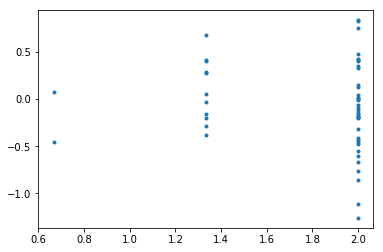

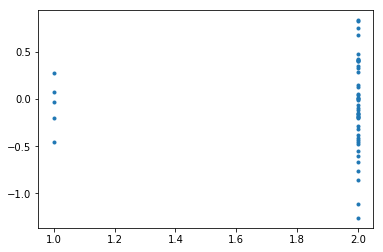

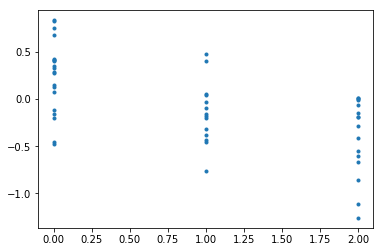

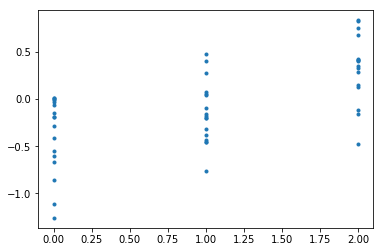

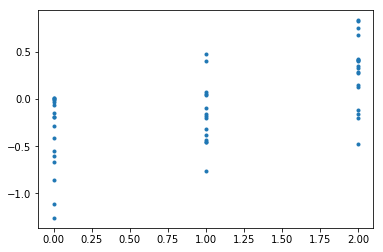

In [15]:
def get_average_improvement(df1, df2):
    ret = []
    for i, j in zip(df1,df2):
        ret.append(np.sum(j) - np.sum(i))
    return ret

improvement = get_average_improvement(bestMSE, bestCOMBO)
np.mean(improvement), np.std(improvement)


fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()


fig, ax = plt.subplots()
ax.plot(target_inD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(target_outD,improvement, '.')
plt.show()

fig, ax = plt.subplots()
ax.plot(descendants,improvement, '.')
plt.show()

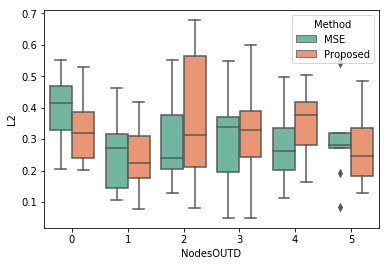

In [8]:
lst = []
for x,y in zip(qbestMSE, descendants):
    lst.append(['MSE', np.mean(x), y])
for x,y in zip(qbestCOMBO, descendants):
    lst.append(['Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

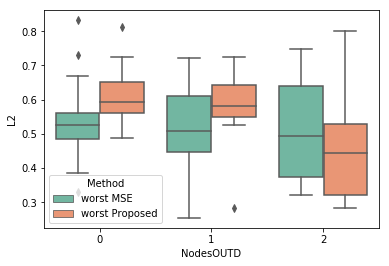

In [112]:
lst = []

for x,y in zip(qworstMSE, descendants):
    lst.append(['worst MSE', np.mean(x), y])
for x,y in zip(qworstCOMBO, descendants):
    lst.append(['worst Proposed', np.mean(x), y])


df = pd.DataFrame(lst, columns = ['Method', 'L2', 'NodesOUTD'])
ax = sns.boxplot(data=df, x = 'NodesOUTD', y = 'L2', hue = 'Method', linewidth = 1.5,palette="Set2")

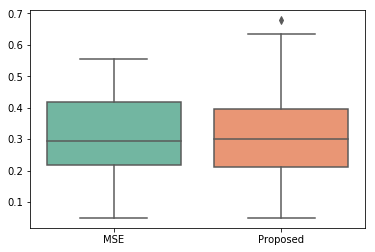

In [7]:
import seaborn as sns
val1 = []
for each in qbestMSE:
    val1.append(np.mean(each))
val2 = []
for each in qbestCOMBO:
    val2.append(np.mean(each))

val = []
for x, y in zip(val1, val2):
    val.append([x, y])
df = pd.DataFrame(val, columns = ['MSE', 'Proposed'])
ax = sns.boxplot(data=df, palette="Set2")

In [77]:
np.max(val1), np.max(val2)

(0.6640452593945086, 0.7661277271514675)

array([ 0.0034327 , -0.02559248, -0.13416377, -0.28205571,  0.05900715,
       -0.10903223,  0.2575864 ,  0.09371263, -0.30997229,  0.06285865,
       -0.04113317, -0.28456472, -0.15928204,  0.27316155,  0.56710605,
        0.55499861,  0.15069201,  0.08087676, -0.41550277,  0.06934814,
       -0.37002946,  0.20243078,  0.32295185,  0.21044946, -0.06087649,
       -0.07757568,  0.43419254, -0.16565832, -0.54071483,  0.1115466 ,
        0.00396973,  0.32194001, -0.42890713, -0.04492837, -0.08022409,
        0.30079676, -0.02563958,  0.01746376, -0.27542297,  0.24730838,
        0.22839099, -0.0525733 ,  0.06003491,  0.19578927, -0.20614404,
        0.15330721,  0.06472666, -0.03574063,  0.35898603, -0.42787733])

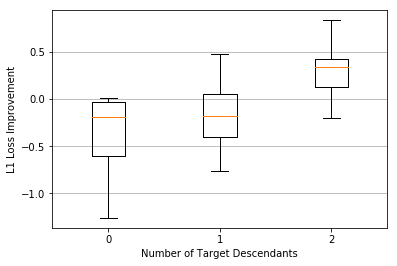

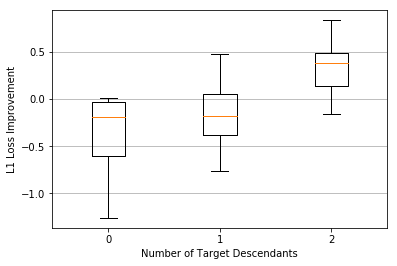

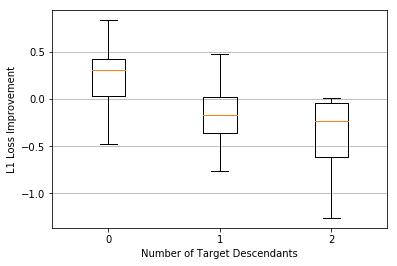

In [16]:
def box_plots(X,Y):
    box = []
    for i in np.unique(X):
        box.append([])
    for x,y in zip(X, Y):
        box[x].append(y)
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.yaxis.grid(True)
    ax.set_xlabel("Number of Target Descendants")
    ax.set_ylabel("L1 Loss Improvement")
    bp = ax.boxplot(box, showfliers=False, labels = ['0', '1', '2'])
    
box_plots(descendants, improvement)
box_plots(target_outD, improvement)
box_plots(target_inD, improvement)

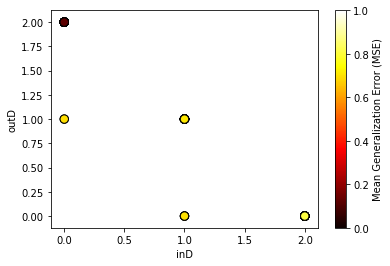

In [45]:
def heat_plot(x,y,z, xlab = 'Mean', ylab = 'Variance', zlab= 'Mean Generalization Error (MSE)', clim_low = 0, clim_high = 1):
    fig, ax = plt.subplots()

    cax = ax.scatter(x, y, c=z, s=70, edgecolor='black', cmap = 'hot')
    cax.set_clim(clim_low, clim_high)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    #plt.colorbar(cax)
    cbar = plt.colorbar(cax)
    cbar.set_label(zlab)
    plt.show()
    

heat_plot(target_outD, target_inD, normalize(improvement), xlab = 'inD', ylab='outD')

In [ ]:
np.mean(bestMSE), np.mean(bestCOMBO), np.std(bestMSE), np.std(bestCOMBO)

In [ ]:
improvement
fig, ax = plt.subplots()
ax.plot(averageDegree,improvement, '.')
plt.show()

improvement
fig, ax = plt.subplots()
ax.plot(targetDegree,improvement, '.')
plt.show()

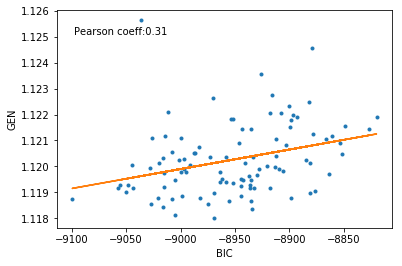

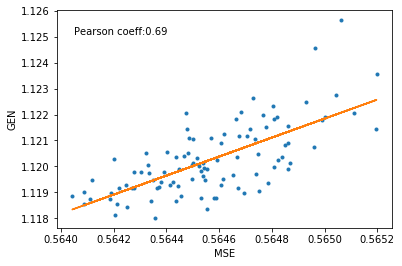

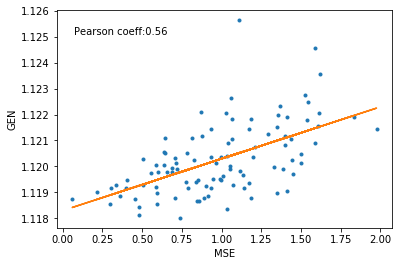

In [11]:
fig, ax = plt.subplots()
b,m = polyfit(proposed,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(proposed,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(proposed,generalization, '.')
plt.plot(proposed, b + m * np.array(proposed), '-')
ax.set_xlabel("BIC")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
b,m = polyfit(metrics,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(metrics,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(metrics,generalization, '.')
plt.plot(metrics, b + m * np.array(metrics), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


total = normalize(metrics) + normalize(proposed)
fig, ax = plt.subplots()
b,m = polyfit(total,generalization, 1)
text(0.05, 0.9,'Pearson coeff:' + str(pearsonr(total,generalization)[0])[0:4], ha='left', va='center', transform=ax.transAxes)
ax.plot(total,generalization, '.')
plt.plot(total, b + m * np.array(total), '-')
ax.set_xlabel("MSE")
ax.set_ylabel("GEN")
fig.savefig('Ex4MSEVsAUS.pdf', bbox_inches='tight')
plt.show()


In [ ]:
nbest = 10
final = pd.DataFrame(np.stack((metrics, proposed, total, generalization), axis = 1), columns = ['metrics', 'proposed', 'combined', 'generalization'])
print("MSE = ", np.sum(final.nsmallest(nbest, 'metrics')['generalization']))
print("BIC = ", np.sum(final.nsmallest(nbest, 'proposed')['generalization']))
print("COMB = ",np.sum(final.nsmallest(nbest, 'combined')['generalization']))